# Inverstigation of EDP

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [2]:
import datetime
print(datetime.datetime.now())

2018-12-01 18:10:10.851652


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [6]:
result_path = u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2016/Program/Program_only_married_couples/hdf_married_couples/"

In [7]:
df = pd.read_hdf(result_path+"married_couples_step_4.h5", "fiscr")

In [8]:

#df_panact = pd.read_hdf(store_path, 'PANACT')
#df_panact_2005 = df_panact[df_panact.AN>=2005]
#df_panact_2005.to_hdf('C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/dads','start_2005' )

We define the taxable income (Revenu Brut Global) based on the 7 income categories present in the database.

In [9]:
df["Rbg_2011"] =(( df.ZTSAM_2011*0.9) + df.ZRAGM_2011 + df.ZRACM_2011 + df.ZRNCM_2011 + df.ZFONM_2011 + df.ZPERM_2011*0.9
                    + df.ZRICM_2011)
df["Rbg_2014"] =(( df.ZTSAM_2014*0.9) + df.ZRAGM_2014 + df.ZRACM_2014 + df.ZRNCM_2014 + df.ZFONM_2014 + df.ZPERM_2014*0.9
                    + df.ZRICM_2014)
df["Delta_Rbg"] = df.Rbg_2014 - df.Rbg_2011
df["Delta_rbg"] = df.Rbg_2014 - df.Rbg_2011
df["Delta_ZIMPOM"] = df.ZIMPOM_DECL_2014 - df.ZIMPOM_2011

In [10]:
household_income_vars = ["ZTSAM", "ZRAGM", "ZRACM","ZRNCM", "ZFONM", "ZPERM","ZRICM"]
for var in household_income_vars:
    df["Delta_{}".format(var)] = df["{}_2014".format(var)] - df["{}_2011".format(var)]

In [11]:
import importlib
year = 2014

ir_2014 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union")

ir_2011 = importlib.import_module("Irpp_formulas.IRPP_from_scratch_civil_union_{}".format(2011))

In [12]:
dict_gain_ir_2011_by_child = dict()
dict_gain_ir_2014_by_child = dict()
for child in range(1,6):
    ir_x_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2011.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2011.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2011_by_child[child] = ir_0_children - ir_x_children 
    
    ir_x_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([child]*200).astype("float")))
    ir_0_children = ir_2014.ir_avec_plafond_qf_enfant(pd.Series(
        range(0,2*10**5, 1000)), ir_2014.parts_fiscales_enfants(pd.Series([0.0]*200).astype("float")))
    dict_gain_ir_2014_by_child[child] = ir_0_children - ir_x_children 
    
    
    


#ir_2011.ir_avec_plafond_qf_enfant(pd.Series(range(0,2*10**5, 1000)), ir.parts_fiscales_enfants(pd.Series([3.0]*200).astype("float"))).plot()

In [13]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

(50000, 160000)

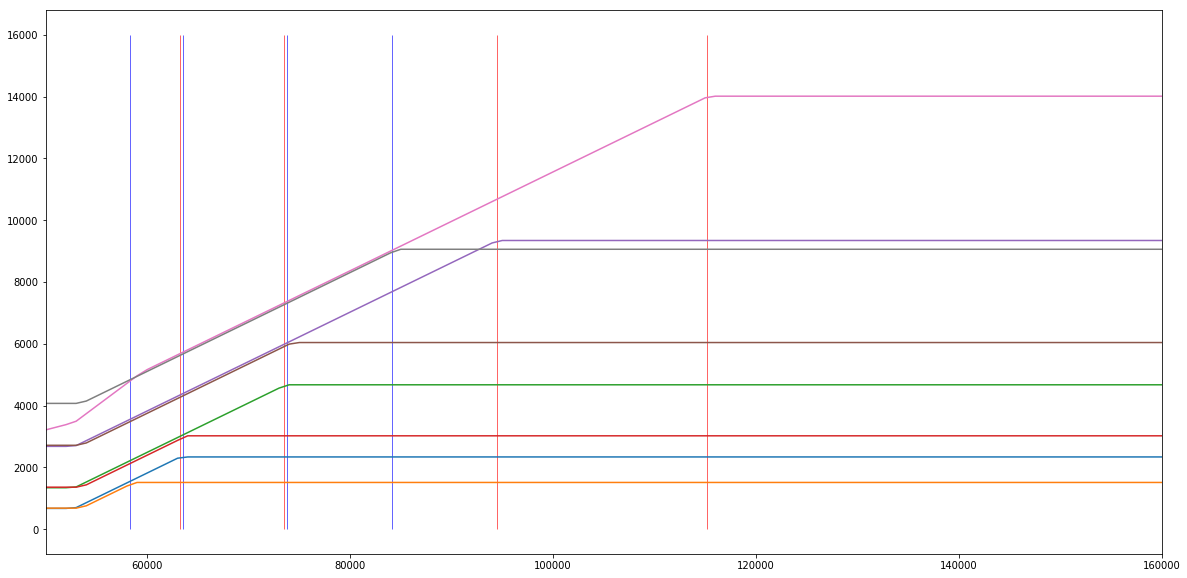

In [14]:



plt.figure(figsize=(20,10))
for child in range(1,5):
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2011_by_child[child])
    plt.plot( pd.Series(range(0,2*10**5, 1000)),dict_gain_ir_2014_by_child[child])
for thrsh in threshold_byr_rbg["2011"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "r")
for thrsh in threshold_byr_rbg["2014"][0:4]:
    plt.vlines(thrsh, 0 , 16000, linewidth = 0.6, color = "b")
plt.xlim(50000,160000)

In [15]:
parts_fiscales_enfants = ir_2014.parts_fiscales_enfants(df.NBPAC_2011)

In [16]:
df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Irpp_2014"] = ir_2014.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in minimum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2016\Program\Program_only_married_couples\Irpp_formulas\IRPP_from_scratch_civil_union_2011.py:24: RuntimeWarning: invalid value encountered in maximum
  a = np.maximum(np.minimum(base1, thresholds1[:, 1:]) - thresholds1[:, :-1], 0)


(353928, 450)


(0, 15000)

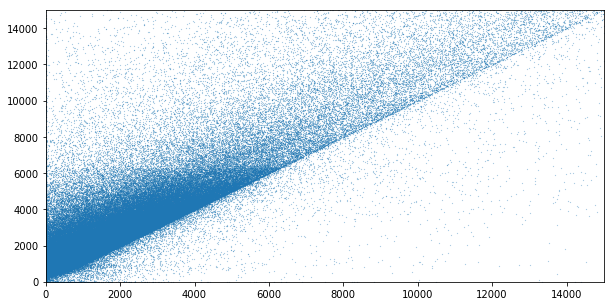

In [17]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_2011,df_temp.Irpp_2011, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(330234, 450)


(0, 15000)

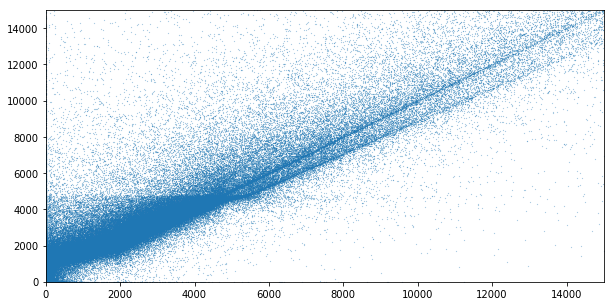

In [18]:
df_temp = df.query("(NBPAC_2011 ==0) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(353928, 450)


(0, 15000)

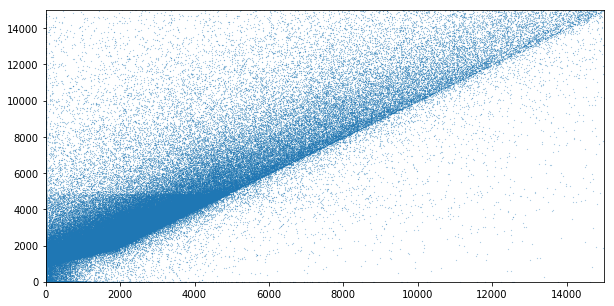

In [19]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(353928, 450)


(0, 15000)

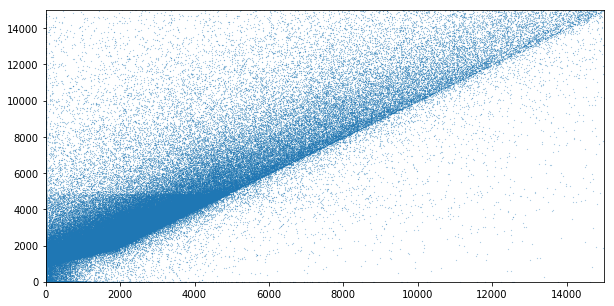

In [20]:
df_temp = df.query("(NBPAC_2011 >=1) & (NBPAC_2011==NBPAC_2014) ")
print(df_temp.shape)
fig = plt.figure(figsize=(10,5))
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

## Needed variables

In [80]:
nb_enf_max_for_annalysis = 6

In [81]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

In [82]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)] 

In [83]:
for child in range(0,7):
    df["child_{}".format(child)] = df.NBPAC_2011 == child

In [84]:
all_thresholds = pd.concat([threshold_byr_rbg["2011"], threshold_byr_rbg["2014"]]).sort_values()
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  all_thresholds ]

In [25]:
for thrsh in all_thresholds:
    df["Threshold_{}".format(thrsh)] = df.Rbg_2011>= thrsh

In [113]:
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number =  ["child_{}".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

interaction_child_between_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [114]:
for nb_enf in range(1,7): ### in modification
    df["Between_threshold_{}_child".format(nb_enf)
          ] = ((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
               & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1]))


In [115]:

for nb_enf in range(1,7): ### in modification
    df["Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
for nb_enf in range(1,7): ### in modification
    df["Below_thresholds_{}_child".format(nb_enf)
          ] =  (df.Rbg_2011 < threshold_byr_rbg["2011"].iloc[nb_enf-1])

In [116]:
df["Over_threshold"] = False
df["Between_thresholds"] = False
for child in range(1,7): ### in modification
    df["Over_threshold"] +=  (df["Over_threshold_{}_child".format(child)] & (df["NBPAC_2011"] ==child))
    df["Between_thresholds"] +=  (df["Between_threshold_{}_child".format(child)] & (df["NBPAC_2011"] ==child))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [117]:
## Interactions hardcoded
for child in range(1,7):
    df["Over_{}_X_{}_child".format(child,child)] = df["Over_threshold_{}_child".format(child)] * df["child_{}".format(child)]
    df["Between_{}_X_{}_child".format(child,child)] = df["Between_threshold_{}_child".format(child)] * df["child_{}".format(child)]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [118]:
hardcoded_over = ["Over_{}_X_{}_child".format(child,child) for child in range(1,7)]
hardcoded_between = ["Between_{}_X_{}_child".format(child,child) for child in range(1,7)]

In [119]:
df["Intercept"] = 1 
df["Rbg_splines"]  = pd.cut(df.Rbg_2011, 100)

In [120]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [121]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,7)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,7)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,7)]




df["Interactions_rbg_child1_between"] = df.eval("Delta_rbg*child_1*Between_threshold_1_child")
df["Interactions_rbg_child2_between"] = df.eval("Delta_rbg*child_2*Between_threshold_2_child")
df["Interactions_rbg_child3_between"] = df.eval("Delta_rbg*child_3*Between_threshold_3_child")
df["Interactions_rbg_child4_between"] = df.eval("Delta_rbg*child_4*Between_threshold_4_child")
df["Interactions_rbg_child5_between"] = df.eval("Delta_rbg*child_5*Between_threshold_5_child")
df["Interactions_rbg_child6_between"] = df.eval("Delta_rbg*child_6*Between_threshold_6_child")



df["Interactions_rbg_child1_over"] = df.eval("Delta_rbg*child_1*Over_threshold_1_child")
df["Interactions_rbg_child2_over"] = df.eval("Delta_rbg*child_2*Over_threshold_2_child")
df["Interactions_rbg_child3_over"] = df.eval("Delta_rbg*child_3*Over_threshold_3_child")
df["Interactions_rbg_child4_over"] = df.eval("Delta_rbg*child_4*Over_threshold_4_child")
df["Interactions_rbg_child5_over"] = df.eval("Delta_rbg*child_5*Over_threshold_5_child")
df["Interactions_rbg_child6_over"] = df.eval("Delta_rbg*child_6*Over_threshold_6_child")


df["Interactions_child1_over"] = (df["child_1"]* df["Over_threshold_1_child"]).astype("int")
df["Interactions_child2_over"] = (df["child_2"]* df["Over_threshold_2_child"]).astype("int")
df["Interactions_child3_over"] = (df["child_3"]* df["Over_threshold_3_child"]).astype("int")
df["Interactions_child4_over"] = (df["child_4"]* df["Over_threshold_4_child"]).astype("int")
df["Interactions_child5_over"] = (df["child_5"]* df["Over_threshold_5_child"]).astype("int")
df["Interactions_child6_over"] = (df["child_6"]* df["Over_threshold_6_child"]).astype("int")





df["Not_touched_by_reform"] = (df.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    df["Not_touched_by_reform".format(nb_enf)
          ] +=((df.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( df.NBPAC_2011 == nb_enf)).astype("float")

df["Delta_Rbg_times_not_touched_reform"] = df.Not_touched_by_reform * df.Delta_rbg

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


### Income sample selection

In [122]:
df.shape

(221277, 512)

In [123]:
#Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
df = df[((
            (df.Rbg_2011>50000)
            &(df.Rbg_2011<200000)
        )|(
            (df.Rbg_2014>50000)
            & (df.Rbg_2014<200000)))]

In [124]:
# #Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
# df = df[(
#             (df.Rbg_2011>0)
#         )&(df.Rbg_2014>0)]

In [36]:
df.shape

(254153, 511)

In [37]:
df_save = df

In [38]:
df = df_save

In [39]:
df_save.shape

(254153, 511)

In [40]:
## On vire les variations extrèmes à 1%

In [41]:
low = 0.025
high = 0.975
quant_df = df.Delta_Rbg.quantile([low,high])
print(quant_df)
df = df[df.Delta_Rbg>quant_df.loc[low]]
df = df[df.Delta_Rbg<quant_df.loc[high]]

0.025   -41880.61
0.975    47808.78
Name: Delta_Rbg, dtype: float64


In [42]:
print(df.Rbg_2011.min())
print(df.Rbg_2014.min())
print(df.Rbg_2011.max())
print(df.Rbg_2014.max())


2772.0
8919.9
237328.0
244998.5


In [43]:
print((df.Rbg_2011<=1000).value_counts())
print((df.Rbg_2014<=1000).value_counts())

False    238499
Name: Rbg_2011, dtype: int64
False    238499
Name: Rbg_2014, dtype: int64


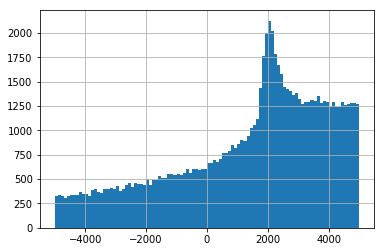

In [44]:
df.query("-5000<Delta_Rbg<5000").Delta_Rbg.hist(bins = 100)

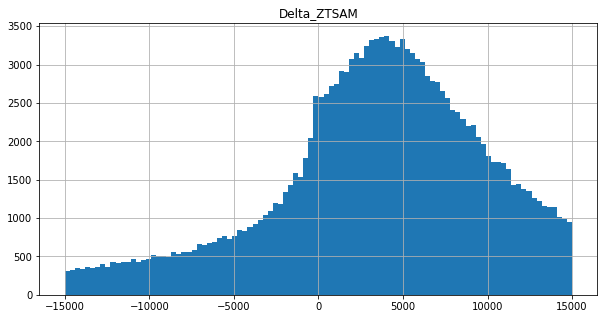

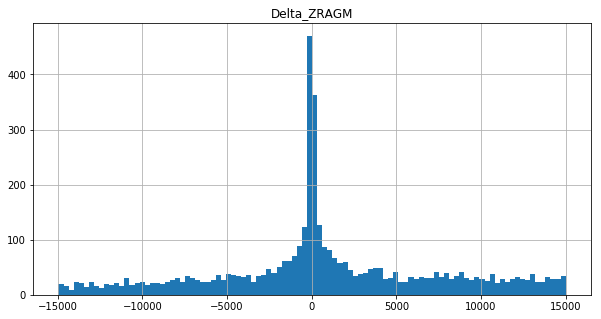

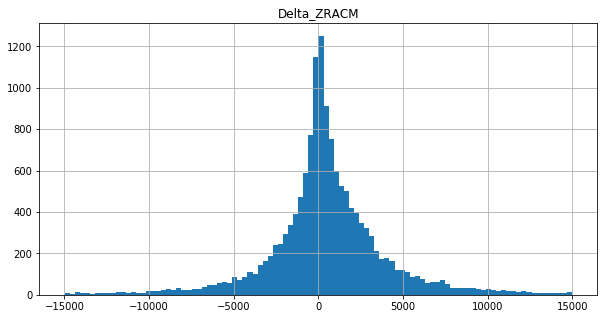

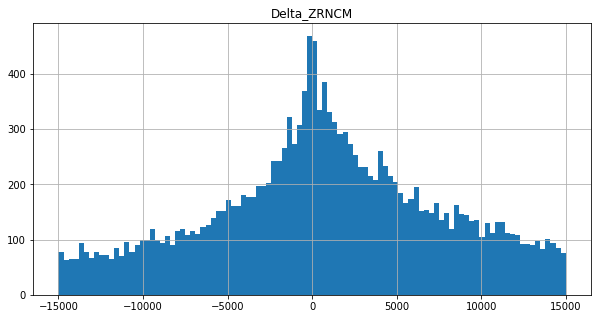

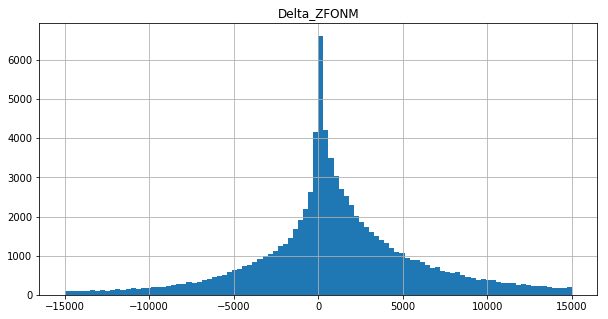

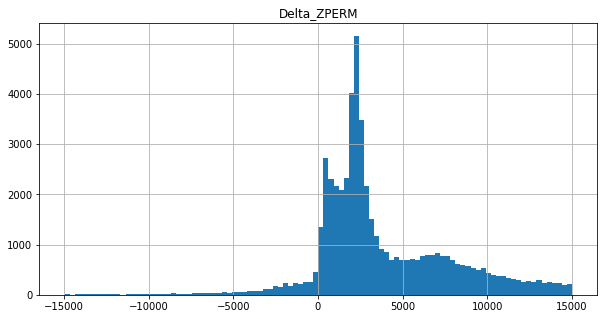

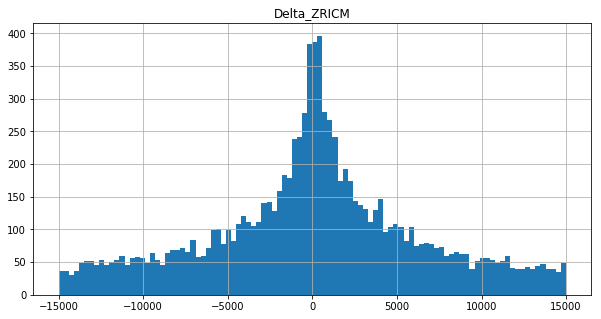

In [45]:
for var in household_income_vars:
    plt.figure(figsize=(10,5))
    df.query("(-15000<Delta_{}<15000) &(Delta_{}!=0)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
    plt.title("Delta_{}".format(var))

Text(0.5,1,'Delta_ZPERM')

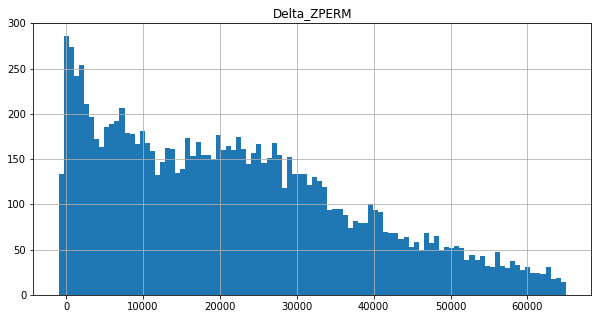

In [46]:
var = "ZPERM"
plt.figure(figsize=(10,5))
df.query("(-15000<Delta_{}<65000) &(Delta_{}!=0)&(ZPERM_2011<1000)".format(var, var))["Delta_{}".format(var)].hist(bins = 100)
plt.title("Delta_{}".format(var))

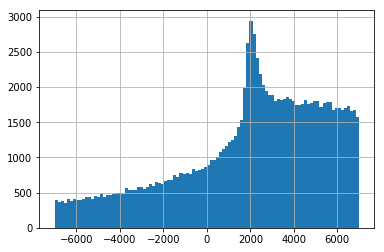

In [47]:
df.query("-7000<Delta_Rbg<7000").Delta_Rbg.hist(bins = 100)

In [48]:
(df.ZPERM_2014>0).value_counts(normalize = True)

False    0.713475
True     0.286525
Name: ZPERM_2014, dtype: float64

We have 28% of the sample that has retirement income. It creates a mass in the change in income at 2000 euros.

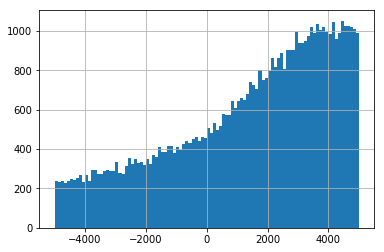

In [49]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

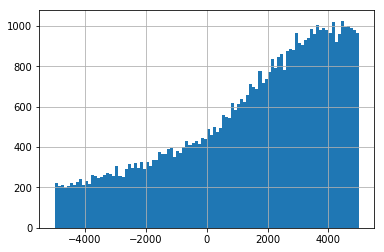

In [50]:
df.query("(-5000<Delta_Rbg<5000)&(ZPERM_2014<50)").Delta_Rbg.hist(bins = 100)

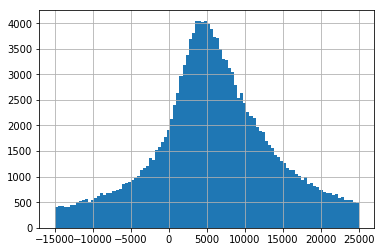

In [51]:
df.query("(-15000<Delta_Rbg<25000)&(ZPERM_2011<50)").Delta_Rbg.hist(bins = 100)

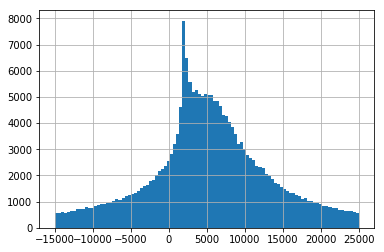

In [52]:
df.query("(-15000<Delta_Rbg<25000)").Delta_Rbg.hist(bins = 100)

In [53]:
(df.Rbg_2014==0).value_counts()

False    238499
Name: Rbg_2014, dtype: int64

In [54]:
df.query("NBPAC_2011<5").shape

(237197, 511)

In [55]:
df["Delta_NBPAC"] = df.NBPAC_2014 - df.NBPAC_2011

In [56]:
(df.Delta_NBPAC!=0).value_counts(normalize = True)

False    0.860373
True     0.139627
Name: Delta_NBPAC, dtype: float64

15% has experienced a birth or a child departure over the 2011,2014 period.  
We will focus our analysis only on households with a fixed family structure.

In [59]:
df.shape

(238499, 512)

In [60]:
df[df.NBPAC_2011 == df.NBPAC_2014].shape

(205198, 512)

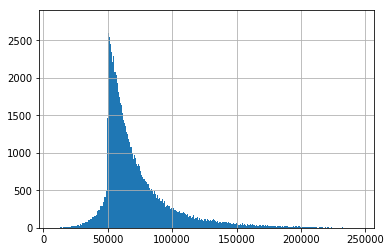

In [61]:
df.Rbg_2014.hist(bins = 900)

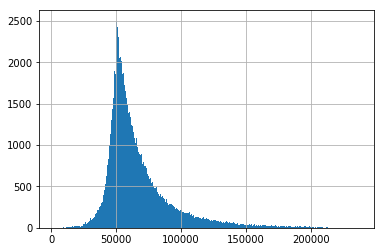

In [62]:

df.Rbg_2011.hist(bins = 900)

In [63]:
print((df.Rbg_2011 == 0).value_counts(normalize = True))
print((df.Rbg_2014 == 0).value_counts(normalize = True))

False    1.0
Name: Rbg_2011, dtype: float64
False    1.0
Name: Rbg_2014, dtype: float64


### Virer les papi mamies

In [64]:
print(((df.Age_mother>70)|(df.Age_father>70)).value_counts()) #on passe à 170894 au liey de 197728
#print ((df.Age_wo<75)&(df.Age_me<75)).value_counts()

False    221319
True      17180
dtype: int64


In [65]:
df = df[~((df.Age_mother>70)|(df.Age_father>70))]

In [66]:
df.shape

(221319, 512)

In [67]:
#df[["Age_mother", "Age_father"]]

In [68]:
#df = df[(df.Age_mother<70)&(df.Age_father<70)]

In [69]:
df.shape

(221319, 512)

In [85]:
range(nb_enf_max_for_annalysis+1)

range(0, 7)

In [86]:
%%time
df = df[df.NBPAC_2011.isin(range(nb_enf_max_for_annalysis+1))]#,6,7])]
#reg_df = reg_df[reg_df.AGERF_2011<50]

Wall time: 970 ms


In [87]:
df.shape

(221277, 512)

In [88]:
reg_df =df

In [89]:
import statsmodels.api as sm
reg_df["Rbg_splines"]  = pd.cut(reg_df.Rbg_2011, 10)

In [90]:
reg_df_same_NBPAC = reg_df[(reg_df.NBPAC_2011 == reg_df.NBPAC_2014)]

In [91]:
reg_df_same_NBPAC.AN_FISC_2011.head()

0     2012
2     2012
6     2012
9     2012
29    2012
Name: AN_FISC_2011, dtype: int64

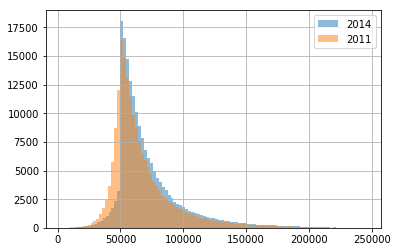

In [92]:
reg_df_same_NBPAC.Rbg_2014.hist(bins = 100, alpha = 0.5, label = "2014")
reg_df_same_NBPAC.Rbg_2011.hist(bins = 100,alpha = 0.5, label = "2011")
plt.legend()

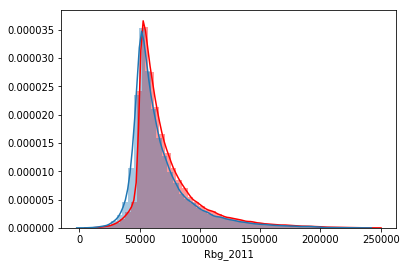

In [93]:
import seaborn as sns
sns.distplot(reg_df_same_NBPAC.Rbg_2014, color = "r")
sns.distplot(reg_df_same_NBPAC.Rbg_2011)

In [94]:
reg_df_same_NBPAC.query("NBPAC_2011==1").Over_threshold_1_child.value_counts()

False    15211
True     10127
Name: Over_threshold_1_child, dtype: int64

In [95]:
reg_df_same_NBPAC.query("NBPAC_2011==1").Over_threshold_1_child.value_counts()

False    15211
True     10127
Name: Over_threshold_1_child, dtype: int64

In [96]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])
threshold_byr_rbg.index = range(1,7); threshold_byr_rbg.index.name = 'nb_enf'
threshold_byr_rbg




reg_df_same_NBPAC["Not_touched_by_reform"] = (reg_df_same_NBPAC.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC["Not_touched_by_reform".format(nb_enf)
          ] +=((reg_df_same_NBPAC.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [97]:
reg_df_same_NBPAC["Distance_to_treatment_2"]  = 0
for child in range(1,7):
    reg_df_same_NBPAC["Distance_to_treatment_2"] += reg_df_same_NBPAC["Over_threshold_{}_child".format(child)] * reg_df_same_NBPAC[child_bool_list[child-1]] * ((threshold_byr_rbg["2011"].iloc[child-1]) - reg_df_same_NBPAC.Rbg_2014)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [98]:
reg_df_same_NBPAC.Not_touched_by_reform.value_counts()

1.0    134258
0.0     53937
Name: Not_touched_by_reform, dtype: int64

In [99]:
df_desc_stat = pd.DataFrame()

for child in  range(0, nb_enf_max_for_annalysis+1):
        df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Not_touched_by_reform".format(child)].value_counts()[True]


for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Over_threshold_{}_child".format(child)].value_counts()[True]
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)
df_desc_stat.loc["Total"] = df_desc_stat.sum(axis = 0)

In [100]:
df_desc_stat

,Treatment_0,Treatment_1,Treatment_2,Total
0,50951.0,NaN,NaN,50951.0
1,12400.0,2811.0,10127.0,25338.0
2,45308.0,10512.0,19050.0,74870.0
3,21439.0,4757.0,5103.0,31299.0
4,3439.0,771.0,623.0,4833.0
5,568.0,117.0,41.0,726.0
6,153.0,20.0,5.0,178.0
Total,134258.0,18988.0,34949.0,188195.0


#### Still in the same treatment span

In [101]:

reg_df_same_NBPAC["Rbg2014_below_threshold_{}_child".format(0)
          ] =  True
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC["Rbg2014_Over_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 > threshold_byr_rbg["2011"].iloc[nb_enf-1])
    reg_df_same_NBPAC["Rbg2014_Between_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 > threshold_byr_rbg["2014"].iloc[nb_enf-1]) & (reg_df_same_NBPAC.Rbg_2014 < threshold_byr_rbg["2011"].iloc[nb_enf-1])
    reg_df_same_NBPAC["Rbg2014_below_threshold_{}_child".format(nb_enf)
          ] =  (reg_df_same_NBPAC.Rbg_2014 < threshold_byr_rbg["2014"].iloc[nb_enf-1])



C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:8: S

In [102]:
df_desc_stat_2014 = pd.DataFrame()

for child in  [0]:
        df_desc_stat_2014.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat_2014.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat_2014.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat_2014.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
    
df_desc_stat_2014["Total"] = df_desc_stat_2014.sum(axis = 1)

#### Transitions 

In [103]:
df_desc_stat = pd.DataFrame()

for child in  [0]:
    df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]



for child in  range(1, nb_enf_max_for_annalysis+1):
    df_desc_stat.loc[child, "Treatment_1"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Between_threshold_{}_child".format(child)].value_counts()[True]
    df_desc_stat.loc[child, "Treatment_2"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_Over_threshold_{}_child".format(child)].value_counts()[True]
    
    df_desc_stat.loc[child, "Treatment_0"] = reg_df_same_NBPAC.query(
                                            "NBPAC_2011=={}".format(child)
                                            )["Rbg2014_below_threshold_{}_child".format(child)].value_counts()[True]
    
    
df_desc_stat["Total"] = df_desc_stat.sum(axis = 1)

In [104]:
df_desc_stat

,Treatment_0,Treatment_1,Treatment_2,Total
0,50951.0,NaN,NaN,50951.0
1,9560.0,3288.0,12490.0,25338.0
2,36473.0,13334.0,25061.0,74868.0
3,18620.0,6041.0,6638.0,31299.0
4,3107.0,939.0,787.0,4833.0
5,537.0,134.0,55.0,726.0
6,141.0,29.0,8.0,178.0


In [105]:
df_temp_transition =reg_df_same_NBPAC

In [106]:
df_temp_transition["Treatment_0_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_0_2011"] = False * reg_df_same_NBPAC.shape[0]


df_temp_transition["Treatment_1_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_1_2011"] = False * reg_df_same_NBPAC.shape[0]

df_temp_transition["Treatment_2_2014"] = False * reg_df_same_NBPAC.shape[0]
df_temp_transition["Treatment_2_2011"] = False * reg_df_same_NBPAC.shape[0]



for child in range(1,7):
    df_temp_transition["Treatment_1_2014"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Rbg2014_Between_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_1_2011"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Between_threshold_{}_child".format(child)]
    
    df_temp_transition["Treatment_2_2014"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Rbg2014_Over_threshold_{}_child".format(child)]
    df_temp_transition["Treatment_2_2011"] += (reg_df_same_NBPAC.NBPAC_2011 == child) * reg_df_same_NBPAC["Over_threshold_{}_child".format(child)]
    



df_temp_transition["Treatment_1_2011"] = df_temp_transition["Treatment_1_2011"].astype("bool")
df_temp_transition["Treatment_2_2011"] = df_temp_transition["Treatment_2_2011"].astype("bool")
df_temp_transition["Treatment_1_2014"] = df_temp_transition["Treatment_1_2014"].astype("bool")
df_temp_transition["Treatment_2_2014"] = df_temp_transition["Treatment_2_2014"].astype("bool")
df_temp_transition["Treatment_0_2011"] = ~(df_temp_transition.Treatment_1_2011 |df_temp_transition.Treatment_2_2011)
df_temp_transition["Treatment_0_2014"] = ~(df_temp_transition.Treatment_1_2014 |df_temp_transition.Treatment_2_2014)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [107]:
df_temp_transition.Treatment_0_2011.value_counts()

True     134258
False     53937
Name: Treatment_0_2011, dtype: int64

In [108]:
df_temp_transition.shape

(188195, 538)

In [109]:

print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print("*"*12)
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1])
print((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1])
print((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])
print((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1])

7275
31515
114791
************
8601
1946
************
14544
4923
3112
1488


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [110]:

print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print("*"*12)
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])
print ((df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[1]/df_temp_transition.shape[0])

0.0386567124525
0.167459284253
0.609957756582
************
0.0457025957119
0.0103403384787
************
0.0772815430803
0.0261590371689
0.016536039746
0.00790669252637


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [111]:
df_desc_transition = pd.DataFrame()
df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]



df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_0_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_1_2014).value_counts()[True]
df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014).value_counts()[True]


display(df_desc_transition)
display(df_desc_transition/df_temp_transition.shape[0])




C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,114791.0,14544.0,4923.0
Treatment_1,3112.0,7275.0,8601.0
Treatment_2,1488.0,1946.0,31515.0


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.609958,0.077282,0.026159
Treatment_1,0.016536,0.038657,0.045703
Treatment_2,0.007907,0.010340,0.167459


In [98]:
for nb_child in range(0,7):
    df_desc_transition = pd.DataFrame()
    df_temp = df_temp_transition.query("(NBPAC_2011==NBPAC_2014)& (NBPAC_2011 ==@nb_child)")
    df_desc_transition.loc["Treatment_0","Treatment_0" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_1" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_0","Treatment_2" ] = (df_temp.Treatment_0_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_0" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_1" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_1","Treatment_2" ] = (df_temp.Treatment_1_2011 * df_temp.Treatment_2_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_0" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_0_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_1" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_1_2014).sum(axis=0)
    df_desc_transition.loc["Treatment_2","Treatment_2" ] = (df_temp.Treatment_2_2011 * df_temp.Treatment_2_2014).sum(axis=0)

    print("*"*9+"{} child".format(nb_child)+"*"*9)
    print("Headcount")
    display(df_desc_transition)
    print("Share")
    display(df_desc_transition/df_temp.shape[0])




*********0 child*********
Headcount


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,50989.0,0.0,0.0
Treatment_1,0.0,0.0,0.0
Treatment_2,0.0,0.0,0.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,1.0,0.0,0.0
Treatment_1,0.0,0.0,0.0
Treatment_2,0.0,0.0,0.0


*********1 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,8303.0,2270.0,1836.0
Treatment_1,595.0,608.0,1610.0
Treatment_2,666.0,414.0,9058.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.327405,0.089511,0.072397
Treatment_1,0.023462,0.023975,0.063486
Treatment_2,0.026262,0.016325,0.357177


*********2 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,34024.0,8576.0,2749.0
Treatment_1,1738.0,3691.0,5098.0
Treatment_2,744.0,1079.0,17241.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.454017,0.114438,0.036683
Treatment_1,0.023192,0.049253,0.068028
Treatment_2,0.009928,0.014398,0.230064


*********3 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,17902.0,3216.0,337.0
Treatment_1,652.0,2452.0,1659.0
Treatment_2,75.0,384.0,4648.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.571492,0.102666,0.010758
Treatment_1,0.020814,0.078276,0.052961
Treatment_2,0.002394,0.012259,0.148380


*********4 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,2997.0,429.0,13.0
Treatment_1,107.0,441.0,223.0
Treatment_2,3.0,69.0,551.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.620112,0.088765,0.002690
Treatment_1,0.022139,0.091248,0.046141
Treatment_2,0.000621,0.014277,0.114008


*********5 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,515.0,53.0,0.0
Treatment_1,22.0,79.0,16.0
Treatment_2,0.0,2.0,39.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.709366,0.073003,0.000000
Treatment_1,0.030303,0.108815,0.022039
Treatment_2,0.000000,0.002755,0.053719


*********6 child*********
Headcount


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,138.0,15.0,0.0
Treatment_1,3.0,13.0,4.0
Treatment_2,0.0,1.0,4.0


Share


,Treatment_0,Treatment_1,Treatment_2
Treatment_0,0.775281,0.084270,0.000000
Treatment_1,0.016854,0.073034,0.022472
Treatment_2,0.000000,0.005618,0.022472


In [99]:
#Transitions by number of children.
# for child in range(1,7): 
#     print  "*"*22 + "{}".format(child)
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]
#     print"*"*12
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print"*"*12
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_1_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]
#     print (df_hello.query("NBPAC_2011=={}".format(child)).Treatment_2_2011 * df_hello.query("NBPAC_2011=={}".format(child)).Treatment_0_2014).value_counts()[1]

In [100]:
((df_temp_transition.Treatment_0_2011 * df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 * df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 * df_temp_transition.Treatment_2_2014)).value_counts(normalize = True)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


True     0.815992
False    0.184008
dtype: float64

In [101]:
reg_df_same_NBPAC["Stays_in_same_treatment"]= ((df_temp_transition.Treatment_0_2011 & df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 & df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 & df_temp_transition.Treatment_2_2014))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
df["Stays_in_same_treatment"]= ((df_temp_transition.Treatment_0_2011 & df_temp_transition.Treatment_0_2014)
                                               +(df_temp_transition.Treatment_1_2011 & df_temp_transition.Treatment_1_2014)
                                               +(df_temp_transition.Treatment_2_2011 & df_temp_transition.Treatment_2_2014))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\computation\expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [103]:
reg_df_same_NBPAC[["NBPAC_2011","Rbg_2011","Treatment_0_2011", "Rbg_2014","Treatment_0_2014"]].head()

,NBPAC_2011,Rbg_2011,Treatment_0_2011,Rbg_2014,Treatment_0_2014
0,3.0,43567.4,True,54073.8,True
2,1.0,47919.6,True,50767.2,True
6,3.0,41512.5,True,57008.7,True
9,2.0,98984.1,False,99911.7,False
29,0.0,51969.6,True,50971.5,True


In [104]:
print(reg_df_same_NBPAC.Stays_in_same_treatment.value_counts(normalize = True))
print(reg_df_same_NBPAC.query("NBPAC_2011>0").Stays_in_same_treatment.value_counts(normalize = True))
print(reg_df_same_NBPAC[~reg_df_same_NBPAC.Treatment_0_2011].Stays_in_same_treatment.value_counts(normalize = True))

True     0.815992
False    0.184008
Name: Stays_in_same_treatment, dtype: float64
True     0.747689
False    0.252311
Name: Stays_in_same_treatment, dtype: float64
True     0.719128
False    0.280872
Name: Stays_in_same_treatment, dtype: float64


In [105]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [106]:
#df_hello[(df_hello.Treatment_0_2011 * df_hello.Treatment_0_2014) ==1][["Rbg_2011", "Rbg_2014", "NBPAC_2011"]].value_counts()

In [107]:
pd.crosstab(reg_df_same_NBPAC["NBPAC_2011"], reg_df_same_NBPAC["Rbg2014_Between_threshold_1_child"])

Rbg2014_Between_threshold_1_child,False,True
NBPAC_2011,,
0.0,44383,6606
1.0,22068,3292
2.0,65167,9773
3.0,27736,3589
4.0,4331,502
5.0,669,57
6.0,162,16


In [108]:
#reg_df_same_NBPAC[["Age_Elder_child","Age_Youngest_child"]]

### Common trend assumption

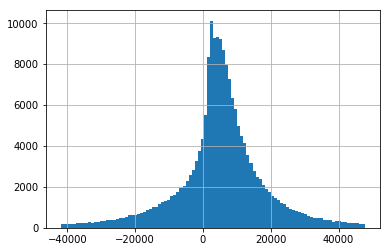

In [109]:
reg_df_same_NBPAC.query("-50000<Delta_Rbg<50000").Delta_Rbg.hist(bins = 100)

In [110]:
import seaborn as sns

We see that there is something not very smoooth happenning for households without children:

(-10000, 20000)

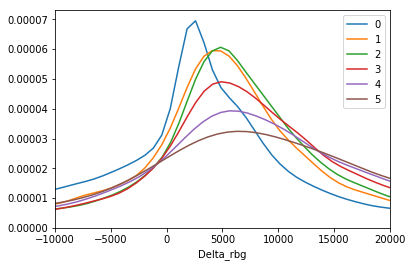

In [111]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

In [112]:
reg_df_same_NBPAC.shape

(188351, 356)

In [113]:

reg_df_same_NBPAC = reg_df_same_NBPAC.query("(ZPERM_2014==0)&(ZPERM_2011==0)")

In [114]:
reg_df_same_NBPAC.shape

(140891, 356)

When getting rid of households with an income tax equal to 0 in 2011, the curve is a lot smoother.
The average change in taxable income is way nearer to the average change for one children than the one we observe when we take out the households which does not have retirement income.

(-10000, 20000)

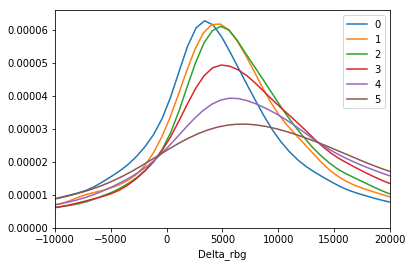

In [118]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2011==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

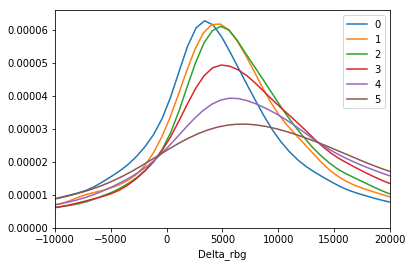

In [119]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

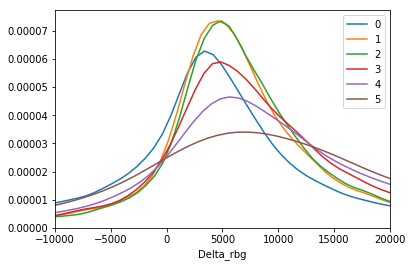

In [120]:
for child in range(0,6):
    sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)&(NBPAC_2011=={})& (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

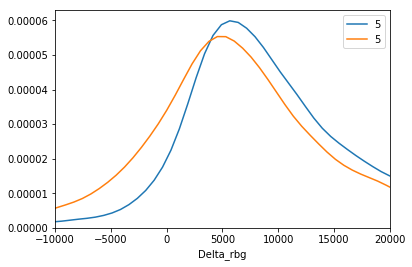

In [121]:
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = child)
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = child)
plt.xlim(-10000,20000)

(-10000, 20000)

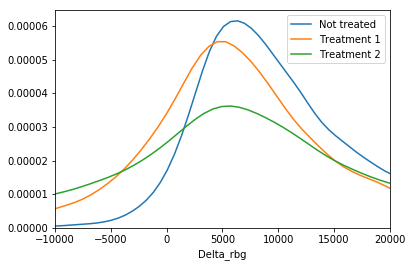

In [122]:
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_2_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 2")
plt.xlim(-10000,20000)

(-10000, 20000)

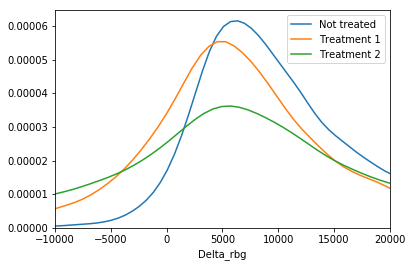

In [123]:
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_1_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_2_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 2")
plt.xlim(-10000,20000)

(-10000, 20000)

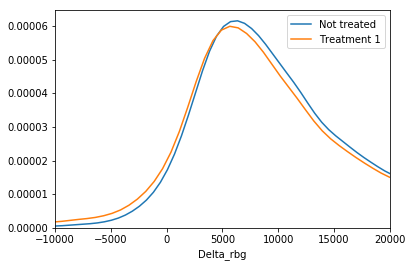

In [124]:
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)&(NBPAC_2011>0)".format(child)).Delta_rbg, hist= False, label = 'Not treated')
sns.distplot(reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)& (Rbg_2014>58291) & (ZPERM_2014==0)& (Treatment_0_2011)".format(child)).Delta_rbg, hist= False, label = "Treatment 1")
plt.xlim(-10000,20000)

In [125]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [126]:
for child in range(0,7):
    reg_df["child_{}".format(child)] = reg_df.NBPAC_2011 == child

In [127]:
print(reg_df.query("NBPAC_2011==0").Delta_Rbg.mean())
print(reg_df.query("child_1==True").Delta_Rbg.mean())
print(reg_df.query("child_2==True").Delta_Rbg.mean())
print(reg_df.query("child_3==True").Delta_Rbg.mean())
print(reg_df.query("child_4==True").Delta_Rbg.mean())
print(reg_df.query("child_5==True").Delta_Rbg.mean())
print(reg_df.query("child_6==True").Delta_Rbg.mean())

1884.9856690926413
4486.4187508112345
6151.011018803454
7043.943414620388
7275.76614530776
6956.120710059183
7195.193495934956


In [128]:

print(reg_df.query("(Between_threshold_1_child==True)").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_2_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_3_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_4_child==True").Delta_Rbg.mean())
print(reg_df.query("Between_threshold_5_child==True").Delta_Rbg.mean())

2850.1619013790378
2981.922661272663
3229.8789637372183
3522.3550394011063
3722.9443314742857


In [129]:
# print reg_df.query("(Between_threshold_1_child==True)&(child_1==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_2==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_3==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_4==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_1_child==True)&(child_5==True)").Delta_rbg.mean()

In [130]:
# print reg_df.query("(Between_threshold_2_child==True)&(child_1==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_2==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_3==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_4==True)").Delta_rbg.mean()
# print reg_df.query("(Between_threshold_2_child==True)&(child_5==True)").Delta_rbg.mean()

In [131]:
reg_df_same_NBPAC["child_0"] = reg_df.NBPAC_2011==0

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
# for nb_child1 in range(1,7):
#     print reg_df_same_NBPAC.query("(child_{}==True)&(Between_threshold_2_child==True) ".format(nb_child1)).shape[0]


In [133]:
# for nb_child1 in range(1,7):
#     for nb_child2 in range(0,7):
#         print(nb_child1, nb_child2,reg_df_same_NBPAC.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean(),
#              reg_df_same_NBPAC.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.shape[0])



In [134]:
reg_df_same_NBPAC_delta_trimmed = reg_df_same_NBPAC.query("(-50000<Delta_rbg<50000)")

In [135]:
# for nb_child1 in range(1,6):
#     for nb_child2 in range(0,6):
#         print nb_child1, nb_child2,reg_df_same_NBPAC_delta_trimmed.query("(Between_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean()



In [136]:
# for nb_child1 in range(1,6):
#     for nb_child2 in range(0,6):
#         print nb_child1, nb_child2,reg_df_same_NBPAC_delta_trimmed.query("(Over_threshold_{}_child==True)&(child_{}==True)".format(nb_child1,nb_child2)).Delta_rbg.mean()



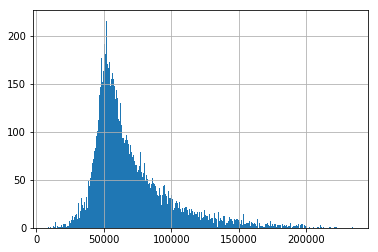

In [137]:
reg_df_same_NBPAC.query("NBPAC_2011==3").Rbg_2011.hist(bins = 1000)


### Do households bunch ?

In 2011 ?

(62000, 64000)

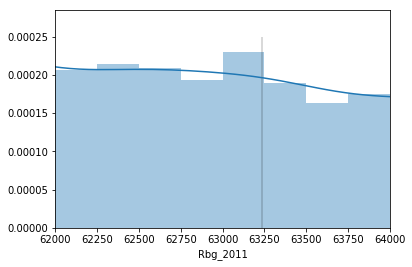

In [138]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (60000<Rbg_2011<65000)".format(nb_enf)).Rbg_2011, hist = True, bins = 20)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(62000,64000)

(56000, 60000)

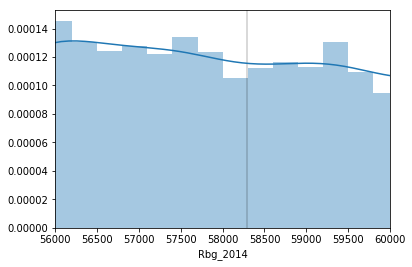

In [139]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (55000<Rbg_2014<64000)".format(nb_enf)).Rbg_2014, hist = True, bins = 30)
plt.vlines(threshold_byr_rbg["2014"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(56000,60000)

(54000, 62000)

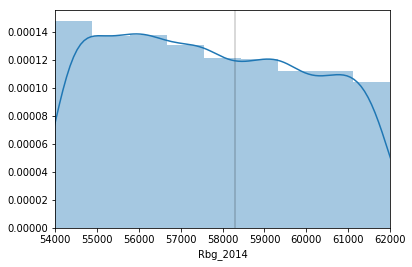

In [140]:
nb_enf = 1
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2014=={}) & (54000<Rbg_2014<62000)".format(nb_enf)).Rbg_2014, hist = True, bins = 9)
plt.vlines(threshold_byr_rbg["2014"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(54000,62000)

(5e-05, 0.00015)

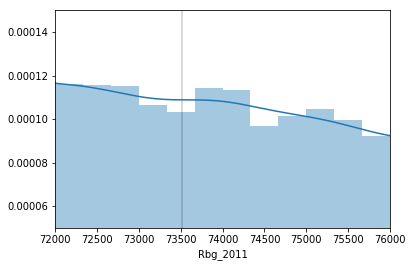

In [141]:
nb_enf = 2
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (70000<Rbg_2011<80000)".format(nb_enf)).Rbg_2011, hist = True, bins = 30)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(72000,76000)
plt.ylim(0.00005, 0.00015)

(90000, 100000)

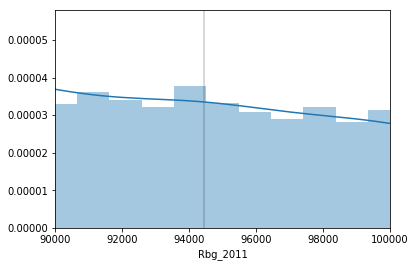

In [142]:
nb_enf = 3
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (80000<Rbg_2011<110000)".format(nb_enf)).Rbg_2011, hist = True, bins = 31)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,0.00025, alpha = 0.2 )
plt.xlim(90000,100000)
#plt.ylim(0.00005, 0.00015)

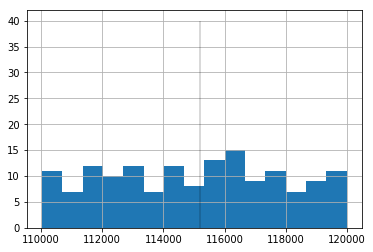

In [143]:
nb_enf = 4
reg_df_same_NBPAC.query("(NBPAC_2011=={}) & (110000<Rbg_2011<120000)".format(nb_enf)).Rbg_2011.hist(bins = 15)
plt.vlines(threshold_byr_rbg["2011"][nb_enf],0,40, alpha = 0.2 )
#plt.xlim(90000,100000)
#plt.ylim(0.00005, 0.00015)

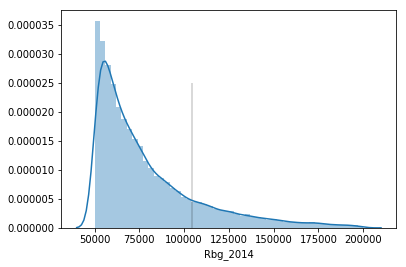

In [144]:
sns.distplot(reg_df_same_NBPAC.query("(NBPAC_2014==3) & (50000<Rbg_2014<200000)").Rbg_2014)
plt.vlines(threshold_byr_rbg["2014"][6],0,0.000025, alpha = 0.2 )

In [145]:
threshold_byr_rbg["2011"][3]

94451

In [146]:
(df_temp.NBPAC_2011==2).value_counts()

False    178
Name: NBPAC_2011, dtype: int64

In [147]:
(df_temp.query("NBPAC_2011==2")).shape

(0, 355)

In [148]:
df_temp.query("NBPAC_2011 == {}".format(child)).shape

(178, 355)

## Double diff 

#### By rank of children

In [149]:
condition_rbg = ("(50000<Rbg_2014<200000)|(50000<Rbg_2011<200000)")

In [155]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg)
for child in range(1,2):
    print(child)
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( #below_threshold_for_child_rank+interaction_child_below_thresholds
                      [between_threshold_for_child_rank[child-1]]+ [over_threshold_for_child_rank[child-1]]
                     ))
                                                                                            , df_temp.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

1
                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                35943
Model:                            RLM   Df Residuals:                    35940
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 29 Nov 2018                                         
Time:                        19:52:41                                         
No. Iterations:                     6                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Inte

In [156]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg)
result_fit_list = list()
for child in range(1,7):
    m = sm.RLM.from_formula("(Delta_rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df_temp.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    result_fit_list.append(fit)
summary_col_result = summary_col(result_fit_list, stars = True)

In [157]:

print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(1,7)], stars = True))


                             1 children    2 children   3 children    4 children    5 children   6 children 
------------------------------------------------------------------------------------------------------------
Intercept                  5378.2870***  6629.7874***  7234.7771*** 7543.8356***  7463.3878***  6734.5789***
                           (80.4994)     (43.5976)     (73.0869)    (210.3390)    (559.5881)    (1099.6148) 
Over_threshold[T.True]     -2103.7705*** -1148.5495*** -436.9468*** -1313.7698**  -1400.3127    -1114.7951  
                           (114.6587)    (78.0316)     (163.1971)   (532.1536)    (1967.2826)   (5235.2137) 
Between_thresholds[T.True] -2551.3906*** -1803.5059*** -935.4825*** -1335.1440*** -3687.3601*** -1541.9179  
                           (174.5773)    (98.0389)     (167.9354)   (485.7572)    (1294.7294)   (2928.7245) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Double diff with no child family as control

We take households above the 2013 their corresponding 2013 threshold (where the treatment begins).  
For each number of children we compare them to the households without children earning more than the 2013 threshold we are comparing the household to.   

E.g. For two children, we take all households earning more than 63530 that have 0 or two children, then we run the estimation with the two types of treatments (being between or over the thresholds).

In [158]:
#Colinear if we put an intercept
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
for child in range(1,2):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[[hardcoded_over[child-1],hardcoded_between[child-1],
                                          over_threshold_for_child_rank[child-1], between_threshold_for_child_rank[child-1]]].astype("float"))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_Rbg   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     208.6
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          1.94e-134
Time:                        19:52:59   Log-Likelihood:            -5.2536e+05
No. Observations:               47723   AIC:                         1.051e+06
Df Residuals:                   47719   BIC:                         1.051e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Over_1_X_1_child      

In [159]:
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child", "Intercept"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro


                Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII Delta_Rbg IIIIII
--------------------------------------------------------------------------------------------------------
Between_X_child 3263.7756*** 5525.1543***  7089.7823***  7577.3094***   3784.4864**     6602.4100*      
                (238.7755)   (175.8885)    (279.9649)    (646.0863)     (1540.0672)     (3606.5924)     
Over_X_child    3358.6456*** 5788.8104***  7065.6766***  6879.2756***   6720.1279***    9131.3516       
                (146.2345)   (148.2719)    (273.1828)    (713.9051)     (2465.0289)     (6780.2213)     
Intercept       -776.0378*** -1009.0193*** -1289.4571*** -1543.6432***  -1449.9373***   -1365.5850***   
                (87.6316)    (106.4949)    (154.0129)    (207.3910)     (264.4689)      (329.5358)      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [161]:
#Colinear if we put an intercept
df_temp = df.query("NBPAC_2011==NBPAC_2014&"+condition_rbg).dropna(subset = ["Delta_rbg", "Delta_Rbg"]+hardcoded_over+hardcoded_between+over_threshold_for_child_rank+between_threshold_for_child_rank)
result_fit_list = list()
for child in range(1,7):
    df_temp2 = df_temp.query("((NBPAC_2011 == {})|(NBPAC_2011 == 0))& (Rbg_2011>{})".format(child,threshold_byr_rbg.loc[child,"2014"]) )
    df_temp2["Between_X_child"] = df_temp2["Between_{}_X_{}_child".format(child,child)]
    df_temp2["Over_X_child"] = df_temp2["Over_{}_X_{}_child".format(child,child)]
    df_temp2["Between_threshold_n_child"] = df_temp2["Between_threshold_{}_child".format(child)]
    df_temp2["Over_threshold_n_child"] = df_temp2["Over_threshold_{}_child".format(child)]
    m = sm.OLS(df_temp2["Delta_Rbg"].astype("float"), df_temp2[["Between_X_child", "Over_X_child","Between_threshold_n_child","Over_threshold_n_child"]].astype("float"))
    fit = m.fit()
    result_fit_list.append(fit)
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl


                          Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII Delta_Rbg IIIIII
------------------------------------------------------------------------------------------------------------------
Between_X_child           2556.2500*** 5082.8783***  6956.3078***  7654.4985***   3800.1479**     6811.1214*      
                          (286.3259)   (221.0908)    (310.6082)    (661.7413)     (1546.9751)     (3610.2914)     
Over_X_child              3575.9646*** 6068.2007***  7240.6230***  6716.8698***   6667.7452***    8335.8703       
                          (154.0578)   (170.7152)    (325.1444)    (774.7251)     (2512.2492)     (6810.2058)     
Between_threshold_n_child -68.5122     -566.7433***  -1155.9825*** -1620.8323***  -1465.5988***   -1574.2964***   
                          (180.7422)   (171.1405)    (204.4921)    (251.9089)     (301.4491)      (370.2255)      
Over_threshold_n_child    -993.3568*** -1288.4095*** -1464.4035*** -1381.2374**

In [162]:
df_temp2.query("NBPAC_2011==0")[["Between_threshold_1_child"]].Between_threshold_1_child.value_counts()

False    3801
Name: Between_threshold_1_child, dtype: int64

In [163]:
from statsmodels.iolib.summary2 import summary_col
print(summary_col(result_fit_list, stars = True))


                          Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII Delta_Rbg IIIII Delta_Rbg IIIIII
------------------------------------------------------------------------------------------------------------------
Between_X_child           2556.2500*** 5082.8783***  6956.3078***  7654.4985***   3800.1479**     6811.1214*      
                          (286.3259)   (221.0908)    (310.6082)    (661.7413)     (1546.9751)     (3610.2914)     
Over_X_child              3575.9646*** 6068.2007***  7240.6230***  6716.8698***   6667.7452***    8335.8703       
                          (154.0578)   (170.7152)    (325.1444)    (774.7251)     (2512.2492)     (6810.2058)     
Between_threshold_n_child -68.5122     -566.7433***  -1155.9825*** -1620.8323***  -1465.5988***   -1574.2964***   
                          (180.7422)   (171.1405)    (204.4921)    (251.9089)     (301.4491)      (370.2255)      
Over_threshold_n_child    -993.3568*** -1288.4095*** -1464.4035*** -1381.2374**

In [164]:
for child in [1]:
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        print(liste[child])
        to_keep_regressors.append(liste[child])

Between_threshold_2_child
Over_threshold_2_child
child_2
child_2:Between_threshold_2_child
child_2:Over_threshold_2_child


#### Double diff with no child family as control

In [165]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                76349
Model:                            RLM   Df Residuals:                    76343
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 29 Nov 2018                                         
Time:                        19:54:54                                         
No. Iterations:                    10                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [167]:
to_keep_regressors = []
child_rank_to_include = 0
df_temp = df.query("NBPAC_2011==NBPAC_2014")
for child in range(1,2):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank, children_number,interaction_child_between_threshold,interaction_child_over_threshold]:
        to_keep_regressors.append(liste[child-1])
    m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
            ' + '.join( to_keep_regressors)), df_temp.query("(NBPAC_2011 == {})|(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                    Robust linear Model Regression Results                    
Dep. Variable:              Delta_rbg   No. Observations:                76349
Model:                            RLM   Df Residuals:                    76343
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 29 Nov 2018                                         
Time:                        19:55:41                                         
No. Iterations:                    10                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [168]:
reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == {})".format(1)).child_1.value_counts()

True    20991
Name: child_1, dtype: int64

In [169]:
map(between_threshold_for_child_rank.__getitem__,(0,1,2))

In [170]:
to_keep_regressors

['Between_threshold_1_child',
 'Over_threshold_1_child',
 'child_1',
 'child_1:Between_threshold_1_child',
 'child_1:Over_threshold_1_child']

In [171]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,7):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           1.23e-82
Time:                        19:55:53   Log-Likelihood:            -2.2684e+05
No. Observations:               20991   AIC:                         4.537e+05
Df Residuals:                   20988   BIC:                         4.537e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [172]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,7):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == 0)".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     181.8
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           9.10e-79
Time:                        19:55:56   Log-Likelihood:            -1.6604e+05
No. Observations:               15286   AIC:                         3.321e+05
Df Residuals:                   15283   BIC:                         3.321e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [173]:
to_keep_regressors = []
child_rank_to_include = 0
for child in range(1,7):
    to_keep_regressors = []
    child_rank_to_include = 0
    for liste in [between_threshold_for_child_rank, over_threshold_for_child_rank]:
        to_keep_regressors.append(liste[child-1])
    m = sm.OLS.from_formula("(Delta_rbg)~   {} - child_{}".format(
            ' + '.join( to_keep_regressors), child), reg_df_same_NBPAC.query(
                                                                    "(NBPAC_2011 == {})".format(child)))
    fit = m.fit()
    summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           1.23e-82
Time:                        19:55:58   Log-Likelihood:            -2.2684e+05
No. Observations:               20991   AIC:                         4.537e+05
Df Residuals:                   20988   BIC:                         4.537e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.845
Date:                Thu, 29 Nov 2018   Prob (F-statistic):             0.0589
Time:                        19:55:59   Log-Likelihood:                -7144.2
No. Observations:                 646   AIC:                         1.429e+04
Df Residuals:                     643   BIC:                         1.431e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [174]:
from operator import itemgetter
import itertools

In [158]:
itemgetter(0,2,3)(between_threshold_for_child_rank)

('Between_threshold_1_child',
 'Between_threshold_3_child',
 'Between_threshold_4_child')

## Pooled estimation with Treatment one, or two.

In [159]:
reg_df_same_NBPAC.Treatment_1_2011.value_counts()

False    125686
True      17903
Name: Treatment_1_2011, dtype: int64

In [160]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011".format( 
        ' + '.join(cumulative_child_bool_list+thrsh_bool_list))
                                                                                        , reg_df_same_NBPAC.query("NBPAC_2011 == NBPAC_2014"))
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     344.2
Date:                Thu, 29 Nov 2018   Prob (F-statistic):          7.39e-150
Time:                        11:00:55   Log-Likelihood:            -1.5596e+06
No. Observations:              143589   AIC:                         3.119e+06
Df Residuals:                  143586   BIC:                         3.119e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

###Add controls for trends

In [161]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(thrsh_bool_list))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     173.9
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:01:12   Log-Likelihood:            -1.5587e+06
No. Observations:              143589   AIC:                         3.117e+06
Df Residuals:                  143574   BIC:                         3.118e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [162]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +{}".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     271.8
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:01:14   Log-Likelihood:            -1.5588e+06
No. Observations:              143589   AIC:                         3.118e+06
Df Residuals:                  143580   BIC:                         3.118e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [163]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+between_threshold_for_child_rank+over_threshold_for_child_rank))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:01:16   Log-Likelihood:            -1.5581e+06
No. Observations:              143589   AIC:                         3.116e+06
Df Residuals:                  143568   BIC:                         3.116e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [127]:
threshold_byr_rbg
flatten_thresholds = np.sort(threshold_byr_rbg.values.flatten())

In [128]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    reg_df_same_NBPAC["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
reg_df_same_NBPAC["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

58291 63233
63233 63530


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


63530 73516
73516 73806
73806 84103
84103 94368
94368 94451
94451 104633
104633 115185
115185 135941
135941 150684


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [186]:
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    df["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df.Rbg_2011>  thrsh1)
                                                                                               & (df.Rbg_2011< thrsh2))
df["Flatten_thresholds_more_then_{}".format( thrsh2)] = df.Rbg_2011> thrsh2
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

58291 63233
63233 63530
63530 73516
73516 73806
73806 84103
84103 94368
94368 94451
94451 104633
104633 115185
115185 135941
135941 150684


In [167]:
m = sm.OLS.from_formula("(Delta_rbg)~ Treatment_1_2011 + Treatment_2_2011 +  {} ".format( #AGERF = Age du référent fiscal
        ' + '.join(child_bool_list+flatten_thresholds_list))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:01:41   Log-Likelihood:            -1.5581e+06
No. Observations:              143589   AIC:                         3.116e+06
Df Residuals:                  143568   BIC:                         3.116e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [168]:
# Boum
# for nb_enf in range(1,7):
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")



# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [169]:
# reg_df_same_NBPAC["Between_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Between_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Between_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")



# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [170]:

for nb_enf in range(1,7):
    reg_df_same_NBPAC["Below_thresholds_{}_child_rbg_2014".format(nb_enf)] = np.zeros(reg_df_same_NBPAC.shape[0])
for nb_enf in range(1,7):
    reg_df_same_NBPAC["Below_thresholds_{}_child_rbg_2014".format(nb_enf)
          ] +=((reg_df_same_NBPAC.Rbg_2014<  threshold_byr_rbg["2014"].iloc[nb_enf-1])).astype("float")

    


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
below_threshold_for_child_rank = ["Below_thresholds_{}_child_rbg_2014".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
interaction_child_below_thresholds  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, below_threshold_for_child_rank)]

## Triple diff estimation

In [175]:
#reg_df_same_NBPAC[over_threshold_for_child_rank+["NBPAC_2011"]]

In [176]:
threshold_byr_rbg

,2011,2014
nb_enf,,
1,63233,58291
2,73516,63530
3,94451,73806
4,115185,84103
5,135941,94368
6,150684,104633


In [177]:
reg_df.shape

(221470, 330)

### Classical 

#### On all the population

In [181]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     362.8
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        19:58:10   Log-Likelihood:            -2.0464e+06
No. Observations:              188351   AIC:                         4.093e+06
Df Residuals:                  188320   BIC:                         4.093e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [130]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     362.2
Date:                Fri, 30 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:57:24   Log-Likelihood:            -2.0446e+06
No. Observations:              188195   AIC:                         4.089e+06
Df Residuals:                  188164   BIC:                         4.090e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [129]:
#Flatten
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZPERM_2011<100)&(Age_father<50) ")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


PatsyError: Error evaluating factor: NameError: name 'Flatten_thresholds_115185_135941' is not defined
    (Delta_rbg)~   child_1 + child_2 + child_3 + child_4 + child_5 + child_6 + Flatten_thresholds_58291_63233 + Flatten_thresholds_63233_63530 + Flatten_thresholds_63530_73516 + Flatten_thresholds_73516_73806 + Flatten_thresholds_73806_84103 + Flatten_thresholds_84103_94368 + Flatten_thresholds_94368_94451 + Flatten_thresholds_94451_104633 + Flatten_thresholds_104633_115185 + Flatten_thresholds_115185_135941 + Flatten_thresholds_135941_150684 + Flatten_thresholds_more_then_150684 + Between_1_X_1_child + Between_2_X_2_child + Between_3_X_3_child + Between_4_X_4_child + Between_5_X_5_child + Between_6_X_6_child + Over_1_X_1_child + Over_2_X_2_child + Over_3_X_3_child + Over_4_X_4_child + Over_5_X_5_child + Over_6_X_6_child
                                                                                                                                                                                                                                                                                                                                                                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [192]:
df.Age_eldest_child.fillna(value = 0,inplace = True)
df.Age_youngest_child.fillna(value = 0,inplace = True)

AttributeError: 'DataFrame' object has no attribute 'Age_eldest_child'

In [191]:
df2 = df[df.Age_eldest_child<25]

AttributeError: 'DataFrame' object has no attribute 'Age_eldest_child'

In [182]:
df2.loc[df2.NBPAC_2011== 1, "Age_youngest_child"] =0 

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [190]:
m = sm.OLS.from_formula("(Delta_rbg)~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df2.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


NameError: name 'df2' is not defined

In [222]:
df.Age_youngest_child
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:30:24   Log-Likelihood:            -1.4706e+06
No. Observations:              136333   AIC:                         2.941e+06
Df Residuals:                  136296   BIC:                         2.942e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [181]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-2]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list[:-2]+hardcoded_between[:-2]+hardcoded_over[:-2]))
                    , df2.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Age_eldest_child<20)&(Age_youngest_child>1)&(NBPAC_2011 <= 4)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     74.44
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:50:18   Log-Likelihood:            -1.0067e+06
No. Observations:               92816   AIC:                         2.014e+06
Df Residuals:                   92789   BIC:                         2.014e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [192]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-1]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list[:-1]+hardcoded_between[:-1]+hardcoded_over[:-1]))
                    , df2.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Age_eldest_child<10)&(NBPAC_2011 <= 5)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     280.4
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:19:50   Log-Likelihood:            -1.0730e+06
No. Observations:               98745   AIC:                         2.146e+06
Df Residuals:                   98710   BIC:                         2.146e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [193]:
df2['Likely_to_get_retired'] = False
df2.loc[((df2.Age_father>58)&(df2.Age_father<65)), 'Likely_to_get_retired'] = True

df2.loc[((df2.Age_mother>58)&(df2.Age_mother<65)), 'Likely_to_get_retired'] = True

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [194]:
df2.Likely_to_get_retired.value_counts(dropna = False)

False    196039
True      29126
Name: Likely_to_get_retired, dtype: int64

In [195]:
m = sm.OLS.from_formula("Delta_rbg~   {}+Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2) ".format(
        ' + '.join(children_number[:-2]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list+hardcoded_between+hardcoded_over))
                    , df2.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)&(Likely_to_get_retired==False)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)



                            OLS Regression Results                            
Dep. Variable:              Delta_rbg   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     185.2
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:22:38   Log-Likelihood:            -1.7655e+06
No. Observations:              162823   AIC:                         3.531e+06
Df Residuals:                  162786   BIC:                         3.531e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [182]:
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)


                                 OLS Regression Results                                
Dep. Variable:     np.log(Rbg_2014 / Rbg_2011)   R-squared:                       0.094
Model:                                     OLS   Adj. R-squared:                  0.094
Method:                          Least Squares   F-statistic:                     662.4
Date:                         Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                                 17:50:19   Log-Likelihood:                 35030.
No. Observations:                       191651   AIC:                        -7.000e+04
Df Residuals:                           191620   BIC:                        -6.968e+04
Df Model:                                   30                                         
Covariance Type:                     nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--

#### Different samples

In [131]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#Super select
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)



#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)




#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_father+Age_mother+I(Age_father**2)+I(Age_mother**2)+Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)
#Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("(Delta_rbg)~   {} +Age_eldest_child+Age_youngest_child + I(Age_eldest_child**2)+I(Age_youngest_child**2)".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)&(Age_father<40)"))

fit = m.fit()
regression_fit_list.append(fit)


###log ratio

m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#log ratio Super select not retired in 2014 or 2011
m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query(
                                "((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                                   "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)& (ZPERM_2011<1000)& (ZPERM_2014<1000)\
                                    &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)"))

fit = m.fit()
regression_fit_list.append(fit)

In [132]:

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                   Delta_rbg I   Delta_rbg II Delta_rbg III Delta_rbg IIII Delta_rbg IIIII Delta_rbg IIIIII Delta_rbg IIIIIII Delta_rbg IIIIIIII Delta_rbg IIIIIIIII np.log(Rbg_2014 / Rbg_2011) I np.log(Rbg_2014 / Rbg_2011) II
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_eldest_child                                                                                                                                              -130.9729***       -385.7042***                                                                    
                                                                                                                                                              (41.4141)          (120.5943)                                      

In [312]:

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                   Delta_rbg I   Delta_rbg II Delta_rbg III Delta_rbg IIII Delta_rbg IIIII Delta_rbg IIIIII Delta_rbg IIIIIII Delta_rbg IIIIIIII Delta_rbg IIIIIIIII np.log(Rbg_2014 / Rbg_2011) I np.log(Rbg_2014 / Rbg_2011) II
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Age_eldest_child                                                                                                                                              -104.8517***       -394.7575***                                                                    
                                                                                                                                                              (38.6884)          (120.2256)                                      

### How well do we match the reform ?

In [133]:
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))

In [207]:
m = sm.RLM.from_formula(regression_delta_zimpom_formula  , df); regression_delta_zimpom_fit_list.append()

TypeError: append() takes exactly one argument (0 given)

In [209]:
###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)

#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)





#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###log ratio
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                   Delta_ZIMPOM I Delta_ZIMPOM II Delta_ZIMPOM III Delta_ZIMPOM IIII Delta_ZIMPOM IIIII Delta_ZIMPOM IIIIII Delta_ZIMPOM IIIIIII
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Interactions_child1_over           1276.1493***   1151.1537***    1266.6454***     1245.0809***      1088.6552***       1088.6552***        1276.1493***        
                                   (41.0602)      (44.7528)       (44.4318)        (46.5119)         (35.9547)          (35.9547)           (41.0602)           
Interactions_child2_over           1970.9332***   1923.2740***    1969.9240***     1961.7473***      1811.9631***       1811.9631***        1970.9332***        
                                   (30.5857)      (32.7346)       (31.5383)        (31.8254)         (25.8551)          (25.8551)           (30.5857)           
Interactions_child3_over         

In [220]:
df[df.Between_thresholds].query("NBPAC_2011==5").Stays_in_same_treatment.value_counts(normalize =True)

True     0.675
False    0.325
Name: Stays_in_same_treatment, dtype: float64

In [313]:
df_contraint=df.copy()
df_contraint.loc[df_contraint.Over_1_X_1_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-836
df_contraint.loc[df_contraint.Over_2_X_2_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-836*2
df_contraint.loc[df_contraint.Over_3_X_3_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-836*4
df_contraint.loc[df_contraint.Over_4_X_4_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-836*6
df_contraint.loc[df_contraint.Over_5_X_5_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-836*8
df_contraint.loc[df_contraint.Over_6_X_6_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-836*10

In [314]:
df_contraint=df.copy()
df_contraint.loc[df_contraint.Between_1_X_1_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * 0.3
df_contraint.loc[df_contraint.Between_2_X_2_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * 0.3
df_contraint.loc[df_contraint.Between_3_X_3_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * 0.3
df_contraint.loc[df_contraint.Between_4_X_4_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * 0.3
df_contraint.loc[df_contraint.Between_5_X_5_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * 0.3
df_contraint.loc[df_contraint.Between_6_X_6_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * 0.3

In [315]:
for child in range(1,7):
    print(df[df["Over_{}_X_{}_child".format(child,child)]].MTR_2014.mean())
for child in range(1,7):
    print(df[df["Between_{}_X_{}_child".format(child,child)]].MTR_2014.mean())
print(df[df.Not_touched_by_reform==1].MTR_2014.mean())

0.29507457074828536
0.3061698627765978
0.33090715920234387
0.359575530586769
0.39086956521739147
0.399
0.25733062330621714
0.2698541716471823
0.27455502896259254
0.27890909090909427
0.2812643678160915
0.3073529411764706
0.20286877464772352


In [316]:
df_contraint=df.copy()
df_contraint.loc[df_contraint.Over_1_X_1_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Over_1_X_1_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Over_2_X_2_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Over_2_X_2_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Over_3_X_3_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Over_3_X_3_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Over_4_X_4_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Over_4_X_4_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Over_5_X_5_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Over_5_X_5_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Over_6_X_6_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Over_6_X_6_child].MTR_2011.mean()

In [317]:
df_contraint.loc[df_contraint.Between_1_X_1_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Between_1_X_1_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Between_2_X_2_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Between_2_X_2_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Between_3_X_3_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Between_3_X_3_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Between_4_X_4_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Between_4_X_4_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Between_5_X_5_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Between_5_X_5_child].MTR_2011.mean()
df_contraint.loc[df_contraint.Between_6_X_6_child == True, "Delta_ZIMPOM"] = df_contraint.Delta_ZIMPOM-df_contraint.Delta_rbg * df[df.Between_6_X_6_child].MTR_2011.mean()

In [318]:
regression_delta_zimpom_formula = "(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join(interactions_child_over))


###Basic
regression_fit_list = list()
regression_delta_zimpom_fit_list = list()
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df_contraint.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)



###Both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df_contraint.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)




## Without retirement income in 2011
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df_contraint.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<1000)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


#### Without retirement income both years
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df_contraint.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)

#### Without retirement income both years,both year on th ecorrect income span
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                 df_contraint.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<10)&(ZPERM_2014<10)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZIMPOM_DECL_2014>100)&(ZIMPOM_2011>100) & (ZVALM_2011<=200) &(ZVAMM_2011<200)& (ZRACM_2011<200) & (ZETRM_2011<100)\
                                                                                &(ZIMPOM_2014>100) & (ZVALM_2014<=200) &(ZVAMM_2014<200)& (ZRACM_2014<200)& (ZETRM_2014<100)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


###log ratio
m = sm.OLS.from_formula(regression_delta_zimpom_formula,
                     df_contraint.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
regression_fit_list.append(fit)


print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                   Delta_ZIMPOM I Delta_ZIMPOM II Delta_ZIMPOM III Delta_ZIMPOM IIII Delta_ZIMPOM IIIII Delta_ZIMPOM IIIIII
-------------------------------------------------------------------------------------------------------------------------------------------
Interactions_child1_over           1155.7394***   1029.4507***    1144.0031***     1104.2331***      944.8317***        1155.7394***       
                                   (40.6985)      (43.7877)       (43.8993)        (45.6324)         (36.1884)          (40.6985)          
Interactions_child2_over           1790.2175***   1735.9316***    1789.4179***     1781.3484***      1625.8412***       1790.2175***       
                                   (29.5411)      (31.5566)       (30.4741)        (30.7356)         (26.0835)          (29.5411)          
Interactions_child3_over           3592.8428***   3537.6201***    3586.0569***     3601.6693***      3105.3040***       3592.8428***       
                   

In [225]:
836*6

5016

### By type of income 

In [319]:
household_income_vars = ['ZTSAM', 'ZRAGM', 'ZRACM', 'ZRNCM', 'ZFONM', 'ZPERM', 'ZRICM']

In [320]:
###Basic
regression_fit_list = list()

for var in ["Delta_{}".format(var )for var in household_income_vars]:
    m = sm.OLS.from_formula("({})~   {} ".format(var,
            ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                      between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                      interaction_child_between_threshold+interaction_child_over_threshold))
                        , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
    fit = m.fit()
    regression_fit_list.append(fit)



In [321]:
print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                   Delta_ZTSAM   Delta_ZRAGM  Delta_ZRACM  Delta_ZRNCM  Delta_ZFONM   Delta_ZPERM  Delta_ZRICM 
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         -4329.8217*** 130.8034***   53.2082***  9.6964        838.2063***  7772.1989***  -75.1589*** 
                                                  (88.8414)     (18.8761)     (14.5185)   (38.9641)     (29.8945)    (48.0745)     (27.7877)   
child_1[T.True]                                   8886.9540***  8.7925        8.0095      427.5021***   -191.9337*** -6339.4593*** 226.8929*** 
                                                  (166.5288)    (35.3822)     (27.2141)   (73.0362)     (56.0358)    (90.1132)     (52.0866)   
child_2[T.True]                                   11267.4945*** 95.1629***    -11.7271    520.7423***   -165.9084*** -7525.0612*** 246.

In [325]:
household_income_vars

['ZTSAM', 'ZRAGM', 'ZRACM', 'ZRNCM', 'ZFONM', 'ZPERM', 'ZRICM']

### By type of income if  a specific income is earned 

In [331]:
###Basic
regression_fit_list = list()

for var in  household_income_vars:
    endogenous_var = "Delta_{}".format(var )
    m = sm.OLS.from_formula("({})~   {} ".format(endogenous_var,
            ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                      between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                      interaction_child_between_threshold+interaction_child_over_threshold))
                        , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(({}_2011>100)|({}_2014>100)) ".format(var,var))) #SAME NBPAC
    fit = m.fit()
    regression_fit_list.append(fit)



In [332]:
print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:1079: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)



                                                   Delta_ZTSAM   Delta_ZRAGM   Delta_ZRACM   Delta_ZRNCM   Delta_ZFONM   Delta_ZPERM    Delta_ZRICM 
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         -6468.5988*** 4303.5126***   1117.8904*** 973.2546*     2250.3569***  10462.2258***  -1730.8525***
                                                  (107.5381)    (696.9032)     (263.6558)   (527.9764)    (83.9179)     (112.0834)     (477.6341)   
child_1[T.True]                                   11115.3352*** 3061.6040**    473.0294     6136.1357***  347.8286*     -1608.5745***  3887.4775*** 
                                                  (182.2300)    (1442.5013)    (575.7502)   (932.5316)    (185.7239)    (357.4458)     (830.5133)   
child_2[T.True]                                   13510.6616*** 4175.2593***   102.0917     7452.6566*** 

#### By type of income mother father 

In [194]:
individualized_income_var = [ 'YSALI', 'YCHOI', 'YRSTI',
                               'YALRI', 'YRAGI', 'YBICI', 'YBNCI']

In [195]:
df.YSALI_2014_father.head()

0     44230.0
2     41170.0
6         NaN
9     62062.0
18    47586.0
Name: YSALI_2014_father, dtype: float64

We have some nan, why ?

In [196]:
df[["YSALI_2014_father", "YSALI_2014_mother","YSALI_2011_father", "YSALI_2011_mother", "Rbg_2011"]].isna().sum()/df[["YSALI_2014_father", "YSALI_2014_mother","YSALI_2011_father", "YSALI_2011_mother", "Rbg_2011"]].shape[0]

YSALI_2014_father    0.107933
YSALI_2014_mother    0.109699
YSALI_2011_father    0.107933
YSALI_2011_mother    0.109699
Rbg_2011             0.000000
dtype: float64

In [197]:
both_wage = ~(df["YSALI_2014_father"].isna()| df["YSALI_2014_mother"].isna()| df["YSALI_2011_father"].isna() | df["YSALI_2011_mother"].isna())

In [198]:
df_salaire.shape

NameError: name 'df_salaire' is not defined

In [199]:

for parent in ["father", "mother"]:
    for var in individualized_income_var:
        df["Delta_{}_{}".format(var, parent)] = df["{}_2014_{}".format(var,parent)] - df["{}_2011_{}".format(var, parent)]

In [200]:
individualized_income_var

['YSALI', 'YCHOI', 'YRSTI', 'YALRI', 'YRAGI', 'YBICI', 'YBNCI']

In [201]:
###Basic
regression_fit_list = list()

for var in individualized_income_var[:5]:
    for parent in ["father", "mother"]:
        endogenous_var = "Delta_{}_{}".format(var, parent)
        m = sm.OLS.from_formula("({})~   {} ".format(endogenous_var,
                ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                          between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                          interaction_child_between_threshold+interaction_child_over_threshold))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)& @both_wage")) #SAME NBPAC
        fit = m.fit()
        regression_fit_list.append(fit)



In [203]:
print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                  Delta_YSALI_father Delta_YSALI_mother Delta_YCHOI_father Delta_YCHOI_mother Delta_YRSTI_father Delta_YRSTI_mother Delta_YALRI_father Delta_YALRI_mother Delta_YRAGI_father Delta_YRAGI_mother
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         -2883.6686***      -1553.8087***      -236.6123***       -40.2609*          4918.7205***       2760.2269***       -0.6988            -0.6409            85.9197***         41.3588***        
                                                  (84.6252)          (54.3900)          (33.4207)          (20.9441)          (42.3515)          (24.9043)          (0.5018)           (1.7749)           (17.3400)          (10.4273)         
child_1[T.True]                        

In [204]:
###Basic
regression_fit_list = list()

for var in individualized_income_var[5:]:
    for parent in ["father", "mother"]:
        endogenous_var = "Delta_{}_{}".format(var, parent)
        m = sm.OLS.from_formula("({})~   {} ".format(endogenous_var,
                ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                          between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                          interaction_child_between_threshold+interaction_child_over_threshold))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
        fit = m.fit()
        regression_fit_list.append(fit)



In [205]:
print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                  Delta_YBICI_father Delta_YBICI_mother Delta_YBNCI_father Delta_YBNCI_mother
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                         -71.6480**         6.6103             -60.4130*          55.5772**         
                                                  (28.0069)          (16.1228)          (35.0084)          (26.6081)         
child_1[T.True]                                   235.9274***        37.4412            235.7452***        215.3452***       
                                                  (53.4279)          (30.6850)          (66.7845)          (50.6406)         
child_2[T.True]                                   226.4660***        52.6942**          215.8261***        324.4452***       
                                                  (35.6014)          (20.4753)          (44.5015)          (33.7912) 

#### By  type of income if a specific income is earned.

In [206]:
###Basic
regression_fit_list = list()

for var in individualized_income_var[:5]:
    for parent in ["father", "mother"]:
        endogenous_var = "Delta_{}_{}".format(var, parent)
        m = sm.OLS.from_formula("({})~   {} ".format(endogenous_var,
                ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                          between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                          interaction_child_between_threshold+interaction_child_over_threshold))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)&(({}_2011_{}>100)|({}_2014_{}>100))".format(var,parent,var, parent))) 
        fit = m.fit()
        regression_fit_list.append(fit)



In [207]:
print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                  Delta_YSALI_father Delta_YSALI_mother Delta_YCHOI_father Delta_YCHOI_mother Delta_YRSTI_father Delta_YRSTI_mother Delta_YALRI_father Delta_YALRI_mother Delta_YRAGI_father Delta_YRAGI_mother
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         -5616.2289***      -3135.3545***      -2794.6192***      -486.9549**        6864.1444***       4777.1289***       -984.7997          -1493.2573***      3173.0331***       3872.3206***      
                                                  (120.4936)         (78.8873)          (419.6327)         (244.0732)         (112.6036)         (82.5471)          (697.7671)         (445.4119)         (768.9162)         (914.0337)        
child_1[T.True]                        

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:1079: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Extensive margin

In [208]:
for parent in ["father", "mother"]:
    for var in individualized_income_var:
        df["Start_to_work_{}".format(parent)] = ((df["YSALI_2014_{}".format(parent)]>5000) & (df["YSALI_2011_{}".format(parent)]<5000)).astype("int")
        df["Stop_to_work_{}".format(parent)] = ((df["YSALI_2014_{}".format(parent)]<5000) & (df["YSALI_2011_{}".format(parent)]>5000)).astype("int")

In [209]:
###Basic
regression_fit_list = list()
for var in ["Start", "Stop"]:
    for parent in ["father", "mother"]:
        endogenous_var = "{}_to_work_{}".format( var, parent)
        m = sm.Probit.from_formula("({})~   {} ".format(endogenous_var,
                ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                          between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                          interaction_child_between_threshold+interaction_child_over_threshold))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)&(@both_wage)")) #SAME NBPAC
        fit = m.fit(maxiter=100)
        regression_fit_list.append(fit)



         Current function value: 0.071301
         Iterations: 100


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.143055
         Iterations: 100


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.186205
         Iterations: 100


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.199814
         Iterations: 100


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [368]:
children_number[:max_child]

NameError: name 'max_child' is not defined

In [ ]:
df.Age_father

In [211]:
df["Baby_in_household"] = (df.NBPAC_2011>0)&(df.Age_eldest_child<=2)

AttributeError: 'DataFrame' object has no attribute 'Age_eldest_child'

In [214]:
###Basic
max_child = 4
regression_fit_list = list()
for var in ["Start", "Stop"]:
    for parent in ["father", "mother"]:
        endogenous_var = "{}_to_work_{}".format( var, parent)
        m = sm.Probit.from_formula("({})~   {} +Age_father+Age_mother".format(endogenous_var,
                ' + '.join(children_number[:max_child]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                          between_threshold_for_child_rank[:max_child]+children_number[:max_child]+ over_threshold_for_child_rank[:max_child]+
                          interaction_child_between_threshold[:max_child]+interaction_child_over_threshold[:max_child]))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)&(NBPAC_2011 <= @max_child)&(@both_wage)")) #SAME NBPAC
        fit = m.fit(maxiter=100)
        regression_fit_list.append(fit)



Optimization terminated successfully.
         Current function value: 0.071175
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.183512
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.199912
         Iterations 7


In [417]:
###Basic
max_child = 4
regression_fit_list = list()
for var in ["Start", "Stop"]:
    for parent in ["father", "mother"]:
        endogenous_var = "{}_to_work_{}".format( var, parent)
        m = sm.Probit.from_formula("({})~   {} + Baby_in_household+Age_father+Age_mother".format(endogenous_var,
                ' + '.join(children_number[:max_child]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                          between_threshold_for_child_rank[:max_child]+children_number[:max_child]+ over_threshold_for_child_rank[:max_child]+
                          interaction_child_between_threshold[:max_child]+interaction_child_over_threshold[:max_child]))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)&(NBPAC_2011 <= @max_child)&(@both_wage)")) #SAME NBPAC
        fit = m.fit(maxiter=100)
        regression_fit_list.append(fit)



Optimization terminated successfully.
         Current function value: 0.071253
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.140705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.183074
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.199279
         Iterations 7


In [210]:
###Basic
max_child = 4
regression_fit_list = list()
for var in ["Start", "Stop"]:
    for parent in ["father", "mother"]:
        endogenous_var = "{}_to_work_{}".format( var, parent)
        m = sm.Probit.from_formula("({})~   {} + Baby_in_household+Age_father+Age_mother".format(endogenous_var,
                ' + '.join(children_number[:max_child]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                         flatten_thresholds_list+hardcoded_between[:max_child]+hardcoded_over[:max_child]))
                            , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                                      "&(NBPAC_2011 == NBPAC_2014)&(NBPAC_2011 <= @max_child)&(@both_wage)")) #SAME NBPAC
        fit = m.fit(maxiter=100)
        regression_fit_list.append(fit)



PatsyError: Error evaluating factor: NameError: name 'Baby_in_household' is not defined
    (Start_to_work_father)~   child_1 + child_2 + child_3 + child_4 + Flatten_thresholds_135941_150684 + Flatten_thresholds_58291_63233 + Flatten_thresholds_63233_63530 + Flatten_thresholds_63530_73516 + Flatten_thresholds_73516_73806 + Flatten_thresholds_73806_84103 + Flatten_thresholds_84103_94368 + Flatten_thresholds_94368_94451 + Flatten_thresholds_94451_104633 + Flatten_thresholds_104633_115185 + Flatten_thresholds_115185_135941 + Flatten_thresholds_more_then_150684 + Between_1_X_1_child + Between_2_X_2_child + Between_3_X_3_child + Between_4_X_4_child + Over_1_X_1_child + Over_2_X_2_child + Over_3_X_3_child + Over_4_X_4_child + Baby_in_household+Age_father+Age_mother
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ^^^^^^^^^^^^^^^^^

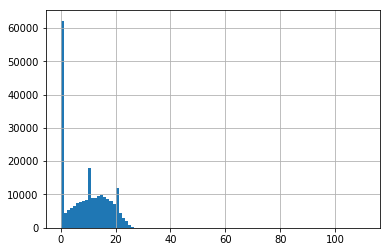

In [403]:
df.Age_eldest_child.hist(bins =100)

In [420]:
df.Age_eldest_child.hist(bins =100)

TypeError: from_formula() missing 1 required positional argument: 'data'

In [215]:
print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))


                                                  Start_to_work_father Start_to_work_mother Stop_to_work_father Stop_to_work_mother
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.0676***           -0.9200***           -2.3622***          -1.5499***         
                                                  (0.0766)             (0.0573)             (0.0511)            (0.0476)           
child_1[T.True]                                   0.0778**             0.0291               -0.3077***          -0.4570***         
                                                  (0.0395)             (0.0329)             (0.0268)            (0.0271)           
child_2[T.True]                                   0.0157               0.1447***            -0.5965***          -0.6111***         
                                                  (0.0336)             (0.0

#### By looking at DADS

In [ ]:
(df.ZVALM_2011<=200).value_counts(normalize = True)

### Retirement

In [216]:
df["Father_get_retired"] = ((df["YRSTI_2011_father"]<2000) & (df["YRSTI_2014_father"]>6000)).astype("int")
df["Mother_get_retired"] = ((df["YRSTI_2011_mother"]<2000) & (df["YRSTI_2014_mother"]>6000)).astype("int")

In [430]:
###Basic
max_child = 4
regression_fit_list = list()

for parent in ["Father", "Mother"]:
    endogenous_var = "{}_get_retired".format(  parent)
    m = sm.Probit.from_formula("({})~   {} + Baby_in_household+Age_father+Age_mother".format(endogenous_var,
            ' + '.join(children_number[:max_child]+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                       flatten_thresholds_list+hardcoded_between[:max_child]+hardcoded_over[:max_child]))
                        , df.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))"+
                                  "&(NBPAC_2011 == NBPAC_2014)&(NBPAC_2011 <= @max_child)&(@both_wage)")) #SAME NBPAC
    fit = m.fit(maxiter=100)
    regression_fit_list.append(fit)

print(summary_col(regression_fit_list, stars = True, info_dict={'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}))

         Current function value: 0.136523
         Iterations: 100


C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.099597
         Iterations: 100

                                            Father_get_retired Mother_get_retired
---------------------------------------------------------------------------------
Intercept                                   -3.4054***         -3.3950***        
                                            (0.0767)           (0.0909)          
child_1[T.True]                             -0.2229***         -0.3492***        
                                            (0.0445)           (0.0549)          
child_2[T.True]                             -0.6678***         -1.0226***        
                                            (0.0389)           (0.0622)          
child_3[T.True]                             -0.8725***         -0.8783***        
                                            (0.0519)           (0.0640)          
child_4[T.True]                             -0.9056***         -0.8452***        
                              

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"+
                              "&(NBPAC_2011 == NBPAC_2014)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , df.query("(200000>Rbg_2011>50000)"+
                              "&(NBPAC_2011 == NBPAC_2014)&(ZPERM_2011<50)&(ZPERM_2014<50)")) #SAME NBPAC
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , reg_df_same_NBPAC.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , reg_df_same_NBPAC.query("((200000>Rbg_2011>50000)&(200000>Rbg_2014>50000))&(ZPERM_2011<50)&(ZPERM_2014<50)"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , reg_df_same_NBPAC.query("((200000>Rbg_2011>50000)|(200000>Rbg_2014>50000))&(ZRSTM_2014<50)"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , reg_df_same_NBPAC.query("(200000>Rbg_2011>50000)|(200000>Rbg_2014>50000)&(ZPERM_2011<50)"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
## Controls
# m = sm.OLS.from_formula("(Delta_rbg)~   {} + child_1:Over_threshold_3_child + child_2:Over_threshold_3_child+ child_3:Over_threshold_4_child".format(
#         ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
#                   between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
#                   interaction_child_between_threshold+interaction_child_over_threshold))
#                     , reg_df_same_NBPAC)
# fit = m.fit()
# summary = fit.summary(); print(summary)

In [ ]:
## Controls
# m = sm.OLS.from_formula("(Delta_rbg)~   {}  ".format(
#         ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
#                   between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
#                   interaction_child_between_threshold+interaction_child_over_threshold))
#                     , reg_df_same_NBPAC.query("NBPAC_2011>0"))
# fit = m.fit()
# summary = fit.summary(); print(summary)

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                    , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
#Logarithm
# df_temp = reg_df_same_NBPAC[reg_df_same_NBPAC.Rbg_2011>0]
# m = sm.OLS.from_formula("np.log(Rbg_2014/Rbg_2011)~   {}  ".format(
#         ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
#                   between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
#                   interaction_child_between_threshold+interaction_child_over_threshold))
#                     , df_temp)
# fit = m.fit()
# summary = fit.summary(); print(summary)

In [ ]:
## RLM
# m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
#         ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
#                   between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
#                   interaction_child_between_threshold+interaction_child_over_threshold))
#                     , reg_df_same_NBPAC)
# fit = m.fit()
# summary = fit.summary(); print(summary)

## Young vs. Old

In [ ]:
df.Age_father.mean()

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                                                                                        , reg_df_same_NBPAC.query("(Age_father<=46)"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                                                                                        , reg_df_same_NBPAC.query("(Age_father>46)"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                                                                                        , reg_df_same_NBPAC.query("NBPAC_2011!=0"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
between_threshold_for_child_rank[0]

In [ ]:
### Stays in same treatment
# m = sm.OLS.from_formula("(Delta_rbg)~   {}  ".format(
#         ' + '.join(children_number+ #below_threshold_for_child_rank+interaction_child_below_thresholds
#                   between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
#                   interaction_child_between_threshold+interaction_child_over_threshold))
#                                                                                         , reg_df_same_NBPAC.query("Stays_in_same_treatment==True"))
# fit = m.fit()
# summary = fit.summary(); print(summary)

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {} +Rbg_splines ".format(
        ' + '.join(children_number #below_threshold_for_child_rank+interaction_child_below_thresholds
                  +between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                                                                                        , reg_df_same_NBPAC.sample(frac = 1))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
sm.QuantReg.from_formula("(Delta_rbg)~   {} ".format(
        ' + '.join(children_number+interaction_child_over_threshold[:-3]
                   
                 ))
            , reg_df_same_NBPAC.sample(frac = 1)).fit(q =0.95).summary()

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [ ]:
reg_df_same_NBPAC.loc[((reg_df_same_NBPAC.Age_me>58)&(reg_df_same_NBPAC.Age_me<62)), 'Likely_to_get_retired'] = True

In [ ]:
reg_df_same_NBPAC["Delta_ZIMPOM"] = reg_df_same_NBPAC.ZIMPOM_2014 - reg_df_same_NBPAC.ZIMPOM_2011

In [ ]:
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interaction_child_over+interactions_rbg_over+interactions_rbg_between))
            , reg_df_same_NBPAC.sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
interaction

In [ ]:
crmi=child_rank_min = 0
crma = child_rank_max = 7
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[crmi:crma]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[crmi:crma]+interaction_child_over_threshold[crmi:crma]))
                    , reg_df_same_NBPAC
                       )
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
df.Age_father.isnull().value_counts()

In [ ]:
crmi=child_rank_min = 0
crma = child_rank_max = 7
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[crmi:crma]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[crmi:crma]+interaction_child_over_threshold[crmi:crma]))
                    , reg_df_same_NBPAC.query("(Age_me<45)&(Age_wo<45)  \
                                      & (ZIMPOM_2011>0) &(ZIMPOM_2014>0)&(NBPAC_2011!={} ) &(NBPAC_2011<={} ) ".
                                        format(crmi, crma,))
                       )
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:

m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
                    , reg_df_same_NBPAC.query("(Age_me<45)&(Age_wo<45)  \
                                      & (ZIMPOM_2011>0) &(ZIMPOM_2014>0) ")
                       )
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
# m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
#         ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
#             , reg_df_same_NBPAC.query("(Age_me<45) \
#                                       & (ZIMPOM_2011>0) &(ZIMPOM_2014>0) ").sample(frac = 1))
# fit = m.fit()
# fit.conf_int()
# summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
# m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
#         ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
#             , reg_df_same_NBPAC.query("(Age_me<45) \
#                                       & (ZIMPOM_2011>0) &(ZIMPOM_2014>0) ").sample(frac = 1))
# fit = m.fit()
# fit.conf_int()
# summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
# m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
#         ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
#             , reg_df_same_NBPAC.query("(Age_me<45) \
#                                       & (ZIMPOM_2011>0) &(ZIMPOM_2014>0) ").sample(frac = 1))
# fit = m.fit()
# fit.conf_int()
# summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
### Do not modify put in article !
m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {}+  "
    " (Delta_rbg:child_1):Between_threshold_1_child - Delta_rbg:child_1:Between_threshold_1_child[False] ".format(
        ' + '.join(children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_over_threshold[:]))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
from patsy import ModelDesc

In [ ]:
ModelDesc.from_formula("y~a.b")

In [ ]:
# m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {}+  "
#     " (child_1):Between_threshold_1_child+"
#    " Delta_rbg:child_2/Between_threshold_2_child+Delta_rbg/child_3/Between_threshold_3_child +Delta_rbg/child_4/Between_threshold_4_child ".format(
#         ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
#                   interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
#                                                                                         , reg_df_same_NBPAC.sample(frac = 0.5))
# fit = m.fit()
# summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC.Over_threshold_1_child = reg_df_same_NBPAC.Over_threshold_1_child.astype("bool")

In [ ]:
reg_df_same_NBPAC["Interactions_rbg_child1_between"] = reg_df_same_NBPAC.eval("Delta_rbg*child_1*Between_threshold_1_child")
reg_df_same_NBPAC["Interactions_rbg_child2_between"] = reg_df_same_NBPAC.eval("Delta_rbg*child_2*Between_threshold_2_child")
reg_df_same_NBPAC["Interactions_rbg_child3_between"] = reg_df_same_NBPAC.eval("Delta_rbg*child_3*Between_threshold_3_child")
reg_df_same_NBPAC["Interactions_rbg_child4_between"] = reg_df_same_NBPAC.eval("Delta_rbg*child_4*Between_threshold_4_child")
reg_df_same_NBPAC["Interactions_rbg_child5_between"] = reg_df_same_NBPAC.eval("Delta_rbg*child_5*Between_threshold_5_child")
reg_df_same_NBPAC["Interactions_rbg_child6_between"] = reg_df_same_NBPAC.eval("Delta_rbg*child_6*Between_threshold_6_child")



reg_df_same_NBPAC["Interactions_rbg_child1_over"] = reg_df_same_NBPAC.eval("Delta_rbg*child_1*Over_threshold_1_child")
reg_df_same_NBPAC["Interactions_rbg_child2_over"] = reg_df_same_NBPAC.eval("Delta_rbg*child_2*Over_threshold_2_child")
reg_df_same_NBPAC["Interactions_rbg_child3_over"] = reg_df_same_NBPAC.eval("Delta_rbg*child_3*Over_threshold_3_child")
reg_df_same_NBPAC["Interactions_rbg_child4_over"] = reg_df_same_NBPAC.eval("Delta_rbg*child_4*Over_threshold_4_child")
reg_df_same_NBPAC["Interactions_rbg_child5_over"] = reg_df_same_NBPAC.eval("Delta_rbg*child_5*Over_threshold_5_child")
reg_df_same_NBPAC["Interactions_rbg_child6_over"] = reg_df_same_NBPAC.eval("Delta_rbg*child_6*Over_threshold_6_child")


reg_df_same_NBPAC["Interactions_child1_over"] = (reg_df_same_NBPAC["child_1"]* reg_df_same_NBPAC["Over_threshold_1_child"]).astype("int")
reg_df_same_NBPAC["Interactions_child2_over"] = (reg_df_same_NBPAC["child_2"]* reg_df_same_NBPAC["Over_threshold_2_child"]).astype("int")
reg_df_same_NBPAC["Interactions_child3_over"] = (reg_df_same_NBPAC["child_3"]* reg_df_same_NBPAC["Over_threshold_3_child"]).astype("int")
reg_df_same_NBPAC["Interactions_child4_over"] = (reg_df_same_NBPAC["child_4"]* reg_df_same_NBPAC["Over_threshold_4_child"]).astype("int")
reg_df_same_NBPAC["Interactions_child5_over"] = (reg_df_same_NBPAC["child_5"]* reg_df_same_NBPAC["Over_threshold_5_child"]).astype("int")
reg_df_same_NBPAC["Interactions_child6_over"] = (reg_df_same_NBPAC["child_6"]* reg_df_same_NBPAC["Over_threshold_6_child"]).astype("int")


In [ ]:
interactions_rbg_between = ["Interactions_rbg_child{}_between".format(child) for child in range(1,7)]
interactions_rbg_over = ["Interactions_rbg_child{}_over".format(child) for child in range(1,7)]
interactions_child_over = ["Interactions_child{}_over".format(child) for child in range(1,7)]

In [ ]:
m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC["Delta_Rbg_times_not_touched_reform"] = reg_df_same_NBPAC.Not_touched_by_reform * reg_df_same_NBPAC.Delta_rbg

In [ ]:
reg_df_same_NBPAC["Delta_ZIMPOM"] = reg_df_same_NBPAC.ZIMPOM_DECL_2014 - reg_df_same_NBPAC.ZIMPOM_2011

In [ ]:
### To_keep article !!
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.query("(200000>Rbg_2011>50000)|(200000>Rbg_2014>50000)").sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
### To_keep article !!
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.query("(200000>Rbg_2011>50000)&(200000>Rbg_2014>50000)").sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
print (reg_df_same_NBPAC.ZIMPOM14_2014 >= 0).value_counts()
print (reg_df_same_NBPAC.ZIMPOM_2011 >= 0).value_counts()

In [ ]:
reg_df_same_NBPAC["Delta_Rbg_times_not_touched_reform"] = reg_df_same_NBPAC.Not_touched_by_reform * reg_df_same_NBPAC.Delta_rbg

In [ ]:
### To_keep article !!
m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.query("Stays_in_same_treatment").sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
### To_keep article !!
m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
### To_keep article !!
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
### only those hom pays tax
m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.query("(ZIMPOM14_2014>0) & (ZIMPOM_2011>0)").sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:
### only those hom pays tax
m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.query("(ZIMPOM14_2014>0) & (ZIMPOM_2011>0)").sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:

m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {} - 1".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.sample(frac = 1))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:

m = sm.OLS.from_formula("(Delta_ZIMPOM)~   {} - 1".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
                                                                                        , reg_df_same_NBPAC.sample(frac = 1))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
import numpy as np

In [ ]:
np.sqrt(145)

In [ ]:
30*0.8+14*0.2

In [ ]:
0.37*0.14+(1-0.38)*0.3

In [ ]:
17*30/14

In [ ]:
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {}+  "
    " (child_1):Between_threshold_1_child+Delta_rbg/child_2/Between_threshold_2_child+Delta_rbg/child_3/Between_threshold_3_child +Delta_rbg/child_4/Between_threshold_4_child ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
                                                                                        , reg_df_same_NBPAC.sample(frac = 0.5))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
any_rank_interation_between = list()
for threshold in between_threshold_for_child_rank:
    any_rank_interation_between +=  ["{}:{}".format(child,threshold) for child in children_number]
any_rank_interation_over = list()
for threshold in over_threshold_for_child_rank:
    any_rank_interation_over +=  ["{}:{}".format(child,threshold) for child in children_number]

###### pOTENTIAL ROBUSTNESS CHECK

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {} + Between_threshold_3_child:child_4".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold+ any_rank_interation_between+any_rank_interation_over ))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit()
#summary = fit.summary(); print(summary)

In [ ]:
reg_df["Birth"] = (reg_df.NBPAC_2011 < reg_df.NBPAC_2014).astype('int')
(reg_df.NBPAC_2011 < reg_df.NBPAC_2014).value_counts(normalize = False)

### Add control variables to triple diff

In [ ]:
# Age pere, Age mere, localité, Taille appartement (CSDEP_2011), 
# date d'entrée dans le local (fisc_l Datepers), nombre de pièces (fisc_l, NBPIEC), OCC code occupation du local
#Education

In [ ]:
fisc_logement = load_fisc_l_by_year(2014)

In [ ]:
fisc_logement.OCC.value_counts(dropna=False)

In [ ]:
fisc_logement["Proprietaire"] = fisc_logement.OCC == "P"

In [ ]:
reg_df_same_NBPAC["ID_FISC_LOG_DIFF"] = reg_df_same_NBPAC.ID_FISC_LOG_DIFF_2014

In [ ]:
reg_df_same_NBPAC_log = pd.merge(reg_df_same_NBPAC, fisc_logement, on = "ID_FISC_LOG_DIFF")

In [ ]:
reg_df_same_NBPAC_log["Anciennete_dans_logement"] = 2015 - reg_df_same_NBPAC_log.DATEPERS.astype("int64")
reg_df_same_NBPAC_log["Rbg_2011_squared"] = reg_df_same_NBPAC_log.Rbg_2011 **2

In [ ]:
#reg_df_same_NBPAC_log.CSDEP_2014.value_counts(dropna = False)

In [ ]:
reg_df_same_NBPAC_log["CSDEP"] = reg_df_same_NBPAC_log.CSDEP_2014.replace({"2A": "40", "2B":"40"}).astype("int")

In [ ]:
reg_df_same_NBPAC_log.shape

In [ ]:
reg_df_same_NBPAC_log["Age_wo_squared"] = reg_df_same_NBPAC_log.Age_wo **2
reg_df_same_NBPAC_log["Age_me_squared"] = reg_df_same_NBPAC_log.Age_me ** 2 

In [ ]:
(( merge.ZTSAM_2011*0.9) + merge.ZRAGM_2011 + merge.ZRACM_2011 + merge.ZRNCM_2011 + merge.ZFONM_2011 + merge.ZPERM_2011*0.9
                    + merge.ZRICM_2011)

In [ ]:
only_wage_income = reg_df_same_NBPAC_log[["ZRAGM_2011", "ZRACM_2011","ZRNCM_2011", "ZFONM_2011", "ZPERM_2011", "ZRICM_2011",
                                             "ZRAGM_2014", "ZRACM_2014","ZRNCM_2014", "ZFONM_2014", "ZPERM_2014", "ZRICM_2014"]].sum(axis = 1) == 0

In [ ]:
only_wage_or_retirement_income = reg_df_same_NBPAC_log[["ZSALM","ZRAGM_2011", "ZRACM_2011","ZRNCM_2011", "ZFONM_2011", "ZRICM_2011",
                                             "ZRAGM_2014", "ZRACM_2014","ZRNCM_2014", "ZFONM_2014", "ZRICM_2014"]].sum(axis = 1) == 0

In [ ]:
only_liberals_income = reg_df_same_NBPAC_log[["ZRAGM_2011", "ZRACM_2011","ZSALM_2011", "ZFONM_2011", "ZPERM_2011", "ZRICM_2011",
                                             "ZRAGM_2014", "ZRACM_2014","ZSALM_2014", "ZFONM_2014", "ZPERM_2014", "ZRICM_2014"]].sum(axis = 1) == 0

In [ ]:
only_wage_income.shape

In [ ]:
reg_df_same_NBPAC_log["Delta_ZRNCM"] =  reg_df_same_NBPAC_log.ZRNCM_2011- reg_df_same_NBPAC.ZRNCM_2011

In [ ]:

m = sm.RLM .from_formula("(Delta_Rbg)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:-2]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:-2]+interaction_child_over_threshold[:-2]))
        + "+ Proprietaire +CSDEP +Age_Elder_child+Age_Youngest_child"
                                            , reg_df_same_NBPAC_log.query("(NBPAC_2011<5)&(ZRNCM_2011>0)").sample(frac = 1))
fit = m.fit()
summary = fit.summary(); print(summary)                                                                                                                                                                                                                                                                                                 

In [ ]:
m = sm.RLM.from_formula("(Delta_ZIMPOM)~   {} - 1 + Not_touched_by_reform + Delta_Rbg_times_not_touched_reform".format(
        ' + '.join( interactions_child_over+interactions_rbg_over+interactions_rbg_between))
            , reg_df_same_NBPAC.query("(Age_me<45) \
                                      (NBPAC_2011<5)&(ZRNCM_2011>0)").sample(frac = 1))
fit = m.fit()
fit.conf_int()
summary = fit.summary(alpha = 0.01); print(summary)

In [ ]:

m = sm.RLM .from_formula("(Delta_ZIMPOM)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:-2]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:-2]+interaction_child_over_threshold[:-2]))
                                            , reg_df_same_NBPAC_log[only_wage_or_retirement_income].query("NBPAC_2011<5").sample(frac = 1))
fit = m.fit()
summary = fit.summary(); print(summary)                                                                                                                                                                                                                                                                                                 

In [ ]:
m = sm.RLM .from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared"
                , reg_df_same_NBPAC_log.query("(Age_me<55)& ((NBPAC_2011!=0 ))").sample(frac = 1))
fit = m.fit()
summary = fit.summary(); print(summary)                                                                                                                                                                                                                                                                                                 

In [ ]:
reg_df_same_NBPAC_log["Mean_age_y_e_children"] = (reg_df_same_NBPAC_log.Age_Elder_child+reg_df_same_NBPAC.Age_Youngest_child)/2

In [ ]:
below_threshold_for_child_rank = ["Below_thresholds_{}_child_rbg_2014".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
interaction_child_below_thresholds  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, below_threshold_for_child_rank)]

In [ ]:

for nb_enf in range(1,7):
    reg_df_same_NBPAC_log["Below_thresholds_{}_child_rbg_2014".format(nb_enf)] = np.zeros(reg_df_same_NBPAC_log.shape[0])
for nb_enf in range(1,7):
    reg_df_same_NBPAC_log["Below_thresholds_{}_child_rbg_2014".format(nb_enf)
          ] +=((reg_df_same_NBPAC_log.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])).astype("float")

    


In [ ]:
reg_df_same_NBPAC_log["Has_child"] = (reg_df_same_NBPAC_log.NBPAC_2011>0).astype("int")
reg_df_same_NBPAC_log.Has_child.value_counts(dropna=False)

In [ ]:
reg_df_same_NBPAC_log["Touched_by_reform_bool"] = ~ reg_df_same_NBPAC_log.Not_touched_by_reform_bool.astype("bool")

In [ ]:
reg_df_same_NBPAC_log["Not_touched_by_reform_bool"] = reg_df_same_NBPAC_log["Not_touched_by_reform"].astype("bool")

In [ ]:
(reg_df_same_NBPAC_log.Below_thresholds_1_child_rbg_2014 == reg_df_same_NBPAC_log.child_1).value_counts()

In [ ]:
df_not_touched = reg_df_same_NBPAC_log.query("Not_touched_by_reform_bool")

In [ ]:
df_not_touched.query("Over_threshold_5_child").NBPAC_2011.value_counts()

In [ ]:
interaction_child_below_thresholds  = ["child_2:Below_thresholds_5_child_rbg_2014"]

m = sm.OLS.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(children_number+below_threshold_for_child_rank))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+YSALI_wo_2011"
        + "+Age_Elder_child:Has_child + Age_Youngest_child:Has_child+Mean_age_y_e_children:Has_child"
        #+"+Age_Elder_child:child_1+Age_Elder_child:child_2+Age_Elder_child:child_3+Age_Elder_child:child_4+Age_Elder_child:child_5"
        #+"+Age_Youngest_child:child_1+Age_Youngest_child:child_2+Age_Youngest_child:child_3+Age_Youngest_child:child_4+Age_Youngest_child:child_5"
                                                                                        , reg_df_same_NBPAC_log.query("Not_touched_by_reform_bool"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold)) , reg_df_same_NBPAC)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC_log["CNE"] = reg_df_same_NBPAC_log.CNE.astype("str")

In [ ]:
reg_df_same_NBPAC_log.shape

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} + ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        + "AGERF_2011 +Anciennete_dans_logement + Rbg_2011_squared   "
        + "+YSALI_wo_2011+YSALI_me_2011 " + "+Age_Youngest_child+Rbg_splines"
#        + "+ Age_Youngest_child:child_1+ Age_Youngest_child:child_2 + Age_Youngest_child:child_3++ Age_Youngest_child:child_4+ Age_Youngest_child:child_5"# CSDEP_2011+CHAUFF + CNE
#        +  "+ Age_Elder_child:child_1+ Age_Elder_child:child_2 + Age_Elder_child:child_3++ Age_Elder_child:child_4+ Age_Elder_child:child_5"                                                                        
                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

### Tres bon robustness check ! 

Mais on ne devrait rien avoir de significatif...

In [ ]:
m = sm.OLS.from_formula("(counterfactual_delta_rbg)~   {} + ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        + "AGERF_2011 +Anciennete_dans_logement + Rbg_2011_squared   "
        + "+YSALI_wo_2011+YSALI_me_2011 " + "+Age_Youngest_child"
#        + "+ Age_Youngest_child:child_1+ Age_Youngest_child:child_2 + Age_Youngest_child:child_3++ Age_Youngest_child:child_4+ Age_Youngest_child:child_5"# CSDEP_2011+CHAUFF + CNE
#        +  "+ Age_Elder_child:child_1+ Age_Elder_child:child_2 + Age_Elder_child:child_3++ Age_Elder_child:child_4+ Age_Elder_child:child_5"                                                                        
                        , reg_df_same_NBPAC_log.sample(frac = 0.5))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC_log_not_dropped_by_statsmodels = reg_df_same_NBPAC_log.drop(m.data.missing_row_idx)

In [ ]:
reg_df_same_NBPAC_log_not_dropped_by_statsmodels.shape

In [ ]:
fit.fittedvalues.shape

In [ ]:
fit.resid.shape

In [ ]:
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_1*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_1_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_2*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_2_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_3*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_3_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_4*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_4_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_5*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_5_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_6*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_6_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_6*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_6_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_1*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_1_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_2*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_2_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_3*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_3_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_4*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_4_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_5*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_5_child  )
print np.mean(fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_6*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_6_child  )


In [ ]:
reg_df_same_NBPAC_log.child_1.shape

In [ ]:
fit.resid.shape

In [ ]:
from scipy import stats

In [ ]:
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_1*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_1_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_2*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_2_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_3*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_3_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_4*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_4_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_5*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_5_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_6*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Over_threshold_6_child) , 0)
print "\n"
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_1*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_1_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_2*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_2_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_3*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_3_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_4*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_4_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_5*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_5_child) , 0)
print stats.ttest_1samp((fit.resid * reg_df_same_NBPAC_log_not_dropped_by_statsmodels.child_6*reg_df_same_NBPAC_log_not_dropped_by_statsmodels.Between_threshold_6_child) , 0)


In [ ]:
print reg_df_same_NBPAC_log.Over_threshold_1_child.isnull().value_counts()
print reg_df_same_NBPAC_log.child_1.isnull().value_counts()
print fit.resid.isnull().value_counts()

In [ ]:
print fit.resid[(fit.resid * reg_df_same_NBPAC_log.child_1).isnull()]

In [ ]:
fit.resid.shape

In [ ]:
reg_df_same_NBPAC_log.child_1.shape

In [ ]:
print (reg_df_same_NBPAC_log.child_1*reg_df_same_NBPAC_log.Over_threshold_1_child).isnull().value_counts()

In [ ]:
(fit.resid * reg_df_same_NBPAC_log.child_1*reg_df_same_NBPAC_log.Over_threshold_1_child)[
    (fit.resid * reg_df_same_NBPAC_log.child_1*reg_df_same_NBPAC_log.Over_threshold_1_child).isnull()]

In [ ]:
stats.ttest_1samp([1,2,3] , 0)

In [ ]:
(fit.resid * reg_df_same_NBPAC_log.child_1*reg_df_same_NBPAC_log.Over_threshold_1_child).describe()

In [ ]:
(fit.resid[reg_df_same_NBPAC_log.Over_threshold_1_child ] 
 * (reg_df_same_NBPAC_log.child_1*reg_df_same_NBPAC_log.Over_threshold_1_child)[reg_df_same_NBPAC_log.Over_threshold_1_child ] 
).mean()

In [ ]:
sm.stats.ttest_ind((fit.resid * reg_df_same_NBPAC_log.child_1*reg_df_same_NBPAC_log.Over_threshold_1_child)[:900],
                   np.zeros(fit.resid.shape[0]))

### Elasticity a la Gruber Saez (2002)

##### Change in MTR

$log(z_1$

In [238]:
reg_df_same_NBPAC_log["log_ratio_income"] = np.log(reg_df_same_NBPAC_log.Rbg_2014/reg_df_same_NBPAC_log.Rbg_2011)

NameError: name 'reg_df_same_NBPAC_log' is not defined

In [ ]:
import importlib
year = 2014

In [240]:
ir = ir_2014

In [242]:
parts_fiscales_enfants = ir.parts_fiscales_enfants(df.NBPAC_2011)

In [244]:
df["ZTSAM_10_percent_2014"] =  df["ZTSAM_2014"]*0.9


df["Irpp_2014"] = ir.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)
df["Irpp_2014_plus_10_euros"] = ir.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, parts_fiscales_enfants)

df["Counterfactual_Irpp_2014"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014, parts_fiscales_enfants)
df["Counterfactual_Irpp_2014_plus_10_euros"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2014+10, parts_fiscales_enfants)

df["Irpp_2011"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Irpp_2011_plus_10_euros"] = ir_2011.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, parts_fiscales_enfants)



df["Counterfactual_Irpp_2011"] = ir.ir_avec_plafond_qf_enfant(df.Rbg_2011, parts_fiscales_enfants)
df["Counterfactual_Irpp_2011_plus_10_euros"] = ir.ir_avec_plafond_qf_enfant(df.Rbg_2011+10, parts_fiscales_enfants)

(0, 15000)

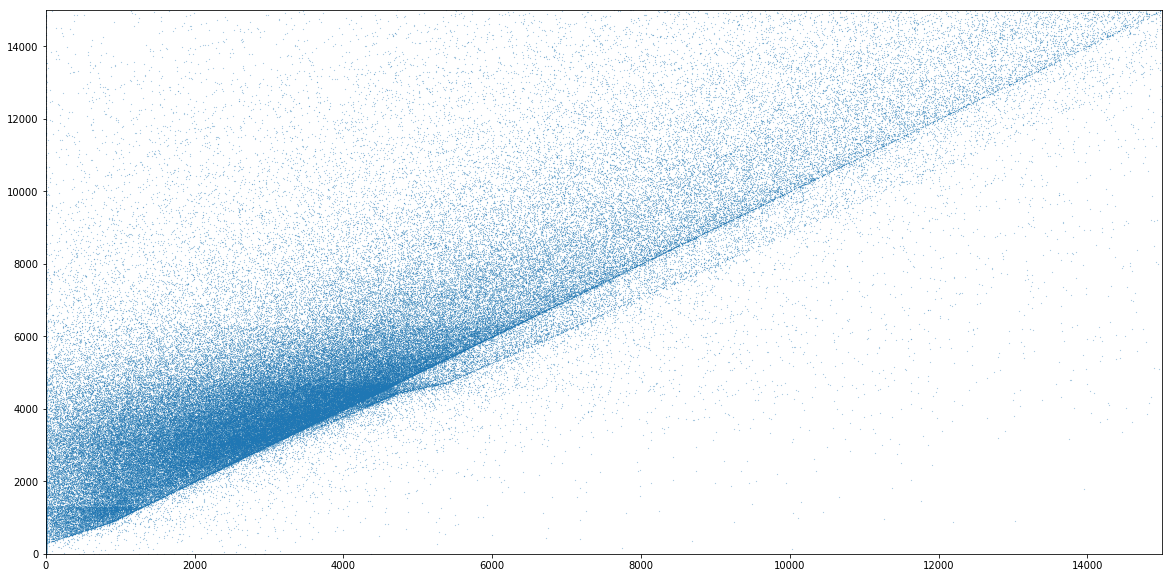

In [245]:
fig = plt.figure(figsize=(20,10))
plt.scatter(df.ZIMPOM_2011,df.Irpp_2011, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(0, 15000)

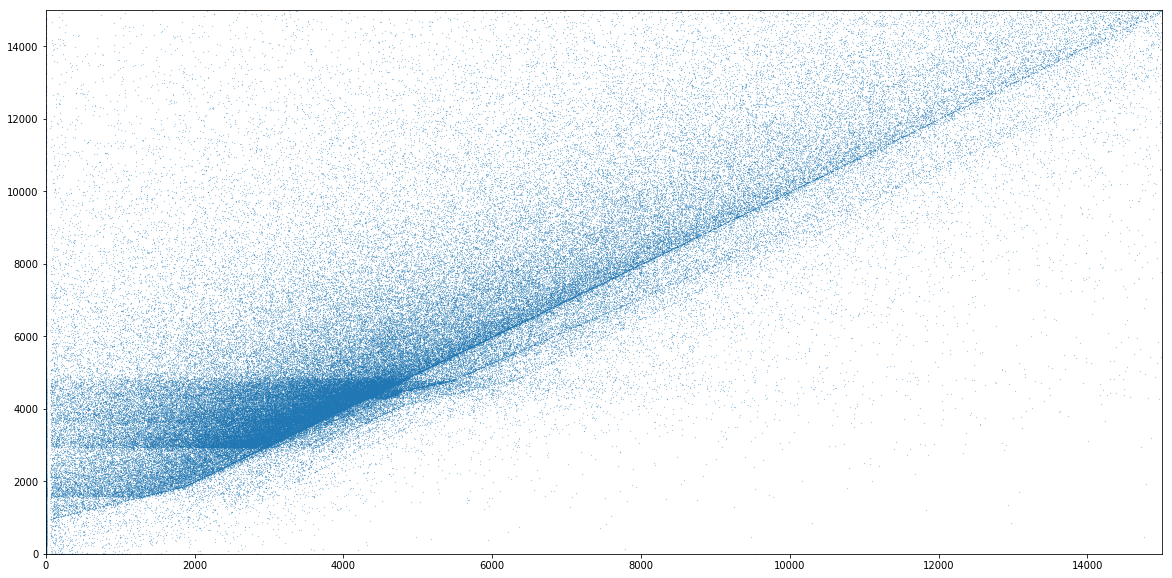

In [251]:
fig = plt.figure(figsize=(20,10))
df_temp = df#.query("NBPAC_2011 == 2")
plt.scatter(df_temp.ZIMPOM_DECL_2014,df_temp.Irpp_2014, s=0.02 )
plt.xlim(0,15000)
plt.ylim(0,15000)

(-10000, 10000)

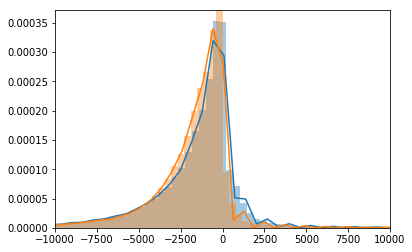

In [252]:
erreur_impot = df.ZIMPOM_DECL_2014 - df.Irpp_2014
erreur_impot = erreur_impot[erreur_impot<10000]
sns.distplot(erreur_impot, bins = 200, )
plt.xlim(-10000,10000)

erreur_impot = df.ZIMPOM_2011 - df.Irpp_2011
erreur_impot = erreur_impot[erreur_impot<10000]
sns.distplot(erreur_impot, bins = 200, )
plt.xlim(-10000,10000)

(-10000, 10000)

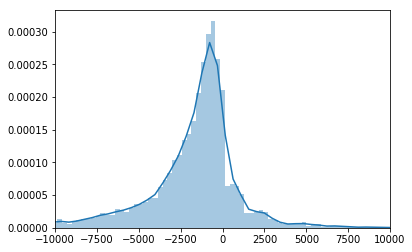

In [255]:
erreur_impot = df.query('NBPAC_2011==4').ZIMPOM_DECL_2014 - df.query('NBPAC_2011==4').Irpp_2014
erreur_impot = erreur_impot[erreur_impot<10000]
sns.distplot(erreur_impot, bins = 200, )
plt.xlim(-10000,10000)

(-5000, 10000)

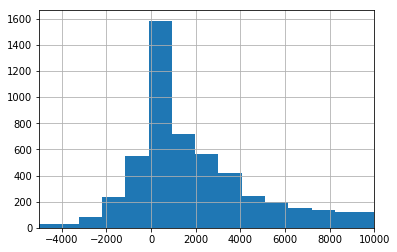

In [260]:
df.query('NBPAC_2011==4').ZIMPOM_DECL_2014.hist(bins = 500)
plt.xlim(-5000,10000)

(-10000, 10000)

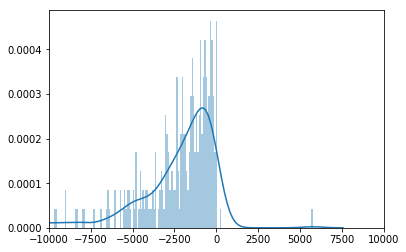

In [261]:
erreur_impot = df.query('NBPAC_2011==6').ZIMPOM_2011 - df.query('NBPAC_2011==6').Irpp_2011
erreur_impot = erreur_impot[erreur_impot<10000]
sns.distplot(erreur_impot, bins = 200, )
plt.xlim(-10000,10000)

In [262]:
reg_df_same_NBPAC_log.ZIMPOM14_2014.hist(bins = 1000)
plt.xlim(-5000,30000)

NameError: name 'reg_df_same_NBPAC_log' is not defined

### Taux marginal imposition

In [263]:
df["MTR_2014"] = np.round((df.Irpp_2014_plus_10_euros - df.Irpp_2014)/10,2)
df["MTR_2011"] = np.round((df.Irpp_2011_plus_10_euros - df.Irpp_2011)/10,2)

df["Counterfactual_MTR_2014"
                     ] = np.round((df.Counterfactual_Irpp_2014_plus_10_euros - df.Counterfactual_Irpp_2014)/10,2)

df["Counterfactual_MTR_2011"
                     ] = np.round((df.Counterfactual_Irpp_2011_plus_10_euros - df.Counterfactual_Irpp_2011)/10,2)

In [264]:
df.Counterfactual_MTR_2014.value_counts(normalize=True).head(5)

0.14    0.540593
0.30    0.402392
0.41    0.034678
0.05    0.012901
0.06    0.008427
Name: Counterfactual_MTR_2014, dtype: float64

In [265]:
df.Counterfactual_MTR_2011.value_counts(normalize=True).head(5)

0.14    0.518097
0.30    0.439296
0.41    0.024550
0.00    0.017846
0.21    0.000026
Name: Counterfactual_MTR_2011, dtype: float64

In [269]:
print(df.MTR_2011.value_counts(normalize=True).head(5))
df.MTR_2014.value_counts(normalize=True).head(5)

0.14    0.580233
0.30    0.343407
0.05    0.029327
0.41    0.026022
0.06    0.018886
Name: MTR_2011, dtype: float64


0.30    0.519124
0.14    0.441055
0.41    0.032606
0.00    0.006915
0.24    0.000031
Name: MTR_2014, dtype: float64

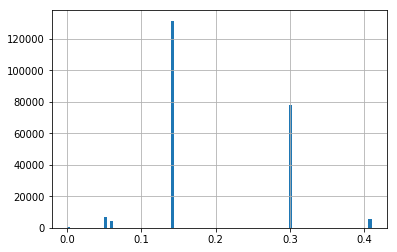

In [268]:
df["MTR_2011"].hist(bins = 100)

In [ ]:
reg_df_same_NBPAC_log["MTR_2014"].hist(bins = 100)

In [ ]:
(reg_df_same_NBPAC_log.Counterfactual_MTR_2014>reg_df_same_NBPAC_log.MTR_2014).value_counts()

In [ ]:
((reg_df_same_NBPAC_log.log_ratio_MTR == reg_df_same_NBPAC_log.log_ratio_counterfactual_MTR)).value_counts()

In [ ]:
np.log((1-0.41)/(1-0.41))

In [ ]:
reg_df_same_NBPAC_log.MTR_2014.value_counts().head(4)

In [ ]:
#reg_df_same_NBPAC_log[(reg_df_same_NBPAC_log.Counterfactual_MTR_2014>reg_df_same_NBPAC_log.MTR_2014)][["NBPAC_2011","Rbg_2014", "Irpp_2014", "Counterfactual_Irpp_2014","MTR_2011", "Counterfactual_MTR_2014", "MTR_2014", "log_ratio_counterfactual_MTR", "log_ratio_MTR"]]

In [ ]:
#reg_df_same_NBPAC_log[["Counterfactual_MTR_2014", "MTR_2014"]]

In [ ]:
((reg_df_same_NBPAC_log.Irpp_2011_plus_10_euros - reg_df_same_NBPAC_log.Irpp_2011)/10).hist(bins = 100)

In [ ]:
((reg_df_same_NBPAC_log.Irpp_2014_plus_10_euros - reg_df_same_NBPAC_log.Irpp_2014)/10).hist(bins = 100)

In [ ]:
plt.figure(figsize=(15,10))
df_temp = reg_df_same_NBPAC_log.query("NBPAC_2011>=0")
ax = sns.countplot(x="value", hue = "variable", data = pd.melt(df_temp[["MTR_2011", "MTR_2014"]]),
              order = [0,0.05,0.14,0.3,0.41]) 
for p in ax.patches:
    height = p.get_height()
    height = np.nan_to_num(height)
    ax.text(p.get_x()+p.get_width()/2, height*(1+0.04), '{:1.1f}%'.format(
            (height/(len(df_temp)*2))*100), ha = "center", fontsize= 15)
plt.xlim(0,4.6)
plt.xlabel("Marginal Tax Rate", fontsize = 25)
plt.ylabel(u"Nombre de ménages", fontsize = 25)

In [ ]:
plt.figure(figsize=(15,10))
df_temp = reg_df_same_NBPAC_log.query("NBPAC_2011>=0")
ax = sns.countplot(x="value", hue = "variable", data = pd.melt(df_temp[["MTR_2011", "MTR_2014"]]),
              order = [0,0.05,0.14,0.3,0.41]) 
for p in ax.patches:
    height = p.get_height()
    height = np.nan_to_num(height)
    ax.text(p.get_x()+p.get_width()/2, height*(1+0.04), '{:1.1f}%'.format(
            (height/(len(df_temp)*2))*100), ha = "center", fontsize= 15)
plt.xlim(0,4.6)
plt.xlabel("Marginal Tax Rate", fontsize = 25)
plt.ylabel(u"Nombre de ménages", fontsize = 25)

In [ ]:

df_temp = reg_df_same_NBPAC_log.query("NBPAC_2011>=0")
ax = sns.countplot(x="value", hue = "variable", data = pd.melt(df_temp[["MTR_2011", "MTR_2014"]]),
              order = [0,0.05,0.14,0.3,0.41]) 
for p in ax.patches:
    height = p.get_height()
    height = np.nan_to_num(height)
    ax.text(p.get_x()+p.get_width()/2, height+2004, '{:1.1f}%'.format(
            (height/(len(df_temp)*2))*100), ha = "center")
plt.xlim(0,4.6)
plt.xlabel("Marginal Tax Rate")
plt.ylabel(u"Nombre de ménages")

In [ ]:
marginal_rates_2014 = ((reg_df_same_NBPAC_log.Irpp_2014_plus_10_euros - reg_df_same_NBPAC_log.Irpp_2014)/10)
marginal_rates_2011 = ((reg_df_same_NBPAC_log.Irpp_2011_plus_10_euros - reg_df_same_NBPAC_log.Irpp_2011)/10)

In [ ]:
df_mtr_2011 = pd.DataFrame({"MTR":marginal_rates_2011}); df_mtr_2011["Year"] = 2011
df_mtr_2014 = pd.DataFrame({"MTR":marginal_rates_2014}); df_mtr_2014["Year"] = 2014

In [ ]:
df_mtr = pd.concat((df_mtr_2011, df_mtr_2014))

In [ ]:
pd.round(df_mtr.MTR,2).value_counts()

Change marginal tax rate: 

In [ ]:
np.round(reg_df_same_NBPAC_log.MTR_2011, 2).value_counts()

In [ ]:
(np.abs(reg_df_same_NBPAC_log.MTR_2011 - reg_df_same_NBPAC_log.MTR_2014)<0.01).value_counts(normalize = True)

In [ ]:
((reg_df_same_NBPAC_log.MTR_2011 - reg_df_same_NBPAC_log.Counterfactual_MTR_2014)==0).value_counts(normalize = True)

In [ ]:
reg_df_same_NBPAC_log[["MTR_2011", "MTR_2014", "Counterfactual_MTR_2014", "Counterfactual_MTR_2011", "Rbg_2014", "Rbg_2011", "NBPAC_2011", "NBPAC_2014" ]].head()

Grueber saez : log(z_2014/z_2011) = beta_1 log[(1-MTR_2014)/(1-MTR_2011)] + beta_2 log[(z_2014 - T_2(z_2014))/(z_2011-T_2011(z_2011))]

In [ ]:
reg_df_same_NBPAC_log["log_ratio_income"] = np.log(reg_df_same_NBPAC_log.Rbg_2014/reg_df_same_NBPAC_log.Rbg_2011)
reg_df_same_NBPAC_log["log_ratio_MTR"] = np.log((1 - reg_df_same_NBPAC_log.MTR_2014)/(1-(reg_df_same_NBPAC_log.MTR_2011)))
reg_df_same_NBPAC_log["log_ratio_disp_income"] = np.log((reg_df_same_NBPAC_log.Rbg_2014 - reg_df_same_NBPAC_log.Irpp_2014)/
                                                        (reg_df_same_NBPAC_log.Rbg_2011 - reg_df_same_NBPAC_log.Irpp_2011))


reg_df_same_NBPAC_log["log_ratio_counterfactual_MTR"] = np.log((1 - reg_df_same_NBPAC_log.Counterfactual_MTR_2014)/(1-(reg_df_same_NBPAC_log.MTR_2011)))
reg_df_same_NBPAC_log["log_ratio_counterfactual_disp_income"] = np.log((reg_df_same_NBPAC_log.Rbg_2014 - reg_df_same_NBPAC_log.Counterfactual_Irpp_2014)/
                                                        (reg_df_same_NBPAC_log.Rbg_2011 - reg_df_same_NBPAC_log.Irpp_2011))                                            

In [ ]:
m = sm.OLS.from_formula("(log_ratio_income)~  log_ratio_MTR +log_ratio_disp_income + "                                            
                        +"+Age_me+Age_wo+Age_wo_squared + child_1*log_ratio_MTR + child_2*log_ratio_MTR + child_3*log_ratio_MTR + child_4*log_ratio_MTR+ child_5*log_ratio_MTR"
                        +"+ child_1*log_ratio_disp_income + child_2*log_ratio_disp_income + child_3*log_ratio_disp_income + child_4*log_ratio_disp_income+ child_5*log_ratio_disp_income", reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
import statsmodels

In [ ]:
reg_df_same_NBPAC_log.to_csv("C:/Users/IMPTEMP_A_PACIFIC/Desktop/reg_df_same_NBPAC_log.csv")

In [ ]:
m = sm.RLM.from_formula("(log_ratio_income)~  log_ratio_MTR + log_ratio_disp_income "                                            
                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

### Counterfactual instrument 

In [ ]:
#reg_df_same_NBPAC_log.Age_me.value_counts()

In [ ]:
m = sm.OLS.from_formula("(log_ratio_income)~  log_ratio_MTR +log_ratio_income + "                                            
                        +"+np.log(Age_me)+np.log(Age_wo) ", reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(log_ratio_income)~  log_ratio_MTR + log_ratio_disp_income + \
                        log_ratio_MTR:child_1 +log_ratio_MTR:child_2 + log_ratio_MTR:child_3 + log_ratio_MTR:child_4 + log_ratio_MTR:child_5+Rbg_2011\
                        +log_ratio_income:child_1 +log_ratio_income:child_2 + log_ratio_income:child_3 + log_ratio_income:child_4 + log_ratio_income:child_5+Rbg_2011"                                            
                        +"+Age_me+Age_wo+Age_wo_squared ", reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
np.corrcoef(reg_df_same_NBPAC_log.log_ratio_MTR,reg_df_same_NBPAC_log.log_ratio_disp_income )

### Estimate the income growth (counterfactual income in the absence of the reform)

Deduce the income one would have in the absence of the reform. Strategy : run an estimation of those not touched by the reform then compute the counterfactual income of every one. Then do that multiple times such that the rise in income would not imply to be touched by the reform for any household.

In [ ]:
reg_df_same_NBPAC_log_save = reg_df_same_NBPAC_log.copy()

In [ ]:
reg_df_same_NBPAC_log["Proprietaire"] = reg_df_same_NBPAC_log.Proprietaire.astype("int")

In [ ]:
# #%%time
# df_temp =  reg_df_same_NBPAC_log.query("Not_touched_by_reform")
# reg_df_same_NBPAC_log["Not_touched_by_reform_counterfactual"] = reg_df_same_NBPAC_log.Not_touched_by_reform
# for counter in range(0,1):
# #df_temp = df_temp.query("Not_touched_by_reform")                                    
#     m = sm.OLS.from_formula("(Rbg_2014)~  "                                           
#                             +"Rbg_2011+Age_me+Age_wo+Age_me_squared+Age_wo_squared + child_1 + child_2+ child_3+ child_4+ child_5 \
#                             +Proprietaire  \
#                             +YSALI_wo_2011+YCHOI_wo_2011+YALRI_wo_2011+YBICI_wo_2011+YBNCI_wo_2011+YRAGI_wo_2011+ YRSTI_wo_2011",
#                             reg_df_same_NBPAC_log.query("Not_touched_by_reform_counterfactual"))
#     fit = m.fit()
#     reg_df_same_NBPAC_log["counterfactual_2014"] = np.multiply(df_temp[fit.params.index[1:]].values, fit.params.values[1:]).sum(axis = 1)+ fit.params.values[0]
#     reg_df_same_NBPAC_log["Not_touched_by_reform"] = (reg_df_same_NBPAC_log.NBPAC_2011 == 0).astype("int")
#     reg_df_same_NBPAC_log["Not_touched_by_reform_counterfactual"] = False
#     for nb_enf in range(1,7): ### in modification
#         reg_df_same_NBPAC_log["Not_touched_by_reform_counterfactual"
#                              ] +=((reg_df_same_NBPAC_log.counterfactual_2014< threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                     *( reg_df_same_NBPAC_log.NBPAC_2011 == nb_enf)).astype("bool")
# print 

In [ ]:
for nb_enf in range(1,7):
    reg_df_same_NBPAC_log["Between_threshold_{}_child_counterfactual".format(nb_enf)] = np.zeros(reg_df_same_NBPAC_log.shape[0])
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC_log["Between_threshold_{}_child_counterfactual".format(nb_enf)
          ] +=(((reg_df_same_NBPAC_log.Counterfactual_rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
               & (reg_df_same_NBPAC_log.Counterfactual_rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC_log.NBPAC_2011 == nb_enf)).astype("float")

for nb_enf in range(1,7):
    reg_df_same_NBPAC_log["Over_threshold_{}_child_counterfactual".format(nb_enf)] = np.zeros(reg_df_same_NBPAC_log.shape[0])
for nb_enf in range(1,7): ### in modification
    reg_df_same_NBPAC_log["Over_threshold_{}_child_counterfactual".format(nb_enf)
          ] +=(((reg_df_same_NBPAC_log.Counterfactual_rbg_2014> threshold_byr_rbg["2011"].iloc[nb_enf-1]))
               *( reg_df_same_NBPAC_log.NBPAC_2011 == nb_enf)).astype("float")


# reg_df_same_NBPAC["Over_threshold_child_rbg_2014"] = np.zeros(reg_df_same_NBPAC.shape[0])
# reg_df_same_NBPAC["Over_threshold_child_rbg_2011"] = np.zeros(reg_df_same_NBPAC.shape[0])
# for nb_enf in range(1,7): ### in modification
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2014".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2014>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2014< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")
#     reg_df_same_NBPAC["Over_threshold_child_rbg_2011".format(nb_enf)
#           ] +=(((reg_df_same_NBPAC.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
#                & (reg_df_same_NBPAC.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1])) *( reg_df_same_NBPAC.NBPAC_2011 == nb_enf)).astype("float")

In [ ]:
reg_df_same_NBPAC_log.Between_threshold_3_child_counterfactual.value_counts()

In [ ]:
reg_df_same_NBPAC_log.Between_threshold_3_child.value_counts()

In [ ]:
sns.distplot(reg_df_same_NBPAC_log.Rbg_2014)
sns.distplot(reg_df_same_NBPAC_log.Counterfactual_rbg_2014)

In [ ]:
reg_df_same_NBPAC_log.Between_threshold_5_child.value_counts()

In [ ]:
reg_df_same_NBPAC_log.Between_threshold_5_child_counterfactual.value_counts()

In [ ]:
number_touched_list = list()
mean_income_list = list()
reg_df_same_NBPAC_log["Not_touched_by_reform_counterfactual"] = reg_df_same_NBPAC_log.Not_touched_by_reform.astype("bool")
for counter in range(1,10):

    df_temp =  reg_df_same_NBPAC_log.query("Not_touched_by_reform_counterfactual") #On enlève les touchés



    #On evalue l'évolution du salaire sur les non touchés.
    m = sm.OLS.from_formula("(Rbg_2014)~  "                                           
                                +"Rbg_2011+Age_me+Age_wo+Age_me_squared+Age_wo_squared + child_1 + child_2+ child_3+ child_4+ child_5 \
                                +Proprietaire  \
                                +YSALI_wo_2011+YCHOI_wo_2011+YALRI_wo_2011+YBICI_wo_2011+YBNCI_wo_2011+YRAGI_wo_2011+ YRSTI_wo_2011",
                                df_temp)
    fit = m.fit()

    # ## On calcule le salaire contrefactuel

    reg_df_same_NBPAC_log["Counterfactual_rbg_2014"] = np.multiply(
                                        reg_df_same_NBPAC_log[fit.params.index[1:]].values, fit.params.values[1:]
                                                ).sum(axis = 1)+ fit.params.values[0]
    reg_df_same_NBPAC_log["Not_touched_by_reform_counterfactual"] = False
    for nb_enf in range(1,7): ### in modification
        reg_df_same_NBPAC_log["Not_touched_by_reform_counterfactual"
                             ] +=((reg_df_same_NBPAC_log.Counterfactual_rbg_2014< threshold_byr_rbg["2014"].iloc[nb_enf-1])
                    *( reg_df_same_NBPAC_log.NBPAC_2011 == nb_enf)).astype("bool")
    #print reg_df_same_NBPAC_log.Not_touched_by_reform_counterfactual.value_counts()
    number_touched_list.append(reg_df_same_NBPAC_log.Not_touched_by_reform_counterfactual.value_counts()[True])
    mean_income_list.append(reg_df_same_NBPAC_log.Counterfactual_rbg_2014.mean())

In [ ]:
print fit.summary()

In [ ]:
plt.plot(mean_income_list)

In [ ]:
plt.plot(number_touched_list)

In [ ]:
reg_df_same_NBPAC_log["counterfactual_delta_rbg"] = reg_df_same_NBPAC_log.counterfactual_2014 - reg_df_same_NBPAC_log.Rbg_2011

In [ ]:
df_temp["Proprietaire"] = df_temp.Proprietaire.astype("int")

In [ ]:
#df_temp[["Touched_by_reform", "Not_touched_by_reform","NBPAC_2011"]]

In [ ]:

#summary = fit.summary(); print(summary)

In [ ]:
fit.params.index[1:]

In [ ]:
 fit.params.values[0]

In [ ]:
df_temp["counterfactual_2014"] = np.multiply(df_temp[fit.params.index[1:]].values, fit.params.values[1:]).sum(axis = 1)+ fit.params.values[0]

In [ ]:
(df_temp.counterfactual_2014 - df_temp.Rbg_2014).hist(bins = 100)

In [ ]:
df_temp[["Rbg_2011","Rbg_2014","counterfactual_2014" ]].head(10)

In [ ]:
df_temp[fit.params.index[1:]].values

In [ ]:
reg_df_same_NBPAC_log["Revenu_2014"] = reg_df_same_NBPAC_log[["ZTSAM_10_percent_2014","ZPERM_2014", "ZRTOM_2014",
                                     "ZRNCM_2014","ZRAGM_2014", "ZRICM_2014" ]].sum(axis = 1)

In [ ]:
#reg_df_same_NBPAC[["Between_thresholds", "child_1", "Between_threshold_1_child"]]

### Change in log disposable income

In [ ]:
import importlib

In [ ]:
year = 2014

In [ ]:
if year == 2014:
    ir = importlib.import_module("IRPP_from_scratch_civil_union")
else :
    ir = importlib.import_module("IRPP_from_scratch_{}".format(year))

In [ ]:
reg_df_same_NBPAC_log["log_ratio_income"] = np.log(
    reg_df_same_NBPAC_log.Rbg_2014 - IRPP)

In [ ]:
ir.ir_avec_plafond_qf_enfant()

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} + ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        + "AGERF_2011 +Anciennete_dans_logement + Rbg_2011_squared + CSDEP_2011  "
                                                                                        , reg_df_same_NBPAC_log.sample(n = 10000))
fit = m.fit(cov_type = "HC3")
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC.query("Not_touched_by_reform==1")

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {} + ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        + "AGERF_2011 +Anciennete_dans_logement + Rbg_2011_squared + CSDEP_2011 +Not_touched_by_reform "
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC_log.Age_Elder_child.hist(bins = 74)
plt.xlim(0,20)

In [ ]:
m = sm.RLM.from_formula("(Delta_rbg)~   {} + ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        + "AGERF_2011 +Anciennete_dans_logement + Rbg_2011_squared +Age_Elder_child:Has_child + Age_Youngest_child:Has_child+Has_child+ CSDEP_2011"
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

#Reg reaction extensive Margins

##Stat descriptives transitions

### Start to work

In [ ]:
reg_df_same_NBPAC_log["Wo_start_working"] = (
    ((reg_df_same_NBPAC_log["YSALI_wo_2011"]+reg_df_same_NBPAC_log["YBICI_wo_2011"]+reg_df_same_NBPAC_log["YBNCI_wo_2011"])<2000)
    &((reg_df_same_NBPAC_log["YSALI_wo_2014"]+reg_df_same_NBPAC_log["YBICI_wo_2014"]+reg_df_same_NBPAC_log["YBNCI_wo_2014"])>10000)
    ).astype("int")

reg_df_same_NBPAC_log["Me_start_working"] = (
    ((reg_df_same_NBPAC_log["YSALI_me_2011"]+reg_df_same_NBPAC_log["YBICI_me_2011"]+reg_df_same_NBPAC_log["YBNCI_me_2011"])<2000)
    &((reg_df_same_NBPAC_log["YSALI_me_2014"]+reg_df_same_NBPAC_log["YBICI_me_2014"]+reg_df_same_NBPAC_log["YBNCI_me_2014"])>10000)
    ).astype("int")

In [ ]:
print reg_df_same_NBPAC_log["Wo_start_working"].value_counts(normalize = True)
print reg_df_same_NBPAC_log["Me_start_working"].value_counts(normalize = True)

###Stop to work 

In [ ]:
reg_df_same_NBPAC_log["Wo_stop_working"] = (
    ((reg_df_same_NBPAC_log["YSALI_wo_2011"]+reg_df_same_NBPAC_log["YBICI_wo_2011"]+reg_df_same_NBPAC_log["YBNCI_wo_2011"])>10000)
    &((reg_df_same_NBPAC_log["YSALI_wo_2014"]+reg_df_same_NBPAC_log["YBICI_wo_2014"]+reg_df_same_NBPAC_log["YBNCI_wo_2014"])<2000)
    ).astype("int")

reg_df_same_NBPAC_log["Me_stop_working"] = (
    ((reg_df_same_NBPAC_log["YSALI_me_2011"]+reg_df_same_NBPAC_log["YBICI_me_2011"]+reg_df_same_NBPAC_log["YBNCI_me_2011"])>10000)
    &((reg_df_same_NBPAC_log["YSALI_me_2014"]+reg_df_same_NBPAC_log["YBICI_me_2014"]+reg_df_same_NBPAC_log["YBNCI_me_2014"])>2000)
    ).astype("int")

In [ ]:
print reg_df_same_NBPAC_log["Wo_stop_working"].value_counts(normalize = True)
print reg_df_same_NBPAC_log["Me_stop_working"].value_counts(normalize = True)

In [ ]:
reg_df_same_NBPAC_log["Wo_stop_working_for_retraite"] = ((
    ((reg_df_same_NBPAC_log["YSALI_wo_2011"]+reg_df_same_NBPAC_log["YBICI_wo_2011"]+reg_df_same_NBPAC_log["YBNCI_wo_2011"])>10000)
    &((reg_df_same_NBPAC_log["YSALI_wo_2014"]+reg_df_same_NBPAC_log["YBICI_wo_2014"]+reg_df_same_NBPAC_log["YBNCI_wo_2014"])<2000)
    )
      &    ((reg_df_same_NBPAC_log["YRSTI_wo_2011"]<2000) & (reg_df_same_NBPAC_log["YRSTI_wo_2014"]>6000))                               
                                           ).astype("int")

reg_df_same_NBPAC_log["Me_stop_working_for_retraite"] = ((
    ((reg_df_same_NBPAC_log["YSALI_me_2011"]+reg_df_same_NBPAC_log["YBICI_me_2011"]+reg_df_same_NBPAC_log["YBNCI_me_2011"])>10000)
    &((reg_df_same_NBPAC_log["YSALI_me_2014"]+reg_df_same_NBPAC_log["YBICI_me_2014"]+reg_df_same_NBPAC_log["YBNCI_me_2014"])<2000)
    )
      &    ((reg_df_same_NBPAC_log["YRSTI_me_2011"]<2000) & (reg_df_same_NBPAC_log["YRSTI_me_2014"]>6000))                               
                                           ).astype("int")



In [ ]:
reg_df_same_NBPAC["Wo_get_retired"] = ((reg_df_same_NBPAC["YRSTI_2011_mother"]<2000) & (reg_df_same_NBPAC["YRSTI_2014_mother"]>6000)).astype("int")





In [ ]:
reg_df_same_NBPAC["Me_get_retired"] = ((reg_df_same_NBPAC["YRSTI_2011_father"]<2000) & (reg_df_same_NBPAC["YRSTI_2014_father"]>6000)).astype("int")





In [ ]:
print(reg_df_same_NBPAC["Wo_get_retired"].value_counts(normalize = True, dropna = False))
print(reg_df_same_NBPAC["Me_get_retired"].value_counts(normalize = True, dropna = False))

In [ ]:
print reg_df_same_NBPAC_log["Wo_stop_working_for_retraite"].value_counts(normalize = True, dropna = False)
print reg_df_same_NBPAC_log["Me_stop_working_for_retraite"].value_counts(normalize = False, dropna = False)

In [ ]:
interaction_child_over_threshold_extensive_start_work_wo  = ["{}/{}".format(interaction, "Wo_stop_working") for  interaction in interaction_child_over_threshold]

In [ ]:
child_1Over_threshold_1_child[False]:Wo_stop_working

In [ ]:

#Over men women
##start
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_over_ext_work_wo_start_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Over_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Wo_start_working".format(child)])
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_over_ext_work_me_start_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Over_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Me_start_working".format(child)])
## stop
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_over_ext_work_wo_stop_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Over_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Wo_stop_working".format(child)])
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_over_ext_work_me_stop_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Over_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Me_stop_working".format(child)])
#Between men women    
##start
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_between_ext_work_wo_start_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Between_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Wo_start_working".format(child)])
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_between_ext_work_me_start_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Between_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Me_start_working".format(child)])
## stop
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_between_ext_work_wo_stop_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Between_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Wo_stop_working".format(child)])
for child in range(1,7):
    reg_df_same_NBPAC_log["Itrctin_between_ext_work_me_stop_{}_child".format(child)
                         ] = (reg_df_same_NBPAC_log["child_{}".format(child)] 
                            * reg_df_same_NBPAC_log["Between_threshold_{}_child".format(child)]
                            * reg_df_same_NBPAC_log["Me_stop_working".format(child)])   

In [ ]:
### Start x Over
reg_df_same_NBPAC_log["Start_x_over".format(child)
                         ] =  reg_df_same_NBPAC_log["Over_threshold"]* reg_df_same_NBPAC_log["Wo_start_working"]
### Start x Between
reg_df_same_NBPAC_log["Start_x_between".format(child)
                         ] =  reg_df_same_NBPAC_log["Between_thresholds"]* reg_df_same_NBPAC_log["Wo_start_working"]

### Start x Below
reg_df_same_NBPAC_log["Start_x_below".format(child)
                         ] =  (np.abs((reg_df_same_NBPAC_log["Between_thresholds"]+reg_df_same_NBPAC_log["Over_threshold"])-1)* 
                                reg_df_same_NBPAC_log["Wo_start_working"])


### Stop x Over
reg_df_same_NBPAC_log["Stop_x_over".format(child)
                         ] =  reg_df_same_NBPAC_log["Over_threshold"]* reg_df_same_NBPAC_log["Wo_stop_working"]
### Stop x Between
reg_df_same_NBPAC_log["Stop_x_between".format(child)
                         ] =  reg_df_same_NBPAC_log["Between_thresholds"]* reg_df_same_NBPAC_log["Wo_stop_working"]

### Stop x Below
reg_df_same_NBPAC_log["Stop_x_below".format(child)
                         ] =  (np.abs((reg_df_same_NBPAC_log["Between_thresholds"]+reg_df_same_NBPAC_log["Over_threshold"])-1)* 
                                reg_df_same_NBPAC_log["Wo_stop_working"])

In [ ]:
print reg_df_same_NBPAC_log[["Start_x_over", "Start_x_between", "Start_x_below"]].sum()
print reg_df_same_NBPAC_log[["Stop_x_over", "Stop_x_between", "Stop_x_below"]].sum()

In [ ]:
interaction_child_over_threshold_extensive_start_work_wo = ["Itrctin_over_ext_work_wo_start_{}_child".format(child) for child in range(1,7)]
interaction_child_over_threshold_extensive_start_work_me = ["Itrctin_over_ext_work_me_start_{}_child".format(child) for child in range(1,7)]
interaction_child_between_threshold_extensive_start_work_wo = ["Itrctin_between_ext_work_wo_start_{}_child".format(child) for child in range(1,7)]
interaction_child_between_threshold_extensive_start_work_me = ["Itrctin_between_ext_work_me_start_{}_child".format(child) for child in range(1,7)]

In [ ]:
interaction_child_over_threshold_extensive_stop_work_wo = ["Itrctin_over_ext_work_wo_stop_{}_child".format(child) for child in range(1,7)]
interaction_child_over_threshold_extensive_stop_work_me = ["Itrctin_over_ext_work_me_stop_{}_child".format(child) for child in range(1,7)]
interaction_child_between_threshold_extensive_stop_work_wo = ["Itrctin_between_ext_work_wo_stop_{}_child".format(child) for child in range(1,7)]
interaction_child_between_threshold_extensive_stop_work_me = ["Itrctin_between_ext_work_me_stop_{}_child".format(child) for child in range(1,7)]

In [ ]:
threshold_byr_rbg

In [ ]:
threshold_byr_rbg.loc[1,"2014"]

In [ ]:
for cbild in range(1,7):
    escape_increase_in_MTR =   reg_df_same_NBPAC_log.Rbg_2014<threshold_byr_rbg.loc[1,"2014"]
    escape_increase_in_MTR_over = (reg_df_same_NBPAC_log.Rbg_2014<threshold_byr_rbg.loc[1,"2014"]) * reg_df_same_NBPAC_log["Over_threshold_{}_child".format(child)]
    escape_increase_in_MTR_below = (reg_df_same_NBPAC_log.Rbg_2014<threshold_byr_rbg.loc[1,"2014"]) * reg_df_same_NBPAC_log["Between_threshold_{}_child".format(child)]

In [ ]:

m = sm.RLM.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]+
                  interaction_child_over_threshold_extensive_start_work_wo))
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:

m = sm.OLS.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]+
                  interaction_child_over_threshold_extensive_start_work_wo+ interaction_child_over_threshold_extensive_start_work_me+
                  interaction_child_between_threshold_extensive_start_work_wo+interaction_child_between_threshold_extensive_start_work_me+
                  interaction_child_over_threshold_extensive_stop_work_wo+interaction_child_over_threshold_extensive_stop_work_me+
                  interaction_child_between_threshold_extensive_stop_work_wo+interaction_child_between_threshold_extensive_stop_work_me))
                 + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                 + "+escape_increase_in_MTR_over+escape_increase_in_MTR_below" 
                    +"+Start_x_over+ Start_x_between + Start_x_below"
                    +"+Stop_x_over+ Stop_x_between + Stop_x_below"
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
interaction_child_over_threshold

In [ ]:
m = sm.Probit.from_formula("(Wo_stop_working)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                                                                                        , reg_df_same_NBPAC_log.sample(frac = 1))
fit = m.fit(maxiter = 500, method = "basinhopping")
summary = fit.summary(); print(summary)

In [ ]:
m.fit()

In [ ]:
reg_df_same_NBPAC.YSALI_2011_father

1. Women not working anymore
2. Men not working anymore
3. Men working more when women not working anymore

In [ ]:
for var in ["YSALI", "YCHOI", "YBNCI", "YBICI", "YCHOI", "YRSTI"]:
    reg_df_same_NBPAC["{}_2011".format(var)] = reg_df_same_NBPAC[["{}_2011_mother".format(var), "{}_2011_father".format(var)]].sum(axis = 1)
    reg_df_same_NBPAC["{}_2014".format(var)] = reg_df_same_NBPAC[["{}_2014_mother".format(var), "{}_2014_father".format(var)]].sum(axis = 1)
    reg_df_same_NBPAC["Delta_{}".format(var)] = reg_df_same_NBPAC["{}_2014".format(var)] - reg_df_same_NBPAC["{}_2011".format(var)]
    reg_df_same_NBPAC["Delta_{}_mother".format(var)] = reg_df_same_NBPAC["{}_2014_mother".format(var)]-reg_df_same_NBPAC["{}_2011_mother".format(var)]
    reg_df_same_NBPAC["Delta_{}_father".format(var)] = reg_df_same_NBPAC["{}_2014_father".format(var)]-reg_df_same_NBPAC["{}_2011_father".format(var)]

In [ ]:
reg_df_same_NBPAC_log["YSALI_2011"] = reg_df_same_NBPAC_log[["YSALI_wo_2011", "YSALI_me_2011"]].sum(axis = 1)
reg_df_same_NBPAC_log["YSALI_2014"] = reg_df_same_NBPAC_log[["YSALI_wo_2014", "YSALI_me_2014"]].sum(axis = 1)
reg_df_same_NBPAC_log["Delta_YSALI"] = reg_df_same_NBPAC_log.YSALI_2014 - reg_df_same_NBPAC_log.YSALI_2011
reg_df_same_NBPAC_log["Delta_YSALI_wo"] = reg_df_same_NBPAC_log.YSALI_wo_2014-reg_df_same_NBPAC_log.YSALI_wo_2011
reg_df_same_NBPAC_log["Delta_YSALI_me"] = reg_df_same_NBPAC_log.YSALI_me_2014-reg_df_same_NBPAC_log.YSALI_me_2011

In [ ]:
reg_df_same_NBPAC_log["YBNCI_2011"] = reg_df_same_NBPAC_log[["YBNCI_wo_2011", "YBNCI_me_2011"]].sum(axis = 1)
reg_df_same_NBPAC_log["YBNCI_2014"] = reg_df_same_NBPAC_log[["YBNCI_wo_2014", "YBNCI_me_2014"]].sum(axis = 1)
reg_df_same_NBPAC_log["Delta_YBNCI"] = reg_df_same_NBPAC_log.YBNCI_2014 - reg_df_same_NBPAC_log.YBNCI_2011
reg_df_same_NBPAC_log["Delta_YBNCI_wo"] = reg_df_same_NBPAC_log.YBNCI_wo_2014-reg_df_same_NBPAC_log.YBNCI_wo_2011
reg_df_same_NBPAC_log["Delta_YBNCI_me"] = reg_df_same_NBPAC_log.YBNCI_me_2014-reg_df_same_NBPAC_log.YBNCI_me_2011

In [ ]:
reg_df_same_NBPAC_log["YBICI_2011"] = reg_df_same_NBPAC_log[["YBICI_wo_2011", "YBICI_me_2011"]].sum(axis = 1)
reg_df_same_NBPAC_log["YBICI_2014"] = reg_df_same_NBPAC_log[["YBICI_wo_2014", "YBICI_me_2014"]].sum(axis = 1)
reg_df_same_NBPAC_log["Delta_YBICI"] = reg_df_same_NBPAC_log.YBICI_2014 - reg_df_same_NBPAC_log.YBICI_2011
reg_df_same_NBPAC_log["Delta_YBICI_wo"] = reg_df_same_NBPAC_log.YBICI_wo_2014-reg_df_same_NBPAC_log.YBICI_wo_2011
reg_df_same_NBPAC_log["Delta_YBICI_me"] = reg_df_same_NBPAC_log.YBICI_me_2014-reg_df_same_NBPAC_log.YBICI_me_2011

In [ ]:
reg_df_same_NBPAC_log["YRSTI_2011"] = reg_df_same_NBPAC_log[["YRSTI_wo_2011", "YRSTI_me_2011"]].sum(axis = 1)
reg_df_same_NBPAC_log["YRSTI_2014"] = reg_df_same_NBPAC_log[["YRSTI_wo_2014", "YRSTI_me_2014"]].sum(axis = 1)
reg_df_same_NBPAC_log["Delta_YRSTI"] = reg_df_same_NBPAC_log.YRSTI_2014 - reg_df_same_NBPAC_log.YRSTI_2011
reg_df_same_NBPAC_log["Delta_YRSTI_wo"] = reg_df_same_NBPAC_log.YRSTI_wo_2014-reg_df_same_NBPAC_log.YRSTI_wo_2011
reg_df_same_NBPAC_log["Delta_YRSTI_me"] = reg_df_same_NBPAC_log.YRSTI_me_2014-reg_df_same_NBPAC_log.YRSTI_me_2011

In [ ]:
reg_df_same_NBPAC_log["Delta_YSALI_wo"] = reg_df_same_NBPAC_log.YSALI_wo_2014-reg_df_same_NBPAC_log.YSALI_wo_2011
reg_df_same_NBPAC_log["Delta_YSALI_me"] = reg_df_same_NBPAC_log.YSALI_me_2014-reg_df_same_NBPAC_log.YSALI_me_2011

In [ ]:
reg_df_same_NBPAC.Delta_YSALI_father

In [ ]:
type_of_income = "YRSTI" ; sexe = "father"
m = sm.RLM.from_formula("(Delta_{}_{})~   {}  ".format( type_of_income,sexe,
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                    ,reg_df_same_NBPAC[~reg_df_same_NBPAC["YSALI_2011_father"].isnull()].query(
                                                    "({}_2014_{}>3000)|({}_2011_{}>3000)".format( type_of_income,sexe,
                                                                                                  type_of_income,sexe,
                                                                                          ))
                       )
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
type_of_income = "YRSTI" ; sexe = "mother"
m = sm.RLM.from_formula("(Delta_{}_{})~   {}  ".format( type_of_income,sexe,
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                    , reg_df_same_NBPAC.query(
                                                    "({}_2014_{}>3000)|({}_2011_{}>3000)".format( type_of_income,sexe,
                                                                                                  type_of_income,sexe,
                                                                                          ))
                       )
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
desc_stat_taux_emploi_wo_me = pd.DataFrame()
for var in ["YSALI", "YCHOI", "YBNCI", "YBICI", "YCHOI", "YRSTI"]:
    desc_stat_taux_emploi_wo_me.loc[var+"_Mean",'Women']= reg_df_same_NBPAC_log[var+"_wo_2014"].mean()
    desc_stat_taux_emploi_wo_me.loc[var+"_Share",'Women']=(reg_df_same_NBPAC_log[var+"_wo_2014"]>1000).value_counts(normalize = True)[True]
    desc_stat_taux_emploi_wo_me.loc[var+"_Mean",'Men']= reg_df_same_NBPAC_log[var+"_me_2014"].mean()
    desc_stat_taux_emploi_wo_me.loc[var+"_Share",'Men']=(reg_df_same_NBPAC_log[var+"_me_2014"]>1000).value_counts(normalize = True)[True] 

In [ ]:
desc_stat_taux_emploi_wo_me

In [ ]:
fiscr.TYPMEN9.value_counts()

In [ ]:
m = sm.OLS.from_formula("(Delta_YRSTI_wo)~   {}   ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
# To keep article ! retraite
m = sm.OLS.from_formula("(Delta_YRSTI_me)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
1.41e-19

In [ ]:
reg_df_same_NBPAC_log["Delta_YSALI_prct"] = (reg_df_same_NBPAC_log.YSALI_2014 - reg_df_same_NBPAC_log.YSALI_2011)/reg_df_same_NBPAC_log.YSALI_2011
reg_df_same_NBPAC_log["Delta_YSALI_wo_prct"] = (reg_df_same_NBPAC_log.YSALI_wo_2014 - reg_df_same_NBPAC_log.YSALI_wo_2011)/reg_df_same_NBPAC_log.YSALI_wo_2011
reg_df_same_NBPAC_log["Delta_YSALI_me_prct"] = (reg_df_same_NBPAC_log.YSALI_me_2014 - reg_df_same_NBPAC_log.YSALI_me_2011)/reg_df_same_NBPAC_log.YSALI_me_2011

In [ ]:
reg_df_same_NBPAC_log.De

In [ ]:
m = sm.RLM.from_formula("(Delta_YSALI_me)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
        , reg_df_same_NBPAC_log.query("(NBPAC_2011<6)& (YSALI_me_2011>1000)& (YSALI_me_2014>1000)&((NBPAC_2011==4)|(NBPAC_2011==0))").sample(frac = 1)
                       )
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_YSALI_me)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                                                                        , reg_df_same_NBPAC_log.query("YSALI_2011>0"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC_log[[]].head()

In [ ]:
sns.distplot(reg_df_same_NBPAC_log.YSALI_me_2011)
sns.distplot(reg_df_same_NBPAC_log.YSALI_wo_2011)

In [ ]:
sns.distplot(reg_df_same_NBPAC_log.YSALI_me_2014.fillna(0))
sns.distplot(reg_df_same_NBPAC_log.YSALI_wo_2014.fillna(0))

In [ ]:
plt.hist(reg_df_same_NBPAC_log.YSALI_wo_2011/(reg_df_same_NBPAC_log.YSALI_2011.fillna(0)))

In [ ]:
sns.distplot((reg_df_same_NBPAC_log.YSALI_wo_2011/reg_df_same_NBPAC_log.YSALI_2011).fillna(0))
plt.vlines(0.5,0,7, color = 'r', alpha = 0.2)

In [ ]:
m = sm.OLS.from_formula("(Delta_YBNCI_me)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                                                                        , reg_df_same_NBPAC_log.query("YBNCI_me_2011>0"))
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.OLS.from_formula("(Delta_YSALI_me)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
        
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC_log.YSALI_me_2011.describe()

In [ ]:
reg_df_same_NBPAC_log.YSALI_wo_2011.describe()

In [ ]:
reg_df_same_NBPAC_log.Rb

In [ ]:
reg_df_same_NBPAC_log["Wo_start_working"] = (
    ((reg_df_same_NBPAC_log["YSALI_wo_2011"]+reg_df_same_NBPAC_log["YBICI_wo_2011"]+reg_df_same_NBPAC_log["YBNCI_wo_2011"])<5000)
    &((reg_df_same_NBPAC_log["YSALI_wo_2014"]+reg_df_same_NBPAC_log["YBICI_wo_2014"]+reg_df_same_NBPAC_log["YBNCI_wo_2014"])>15000)
    ).astype("int")

reg_df_same_NBPAC_log["Me_start_merking"] = (
    ((reg_df_same_NBPAC_log["YSALI_me_2011"]+reg_df_same_NBPAC_log["YBICI_me_2011"]+reg_df_same_NBPAC_log["YBNCI_me_2011"])<5000)
    &((reg_df_same_NBPAC_log["YSALI_me_2014"]+reg_df_same_NBPAC_log["YBICI_me_2014"]+reg_df_same_NBPAC_log["YBNCI_me_2014"])>15000)
    ).astype("int")

In [ ]:
reg_df_same_NBPAC_log["Wo_increase_work_by_30"] = (
    (((reg_df_same_NBPAC_log["YSALI_wo_2014"])-(reg_df_same_NBPAC_log["YSALI_wo_2011"]))/(reg_df_same_NBPAC_log["YSALI_wo_2011"]))>0.3
    ).astype("int")


reg_df_same_NBPAC_log["Me_increase_work_by_30"] = (
    (((reg_df_same_NBPAC_log["YSALI_me_2014"])-(reg_df_same_NBPAC_log["YSALI_me_2011"]))/(reg_df_same_NBPAC_log["YSALI_me_2011"]))>0.3
    ).astype("int")

In [ ]:
#reg_df_same_NBPAC_log[["Wo_increase_work_by_30","YSALI_wo_2014", "YSALI_wo_2011" ]]

In [ ]:
reg_df_same_NBPAC_log["Wo_start_working"].value_counts(dropna = False)

In [ ]:
m = sm.Probit.from_formula("(Me_increase_work_by_30)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit(maxiter = 500, method = "newton")
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Me_get_retired)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
                                                                                        , reg_df_same_NBPAC)
fit = m.fit(maxiter = 500, method = "newton")
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Me_get_retired)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit(maxiter = 500, method = "newton")
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Wo_get_retired)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                                                                                        , reg_df_same_NBPAC_log)
fit = m.fit(maxiter = 500, method = "newton")
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC_log.YSALI_me_2011.hist(bins = 100)
reg_df_same_NBPAC_log.YSALI_wo_2011.hist(bins = 100)

In [ ]:
reg_df_same_NBPAC_log.query("YBICI_me_2011>0").YBICI_me_2011.hist(bins = 100)
reg_df_same_NBPAC_log.query("YBICI_wo_2011>0").YBICI_wo_2011.hist(bins = 100)

In [ ]:
reg_df_same_NBPAC_log.query("YBNCI_me_2011>1000").YBNCI_me_2011.hist(bins = 100, alpha = .5, color = 'g')
reg_df_same_NBPAC_log.query("YBNCI_wo_2011>1000").YBNCI_wo_2011.hist(bins = 100, alpha = .5, color = 'b')

In [ ]:
reg_df_same_NBPAC_log.query("YBNCI_me_2011>40000").shape

In [ ]:
reg_df_same_NBPAC_log.query("YBNCI_wo_2011>40000").shape

In [ ]:
"Delta_bnci_me"

### Merge with panact

In [ ]:
reg_df_id_diff_wo = reg_df_same_NBPAC_log[reg_df_same_NBPAC_log.Id_diff_wo>1]; reg_df_id_diff_wo.shape

In [ ]:
reg_df_id_diff_me = reg_df_same_NBPAC_log[reg_df_same_NBPAC_log.Id_diff_me>1]; reg_df_id_diff_me.shape

In [ ]:
m = sm.OLS.from_formula("(Delta_rbg)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared"
                                                                                        , reg_df_id_diff_wo)
fit = m.fit()
summary = fit.summary(); print(summary)

On va chercher Panact dans les DADS de l'EDP 2016 '

In [ ]:
try : 
    df_panact = pd.read_hdf('C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/dads_edp_2016.h5','dads_start_2009')
except : 
    df_panact = pd.read_csv("C:\Users\IMPTEMP_A_PACIFIC\Desktop\EDP_2015\Data\csv\PANACT_2016.csv")
    df_panact_start_2009 = df_panact[df_panact.AN>=2009]
    df_panact_start_2009.to_hdf('C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/dads_edp_2016.h5','dads_start_2009')

In [ ]:
df_panact_2011 = df_panact[df_panact.AN == 2011]

In [ ]:
df_panact_2014 = df_panact[df_panact.AN == 2014]

In [ ]:
panac_2014_2011 = pd.merge(df_panact_2011, df_panact_2014, on = 'ID_DIFF', suffixes=("_2011","_2014" ), how = 'outer')

In [ ]:
panac_2014_2011.NBHEUR_2011.fillna(0,inplace=True)
panac_2014_2011.NBHEUR_2014.fillna(0,inplace=True)

In [ ]:
id_diff_control = merge_panac_reg_wo.ID_DIFF






In [ ]:
TODO : doute sur le fait que je choppe le bon sexe, trop peu de difference entre homme et femme

In [ ]:
fisci = load_fisc_i_by_year(2011)

In [ ]:
#fisci = fisci.ID_DIFF.isin(id_diff_control)

In [ ]:
#fisci.SEXE.value_counts() #TODO : tout doit être égal à sexe femme

In [ ]:
merge_panac_reg_wo= pd.merge(panac_2014_2011, reg_df_id_diff_wo, left_on= "ID_DIFF", right_on= "Id_diff_wo", how = 'inner')
merge_panac_reg_wo['Delta_heur'] = merge_panac_reg_wo.NBHEUR_2014 - merge_panac_reg_wo.NBHEUR_2011
merge_panac_reg_wo['Work_more_in_hours'] = (merge_panac_reg_wo.Delta_heur>0).astype('int')
merge_panac_reg_wo['Work_less_in_hours'] = (merge_panac_reg_wo.Delta_heur<0).astype('int')
merge_panac_reg_wo['Start_to_work_hours'] = ((merge_panac_reg_wo['NBHEUR_2014']>100)&(merge_panac_reg_wo['NBHEUR_2011']<100)).astype('int')
merge_panac_reg_wo['Switch_to_full_time'] = ((merge_panac_reg_wo['NBHEUR_2014']>=1700)&(merge_panac_reg_wo['NBHEUR_2011']<1700)).astype('int')
merge_panac_reg_wo['Switch_to_part_time'] = ((merge_panac_reg_wo['NBHEUR_2014']<=1700)&(merge_panac_reg_wo['NBHEUR_2011']>1700)).astype('int')

In [ ]:
merge_panac_reg_me= pd.merge(panac_2014_2011, reg_df_id_diff_me, left_on= "ID_DIFF", right_on= "Id_diff_me", how = 'inner')
merge_panac_reg_me['Delta_heur'] = merge_panac_reg_me.NBHEUR_2014 - merge_panac_reg_me.NBHEUR_2011
merge_panac_reg_me['Work_more_in_hours'] = (merge_panac_reg_me['Delta_heur']>0).astype('int')
merge_panac_reg_me['Work_less_in_hours'] = (merge_panac_reg_me['Delta_heur']<0).astype('int')
merge_panac_reg_me['Start_to_work_hours'] = ((merge_panac_reg_me['NBHEUR_2014']>100)&(merge_panac_reg_me['NBHEUR_2011']<100)).astype('int')
merge_panac_reg_me['Switch_to_full_time'] = ((merge_panac_reg_me['NBHEUR_2014']>=1700)&(merge_panac_reg_me['NBHEUR_2011']<1700)).astype('int')
merge_panac_reg_me['Switch_to_part_time'] = ((merge_panac_reg_me['NBHEUR_2014']<=1700)&(merge_panac_reg_me['NBHEUR_2011']>1700)).astype('int')

In [ ]:
#Pas les memes ID_DIFF entre EDP 2015 et EDP2016...
#merge_panac_reg_me[["ID_DIFF", "Id_diff_me", "YSALI_me_2011", "NETNET_2011"]]

In [ ]:
merge_panac_reg_me.NETNET_2011.describe()

In [ ]:
filter_net_net
(merge_panac_reg_wo.NETNET_2011 - merge_panac_reg_wo.YSALI_wo_2011).hist(bins = 5000)
plt.xlim(-4000,4000)

In [ ]:
merge_panac_reg_wo["Correct_sali_between_dads_impo"] = np.abs(
    (merge_panac_reg_wo.YSALI_2011 - merge_panac_reg_wo.NETNETR_2011)/merge_panac_reg_wo.YSALI_2011)*(merge_panac_reg_wo.YSALI_2011>10000)

In [ ]:
merge_panac_reg_wo.query("Correct_sali_between_dads_impo<1")["Correct_sali_between_dads_impo"].hist(bins= 100)

In [ ]:
merge_panac_reg_wo.query("(Correct_sali_between_dads_impo<0.01)&(YSALI_2011>10000)"
                        )[["Correct_sali_between_dads_impo", "NETNETR_2011", "YSALI_2011"]].head()

In [ ]:
#merge_panac_reg_wo[["NETNET_2011", "NETNETR_2011", "YSALI_wo_2011","YSALI_me_2011", "Age_wo", "Age_me"]]

In [ ]:
merge_panac_reg_wo.NBHEUR_2011.hist(bins = 100)
merge_panac_reg_me.NBHEUR_2011.hist(bins = 100)

In [ ]:
merge_panac_reg_me.NBHEUR_2011.describe()

In [ ]:
print merge_panac_reg_me['Work_less_in_hours'].value_counts()
print merge_panac_reg_wo['Work_less_in_hours'].value_counts()
print merge_panac_reg_me['Work_more_in_hours'].value_counts()
print merge_panac_reg_wo['Work_more_in_hours'].value_counts()
print merge_panac_reg_me['Start_to_work_hours'].value_counts()
print merge_panac_reg_wo['Start_to_work_hours'].value_counts()

In [ ]:
merge_panac_reg_wo.NBHEUR_2011.mean()

In [ ]:
merge_panac_reg_wo.NBHEUR_2011.hist(bins = 100)

In [ ]:
(merge_panac_reg_wo.NBHEUR_2011>1400).value_counts(normalize = True)

In [ ]:
(merge_panac_reg_me.NBHEUR_2011>1400).value_counts(normalize = True)

In [ ]:
merge_panac_reg_wo.Delta_heur.hist(bins = 100)

In [ ]:
merge_panac_reg_me.Delta_heur.hist(bins = 100)

In [ ]:
m = sm.Probit.from_formula("(Work_less_in_hours)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                                                                                        , merge_panac_reg_wo)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Switch_to_part_time)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+Age_Elder_child"
                                                                                        , merge_panac_reg_me)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
merge_panac_reg_me.Start_to_work_hours.value_counts(dropna = False)

In [ ]:
m = sm.Probit.from_formula("(Start_to_work_hours)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared"
                                                                                        , merge_panac_reg_wo)
fit = m.fit(maxiter = 500, method = "bfgs")
summary = fit.summary(); print(summary)

In [ ]:
merge_panac_reg_me.

In [ ]:
m = sm.Probit.from_formula("(Stop_to_work_hours)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared"
                                                                                        , merge_panac_reg_me)
fit = m.fit(maxiter = 500,  method = "bfgs")
summary = fit.summary(); print(summary)

In [ ]:

m = sm.RLM.from_formula("(Delta_heur)~   {}+AGERF_2011  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared"
                                                                                        , merge_panac_reg_me)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
merge_panac_reg.NBHEUR

In [ ]:
reg_df_same_NBPAC_log.ZIMPOM14_2014.describe(percentiles=[0.2,0.95,.99,.999])

In [ ]:
reg_df_same_NBPAC_log["Rbg_wo"]=(
    ( reg_df_same_NBPAC_log.ZTSAM_wo*0.9) + reg_df_same_NBPAC_log.ZRAGM_wo 
    + reg_df_same_NBPAC_log.ZRACM_wo + reg_df_same_NBPAC_log.ZRNCM_wo 
    + reg_df_same_NBPAC_log.ZFONM_wo + reg_df_same_NBPAC_log.ZPERM_wo*0.9
    + reg_df_same_NBPAC_log.ZRICM_wo)

In [ ]:
income_vars = ["YSALI", "YALRI", "YCHOI", "YBICI", "YBNCI", "YRAGI", "YRSTI"]
income_vars_me = [string + "_me_2011" for string in income_vars]
income_vars_wo = [string + "_wo_2011" for string in income_vars]

In [ ]:
reg_df_same_NBPAC_log["Income_me"] = reg_df_same_NBPAC_log[income_vars_me].sum(axis = 1)
reg_df_same_NBPAC_log["Income_wo"] = reg_df_same_NBPAC_log[income_vars_wo].sum(axis = 1)

In [ ]:
reg_df_same_NBPAC_log[income_vars_me].div(reg_df_same_NBPAC_log["Income_me"], axis = 0).YSALI_me_2011.hist(bins = 10000)
plt.xlim(0,1)

In [ ]:
reg_df_same_NBPAC_log[income_vars_me].div(reg_df_same_NBPAC_log["Income_me"], axis = 0).fillna(0).mean()

In [ ]:
reg_df_same_NBPAC_log[income_vars_wo].div(reg_df_same_NBPAC_log["Income_wo"], axis = 0).fillna(0).mean()

In [ ]:
reg_df_same_NBPAC.YSALI_wo_2011.describe()

In [ ]:
labor_income_vars = ["YSALI", "YBICI", "YBNCI", "YRAGI"]
labor_income_vars_me_2011 = [string + "_me_2011" for string in income_vars]
labor_income_vars_wo_2011 = [string + "_wo_2011" for string in income_vars]
labor_income_vars_me_2014 = [string + "_me_2014" for string in income_vars]
labor_income_vars_wo_2014 = [string + "_wo_2014" for string in income_vars]

In [ ]:
reg_df_same_NBPAC_log["Labor_income_me_2011"] = reg_df_same_NBPAC_log[labor_income_vars_me_2011].sum(axis= 1)
reg_df_same_NBPAC_log["Labor_income_me_2014"] = reg_df_same_NBPAC_log[labor_income_vars_me_2014].sum(axis= 1)
reg_df_same_NBPAC_log["Labor_income_wo_2011"] = reg_df_same_NBPAC_log[labor_income_vars_wo_2011].sum(axis= 1)
reg_df_same_NBPAC_log["Labor_income_wo_2014"] = reg_df_same_NBPAC_log[labor_income_vars_wo_2014].sum(axis= 1)


In [ ]:
reg_df_same_NBPAC_log["Delta_labor_income_me"] = reg_df_same_NBPAC_log.Labor_income_me_2014 - reg_df_same_NBPAC_log.Labor_income_me_2011
reg_df_same_NBPAC_log["Delta_labor_income_wo"] = reg_df_same_NBPAC_log.Labor_income_wo_2014 - reg_df_same_NBPAC_log.Labor_income_wo_2011

In [ ]:
reg_df_same_NBPAC_log[["Age_wo", "Age_me", "YSALI_me_2014", "YCHOI_me_2014", "YSALI_wo_2014", "YCHOI_wo_2014", "ID_FISC_LOG_DIFF"]].head()

In [ ]:
reg_df_same_NBPAC_log.NBPERSM_2011 -reg_df_same_NBPAC_log.NBPAC_2011.value_counts()

In [ ]:
fisci = load_fisc_i_by_year(2014)

In [ ]:
fisci.query("ID_FISC_LOG_DIFF ==121")

In [ ]:
fiscr = load_fisc_r_by_year(2014)

In [ ]:
fiscr.query("ID_FISC_LOG_DIFF ==121")

In [ ]:
m = sm.OLS.from_formula("(Delta_labor_income_me)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared+ Age_me:Between_threshold_5_child:child_5"
                                                                                        , reg_df_same_NBPAC_log)
fit_me = m.fit(maxiter =50)
summary = fit_me.summary(); print(summary)
m = sm.OLS.from_formula("(Delta_labor_income_wo)~   {}  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number[:]+ over_threshold_for_child_rank+
                  interaction_child_between_threshold[:]+interaction_child_over_threshold[:]))
        + "+ Proprietaire +CSDEP + Age_wo + Age_me+ Age_wo_squared + Age_me_squared"
                                                                                        , reg_df_same_NBPAC_log)
fit_wo = m.fit(maxiter =50)
summary = fit_wo.summary(); print(summary)

In [ ]:
fit_me.params - fit_wo.params

In [ ]:
reg_df_same_NBPAC_log.working_me_2014.value_counts(normalize=True)

In [ ]:
reg_df_same_NBPAC_log.working_wo_2011.value_counts(normalize=True)

In [ ]:
reg_df_same_NBPAC_log.working_wo_2011.value_counts(normalize=True)

In [ ]:
print df_2011_keep[(df_2011_keep.SEXE==2)&(df_2011_keep.YSALI == 0)&(df_2011_keep.YRSTI==0)].shape ;print "femmes"

In [ ]:
reg_df_same_NBPAC.working_me_2011.value_counts() #Probleme double comptage...

In [ ]:
print "men started working: ", reg_df_same_NBPAC.Men_started_working.value_counts()[1]
print "men stopped working: ", reg_df_same_NBPAC.Men_stopped_working.value_counts()[1]
print "Women started working: ", reg_df_same_NBPAC.Wo_started_working.value_counts()[1]
print "Women stopped working: ", reg_df_same_NBPAC.Wo_stopped_working.value_counts()[1]

In [ ]:
print "men started working: ", reg_df_same_NBPAC.Men_started_working.value_counts()[1]
print "men stopped working: ", reg_df_same_NBPAC.Men_stopped_working.value_counts()[1]
print "Women started working: ", reg_df_same_NBPAC.Wo_started_working.value_counts()[1]
print "Women stopped working: ", reg_df_same_NBPAC.Wo_stopped_working.value_counts()[1]

In [ ]:
# m = sm.Logit.from_formula("(Wo_started_working)~   {} ".format(
#         ' + '.join(children_number+between_threshold_for_child_rank+ over_threshold_for_child_rank+interaction_child_over_threshold
#                  + interaction_child_between_threshold))
#                                         , reg_df_same_NBPAC)
# fit = m.fit(maxiter = 500)
# summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Men_stopped_working)~   {} + AGERF_2011 + Over_threshold + Between_thresholds".format(
        ' + '.join(children_number+between_threshold_for_child_rank
                  ))
                                        , reg_df_same_NBPAC)
fit = m.fit(maxiter=500)
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Wo_started_working)~   {} + AGERF_2011 + Over_threshold + Between_thresholds".format(
        ' + '.join(children_number+between_threshold_for_child_rank
                  ))
                                        , reg_df_same_NBPAC)
fit = m.fit(maxiter=500)
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Wo_stopped_working)~   {} + AGERF_2011  ".format(
        ' + '.join(children_number+ over_threshold_for_child_rank+between_threshold_for_child_rank+
                  interaction_child_between_threshold))
                                        , working_by_sex_reg)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC[reg_df_same_NBPAC.Wo_started_working==1][["Wo_started_working", "YSALI_wo_2011", "YSALI_wo_2014"]]

In [ ]:
m = sm.Probit.from_formula("(Wo_started_working)~   {} + AGERF_2011  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number+ over_threshold_for_child_rank+
                  interaction_child_between_threshold+interaction_child_over_threshold))
                                        , reg_df_same_NBPAC_log)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
m = sm.Probit.from_formula("(Wo_started_working)~   {} + AGERF_2011  ".format(
        ' + '.join(between_threshold_for_child_rank+children_number_temp+ over_threshold_for_child_rank_temp+
                  interaction_child_between_threshold_temp+interaction_child_over_threshold_temp))
                                        , working_by_sex_reg)
fit = m.fit()
summary = fit.summary(); print(summary)

In [ ]:
reg_df_same_NBPAC.head()

#fIN mais ce qui avait été fait à l'époque peut être potentiellement intéressant...

# Reg sur tout le monde et pas sur ceux gardant uniquement le même nombre d'enfants.

In [ ]:
suffixes = fisc_r_2012.columns

In [ ]:
len(fisc_r_2014.columns)

In [ ]:
fisc_r_2012.columns = [fisc_r_2012.columns[0]]+[label+"_2012" for label in fisc_r_2012.columns[1:] ]
fisc_r_2013.columns = [fisc_r_2012.columns[0]]+[label+"_2013" for label in fisc_r_2012.columns[1:] ]
fisc_r_2010.columns = [fisc_r_2010.columns[0]]+[label+"_2010" for label in fisc_r_2010.columns[1:] ]

In [ ]:
%%time
df_fiscr_2010_to_2014 = pd.merge(df_fiscr_2011_2014,fisc_r_2010, on='ID_FISC_LOG_DIFF', suffixes=('ERROR','ERROR') )

In [ ]:
%%time
df_fiscr_2010_to_2014 = pd.merge(df_fiscr_2010_to_2014,fisc_r_2012, on='ID_FISC_LOG_DIFF', suffixes=('ERROR','ERROR') )

In [ ]:
%%time
df_fiscr_2010_to_2014 = pd.merge(df_fiscr_2010_to_2014,fisc_r_2013, on='ID_FISC_LOG_DIFF', suffixes=('ERROR','ERROR') )

In [ ]:
(df_fiscr_2010_to_2014.ZIMPOM_2014 -(df_fiscr_2010_to_2014.ZIMPOM_2011)).describe()

In [ ]:
(df_fiscr_2010_to_2014.ZIMPOM_2014 /(df_fiscr_2010_to_2014.ZIMPOM_2011)).describe()

## Nombre d'individus potentiellement concernés.

## Avec 1 enfant

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>36000) & (df_fiscr_2010_to_2014.ZSALM_2011<41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41]))).value_counts()

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>41000)
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41]))).value_counts()

## Avec 2 enfants

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>41000) & (df_fiscr_2010_to_2014.ZSALM_2011<52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42]))).value_counts()

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>52000)
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42]))).value_counts()

## Avec 3 enfants

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>53000) & (df_fiscr_2010_to_2014.ZSALM_2011<76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43]))).value_counts()

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>76000)
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43]))).value_counts()


### Créer rapidement des variables binaires pour chaque groupe pour voir si ça a un impact sur zsalm d'apartenir au groupe...

In [ ]:
df_fiscr_2010_to_2014["Groupe_1"]=((df_fiscr_2010_to_2014.ZSALM_2011>36000) & (df_fiscr_2010_to_2014.ZSALM_2011<41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41])))

In [ ]:
df_fiscr_2010_to_2014["Groupe_1"] += ((df_fiscr_2010_to_2014.ZSALM_2011>41000) & (df_fiscr_2010_to_2014.ZSALM_2011<52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42])))

In [ ]:
df_fiscr_2010_to_2014["Groupe_1"] +=((df_fiscr_2010_to_2014.ZSALM_2011>53000) & (df_fiscr_2010_to_2014.ZSALM_2011<76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43])))

In [ ]:
df_fiscr_2010_to_2014["Groupe_1"] = df_fiscr_2010_to_2014.Groupe_1.astype('int', inplace = True)

In [ ]:
df_fiscr_2010_to_2014["Groupe_2"]=((df_fiscr_2010_to_2014.ZSALM_2011>41000)  &
                                   (df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41])))

In [ ]:
df_fiscr_2010_to_2014["Groupe_2"] += ((df_fiscr_2010_to_2014.ZSALM_2011>52000) 
                                &(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42])))

In [ ]:
df_fiscr_2010_to_2014["Groupe_2"] +=((df_fiscr_2010_to_2014.ZSALM_2011>76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43])))

In [ ]:
df_fiscr_2010_to_2014["Groupe_2"] = df_fiscr_2010_to_2014.Groupe_2.astype('int', inplace = True)

In [ ]:
df_fiscr_2010_to_2014["Groupe_1_enfant"]=((df_fiscr_2010_to_2014.ZSALM_2011>36000) & (df_fiscr_2010_to_2014.ZSALM_2011<41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41]))).astype('int', inplace = True)
df_fiscr_2010_to_2014["Groupe_1_2_enfants"] = ((df_fiscr_2010_to_2014.ZSALM_2011>41000) & (df_fiscr_2010_to_2014.ZSALM_2011<52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42]))).astype('int', inplace = True)
df_fiscr_2010_to_2014["Groupe_1_3enfants"] =((df_fiscr_2010_to_2014.ZSALM_2011>53000) & (df_fiscr_2010_to_2014.ZSALM_2011<76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43]))).astype('int', inplace = True)

In [ ]:
df_fiscr_2010_to_2014["Groupe_2_1_enfant"]=((df_fiscr_2010_to_2014.ZSALM_2011>41000)  &
                                   (df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41]))).astype('int', inplace = True)
df_fiscr_2010_to_2014["Groupe_2_2enfants"] =((df_fiscr_2010_to_2014.ZSALM_2011>52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42]))).astype('int', inplace = True)
df_fiscr_2010_to_2014["Groupe_2_3enfants"] =((df_fiscr_2010_to_2014.ZSALM_2011>76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43]))).astype('int', inplace = True)


In [ ]:
diff_income  =df_fiscr_2010_to_2014.ZSALM_2014- df_fiscr_2010_to_2014.ZSALM_2010

### ON controle très rapidement pour les mêmes income brackets mais sans prendre en compte la structure du ménage

In [ ]:
df_fiscr_2010_to_2014["Control_group_1_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>36000) & (df_fiscr_2010_to_2014.ZSALM_2011<41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))

In [ ]:
((df_fiscr_2010_to_2014.ZSALM_2011>36000) & (df_fiscr_2010_to_2014.ZSALM_2011<41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41]))).value_counts()

In [ ]:
df_fiscr_2010_to_2014["Control_group_2_child_bracket"]= ((df_fiscr_2010_to_2014.ZSALM_2011>41000) & (df_fiscr_2010_to_2014.ZSALM_2011<52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))

In [ ]:
df_fiscr_2010_to_2014["Control_group_3_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>53000) & (df_fiscr_2010_to_2014.ZSALM_2011<76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43])))

In [ ]:
df_fiscr_2010_to_2014["Control_group_over_1_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))
df_fiscr_2010_to_2014["Control_group_over_2_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))
df_fiscr_2010_to_2014["Control_group_over_3_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))

In [ ]:
df_fiscr_2010_to_2014["Net_Control_group_over_1_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42,43])))
df_fiscr_2010_to_2014["Net_Control_group_over_2_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,43])))
df_fiscr_2010_to_2014["Net_Control_group_over_3_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42])))

In [ ]:
df_fiscr_2010_to_2014["Ctrl_grp_1"] = df_fiscr_2010_to_2014.Control_group_1_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_grp_2"] = df_fiscr_2010_to_2014.Control_group_2_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_grp_3"] = df_fiscr_2010_to_2014.Control_group_3_child_bracket.astype('float', inplace = True)

In [ ]:
df_fiscr_2010_to_2014["Ctrl_over_grp_1"] = df_fiscr_2010_to_2014.Control_group_over_1_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_over_grp_2"] = df_fiscr_2010_to_2014.Control_group_over_2_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_over_grp_3"] = df_fiscr_2010_to_2014.Control_group_over_3_child_bracket.astype('float', inplace = True)

In [ ]:
df_fiscr_2010_to_2014["Net_Ctrl_over_grp_1"] = df_fiscr_2010_to_2014.Net_Control_group_over_1_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Net_Ctrl_over_grp_2"] = df_fiscr_2010_to_2014.Net_Control_group_over_2_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Net_Ctrl_over_grp_3"] = df_fiscr_2010_to_2014.Net_Control_group_over_3_child_bracket.astype('float', inplace = True)

In [ ]:
df_fiscr_2010_to_2014['Diff_income'] = df_fiscr_2010_to_2014.ZSALM_2014- df_fiscr_2010_to_2014.ZSALM_2010

In [ ]:
df_fiscr_2010_to_2014['Comp_fam_1enf'] = df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41]).astype('float', inplace = True)
df_fiscr_2010_to_2014['Comp_fam_2enf'] = df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42]).astype('float', inplace = True)
df_fiscr_2010_to_2014['Comp_fam_3enf'] = df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43]).astype('float', inplace = True)

In [ ]:
df_fiscr_2010_to_2014['Comp_fam_1enf'].value_counts(dropna = False)

In [ ]:
df_fiscr_2010_to_2014['Comp_fam_1enf'].value_counts(dropna = False)

Variables d'interation

In [ ]:
df_fiscr_2010_to_2014["Ctrl_grp_1_times_grp1"] = df_fiscr_2010_to_2014["Ctrl_grp_1"]* df_fiscr_2010_to_2014["Groupe_1"]
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1"] = df_fiscr_2010_to_2014["Ctrl_grp_2"] * df_fiscr_2010_to_2014["Groupe_1"]
df_fiscr_2010_to_2014["Ctrl_grp_3_times_grp1"] = df_fiscr_2010_to_2014["Ctrl_grp_3"] *  df_fiscr_2010_to_2014["Groupe_1"]


### de la merde
df_fiscr_2010_to_2014["Ctrl_grp_1_times_grp1_child1"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]* 
                                                         df_fiscr_2010_to_2014["Groupe_1"] * df_fiscr_2010_to_2014['Comp_fam_1enf'])
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1_child2"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]
                                                  * df_fiscr_2010_to_2014["Groupe_2"] * df_fiscr_2010_to_2014['Comp_fam_2enf'])
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1_child3"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"] *  df_fiscr_2010_to_2014["Groupe_2"]
                                                * df_fiscr_2010_to_2014['Comp_fam_3enf'])

#########

df_fiscr_2010_to_2014["Ctrl_grp_1_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_2_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_3_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"])  * (~df_fiscr_2010_to_2014["Groupe_1"])



df_fiscr_2010_to_2014["Ctrl_grp_1_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_2_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_3_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"])  * (~df_fiscr_2010_to_2014["Groupe_1"])



df_fiscr_2010_to_2014["Ctrl_2child_not_treated2"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]) *  (~df_fiscr_2010_to_2014["Groupe_2"])
df_fiscr_2010_to_2014["Ctrl_3_not_treated2"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]) *  (~df_fiscr_2010_to_2014["Groupe_2"])
df_fiscr_2010_to_2014["Ctrl_grp_3_not_treated2"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"])  * (~df_fiscr_2010_to_2014["Groupe_2"])


In [ ]:
df_fiscr_2010_to_2014["Ctrl_grp_1_times_grp1"].value_counts()

In [ ]:
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1_child2"].value_counts()

In [ ]:
#Fake groups for robustness check
df_fiscr_2010_to_2014["Control_group_1_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>36000) & (df_fiscr_2010_to_2014.ZSALM_2011<41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))


df_fiscr_2010_to_2014["Control_group_2_child_bracket"]= ((df_fiscr_2010_to_2014.ZSALM_2011>41000) & (df_fiscr_2010_to_2014.ZSALM_2011<52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))

df_fiscr_2010_to_2014["Control_group_3_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>53000) & (df_fiscr_2010_to_2014.ZSALM_2011<76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([43])))

df_fiscr_2010_to_2014["Control_group_over_1_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))
df_fiscr_2010_to_2014["Control_group_over_2_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))
df_fiscr_2010_to_2014["Control_group_over_3_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43])))


df_fiscr_2010_to_2014["Net_Control_group_over_1_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>41000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([42,43])))
df_fiscr_2010_to_2014["Net_Control_group_over_2_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>52000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,43])))
df_fiscr_2010_to_2014["Net_Control_group_over_3_child_bracket"]=((df_fiscr_2010_to_2014.ZSALM_2011>76000) 
&(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42])))

df_fiscr_2010_to_2014["Ctrl_grp_1"] = df_fiscr_2010_to_2014.Control_group_1_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_grp_2"] = df_fiscr_2010_to_2014.Control_group_2_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_grp_3"] = df_fiscr_2010_to_2014.Control_group_3_child_bracket.astype('float', inplace = True)

df_fiscr_2010_to_2014["Ctrl_over_grp_1"] = df_fiscr_2010_to_2014.Control_group_over_1_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_over_grp_2"] = df_fiscr_2010_to_2014.Control_group_over_2_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Ctrl_over_grp_3"] = df_fiscr_2010_to_2014.Control_group_over_3_child_bracket.astype('float', inplace = True)

df_fiscr_2010_to_2014["Net_Ctrl_over_grp_1"] = df_fiscr_2010_to_2014.Net_Control_group_over_1_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Net_Ctrl_over_grp_2"] = df_fiscr_2010_to_2014.Net_Control_group_over_2_child_bracket.astype('float', inplace = True)
df_fiscr_2010_to_2014["Net_Ctrl_over_grp_3"] = df_fiscr_2010_to_2014.Net_Control_group_over_3_child_bracket.astype('float', inplace = True)


df_fiscr_2010_to_2014["Ctrl_grp_1_times_grp1"] = df_fiscr_2010_to_2014["Ctrl_grp_1"]* df_fiscr_2010_to_2014["Groupe_1"]
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1"] = df_fiscr_2010_to_2014["Ctrl_grp_2"] * df_fiscr_2010_to_2014["Groupe_1"]
df_fiscr_2010_to_2014["Ctrl_grp_3_times_grp1"] = df_fiscr_2010_to_2014["Ctrl_grp_3"] *  df_fiscr_2010_to_2014["Groupe_1"]


### de la merde
df_fiscr_2010_to_2014["Ctrl_grp_1_times_grp1_child1"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]* 
                                                         df_fiscr_2010_to_2014["Groupe_1"] * df_fiscr_2010_to_2014['Comp_fam_1enf'])
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1_child2"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]
                                                  * df_fiscr_2010_to_2014["Groupe_2"] * df_fiscr_2010_to_2014['Comp_fam_2enf'])
df_fiscr_2010_to_2014["Ctrl_grp_2_times_grp1_child3"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"] *  df_fiscr_2010_to_2014["Groupe_2"]
                                                * df_fiscr_2010_to_2014['Comp_fam_3enf'])

#########

df_fiscr_2010_to_2014["Ctrl_grp_1_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_2_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_3_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"])  * (~df_fiscr_2010_to_2014["Groupe_1"])



df_fiscr_2010_to_2014["Ctrl_grp_1_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_2_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]) *  (~df_fiscr_2010_to_2014["Groupe_1"])
df_fiscr_2010_to_2014["Ctrl_grp_3_not_treated"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"])  * (~df_fiscr_2010_to_2014["Groupe_1"])



df_fiscr_2010_to_2014["Ctrl_2child_not_treated2"] = (df_fiscr_2010_to_2014["Ctrl_grp_1"]) *  (~df_fiscr_2010_to_2014["Groupe_2"])
df_fiscr_2010_to_2014["Ctrl_3_not_treated2"] = (df_fiscr_2010_to_2014["Ctrl_grp_2"]) *  (~df_fiscr_2010_to_2014["Groupe_2"])
df_fiscr_2010_to_2014["Ctrl_grp_3_not_treated2"] = (df_fiscr_2010_to_2014["Ctrl_grp_3"])  * (~df_fiscr_2010_to_2014["Groupe_2"])


In [ ]:
reaction_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/reaction.h5'

In [ ]:
%%time
df_fiscr_2010_to_2014.to_hdf(reaction_store_path, 'reaction_fiscr')

In [ ]:
df_fiscr_2010_to_2014 = pd.read_hdf(reaction_store_path,  'reaction_fiscr' )

On selectionne que les menages traites

In [ ]:
%%time
df_selct = df_fiscr_2010_to_2014.iloc[0:100000][(df_fiscr_2010_to_2014.iloc[0:100000].TYPMEN9_2011.isin([41,42,43]))]

In [ ]:
%%time
df_selct = df_fiscr_2010_to_2014.iloc[0:100000][(df_fiscr_2010_to_2014.iloc[0:100000].TYPMEN9_2011.isin([41,42,43]))]

In [ ]:
%%time
df_selct = df_fiscr_2010_to_2014.iloc[0:100000].loc[(df_fiscr_2010_to_2014.iloc[0:100000].TYPMEN9_2011.isin([41,42,43]))]

In [ ]:
%%time
df_selct = df_fiscr_2010_to_2014.loc[(df_fiscr_2010_to_2014.TYPMEN9_2011.isin([41,42,43]))]
df_selct = df_selct.loc[(df_selct.ZSALM_2011>0) & (df_selct.ZSALM_2014>0)]

In [ ]:
%%time
df_selct.to_hdf(reaction_store_path, 'fisci_fiscr_2010_2014')

In [ ]:
df_selct.shape

In [ ]:
df_fiscr_2010_to_2014 = pd.read_hdf(reaction_store_path,  'fisci_fiscr_2010_2014' )

In [ ]:
%%time
pd.stats.ols.OLS(df_selct['Diff_income'], df_selct[["Groupe_2", "Groupe_1", ]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf',]
                                                   ] )

In [ ]:
df_selct_2 = df_selct.loc[df_selct.ZSALM_2011>2000*12]

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.formula as statformula

In [ ]:
X =  df_selct_2[["Groupe_2", "Groupe_1",]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ]
X = sm.add_constant(X)
hello = statformula.api.OLS(df_selct_2['Diff_income'], X)
hello = hello.fit()
hello.summary()

In [ ]:
summary =  hello.summary()

In [ ]:
table = summary.tables[1]

In [ ]:
table.data[3] = ['Groupe_18LOL',
 '  691.1210',
 '  149.856',
 '    4.612',
 ' 0.000',
 '  397.407   984.835']

In [ ]:
statformula.api.OLS()

In [ ]:
X =  df_selct_2[["Groupe_2", "Groupe_1",]
                                                  # + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    +  ["Ctrl_grp_1_not_treated","Ctrl_grp_2_not_treated","Ctrl_grp_3_not_treated"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ]
X = sm.add_constant(X)
hello = statformula.api.OLS(df_selct_2['Diff_income'], X)
hello = hello.fit()
hello.summary()

In [ ]:
df_selct_2['not_"Ctrl_grp_1_times_grp1_child1'] = np.abs(df_selct_2['"Ctrl_grp_1_times_grp1_child1"']-1)

In [ ]:
X =  df_selct_2[["Groupe_2", "Groupe_1",]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + [ "Ctrl_grp_2_times_grp1_child2",
                                                       'Ctrl_grp_2_times_grp1_child3']
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ]
X = sm.add_constant(X)
hello = statformula.api.OLS(df_selct_2['Diff_income'], X)
hello = hello.fit()
hello.summary()

In [ ]:
X =  df_selct_2[["Groupe_2", "Groupe_1",]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + [ "Ctrl_grp_1_not_treated", "Ctrl_grp_2_not_treated"
                                                       'Ctrl_grp_3_not_treated']
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ]
X = sm.add_constant(X)
hello = statformula.api.OLS(df_selct_2['Diff_income'], X)
hello = hello.fit()
hello.summary()

In [ ]:
X =  df_selct_2[["Groupe_2", "Groupe_1",]
                                                   #+ ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + [ "Ctrl_grp_1_not_treated", "Ctrl_grp_2_not_treated"
                                                       'Ctrl_grp_3_not_treated']
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ]
X = sm.add_constant(X)
hello = statformula.api.OLS(df_selct_2['Diff_income'], X)
hello = hello.fit()
hello.summary()

In [ ]:
df_selct_2.Groupe_1_3enfants

In [ ]:
X =  df_selct_2[["Groupe_2_1_enfant", "Groupe_2_2enfants","Groupe_2_3enfants"]
                +['Groupe_1_enfant','Groupe_1_2_enfants','Groupe_1_3enfants']
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ]
X = sm.add_constant(X)
hello = statformula.api.OLS(df_selct_2['Diff_income'], X)
hello = hello.fit()
hello.summary()

In [ ]:
%%time
pd.stats.ols.OLS(df_selct_2['Diff_income'], df_selct_2[["Groupe_2", "Groupe_1", "ZSALM_2011", "ZSALM_2014"]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ] )

In [ ]:
%%time
pd.stats.ols.OLS(df_selct_2['ZSALM_2014'], df_selct_2[["Groupe_2", "Groupe_1", "ZSALM_2011"]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ] )

In [ ]:
df_selct.Comp_fam_1enf.value_counts()

In [ ]:
pd.stats.ols.OLS(df_selct['ZSALM_2014']/df_selct['ZSALM_2011'],
                df_selct[["Groupe_2", "Groupe_1", "ZSALM_2011", "ZSALM_2014"]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   +['Comp_fam_1enf', 'Comp_fam_2enf', 'Comp_fam_3enf']
                                                   ] )

In [ ]:
pd.stats.ols.OLS(diff_income, df_fiscr_2010_to_2014[["Groupe_2", "Groupe_1", "ZSALM_2011", "ZSALM_2014"]
                                                   + ["Ctrl_grp_1","Ctrl_grp_2","Ctrl_grp_3"]
                                                    + ["ZIMPOM_2014"]
                                                   ] )

In [ ]:
pd.stats.ols.OLS(diff_income, df_fiscr_2010_to_2014[["Groupe_2", "Groupe_1", "ZSALM_2011", "ZSALM_2014"]] )

In [ ]:
pd.stats.ols.OLS(diff_income, df_fiscr_2010_to_2014[["Groupe_2", "Groupe_1", "ZSALM_2014"]] )

In [ ]:
pd.stats.ols.OLS(pd.Series(diff_income.iloc[:50]), df_fiscr_2010_to_2014[["Groupe_2", "Groupe_1"]].iloc[0:50] )

In [ ]:
(diff_income.iloc[:50])

In [ ]:
%%time
df_panact = pd.read_hdf('C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/dads','start_2005')

In [ ]:
df_panact.head()

In [ ]:
%%time
df_panact[:500000].NBHEUR.plot(kind='hist', bins = 200)

In [ ]:
df_panact.NETNETR.mean()/12

In [ ]:
df_panact.head()

In [ ]:
df_fisci = load_fisc_i_by_year(2013);

In [ ]:
print df_fisci.AN_FISC.value_counts()

In [ ]:
id_diff_fisci =  df_fisci.ID_DIFF.unique()

In [ ]:
id_diff_panact = df_panact.ID_DIFF.unique()

In [ ]:
df_panact_2013 = df_panact[df_panact.AN == 2013]

In [ ]:
id_diff_panact_2013 = df_panact_2013.ID_DIFF.unique()

In [ ]:
#del df_panact

In [ ]:
%time
id_diff_panact = set(id_diff_panact)

In [ ]:
%time
id_diff_panact_2013 = set(id_diff_panact_2013)

In [ ]:
%time
id_diff_fisci = set(id_diff_fisci)

In [ ]:
id_diff_intersect = id_diff_fisci.intersection(id_diff_panact)

In [ ]:
len(id_diff_intersect)/10**6

In [ ]:
id_diff_intersect_2013 = id_diff_fisci.intersection(id_diff_panact_2013)

In [ ]:
len(id_diff_intersect_2013)/10**6

In [ ]:
df_panact_2013.ID_DIFF.nunique()

In [ ]:
df_panact_2013

Voir si on retrouve les revenus individuels entre panact et revdet

In [ ]:
df_fiscrevdet = load_df_fiscrevdet_by_year(2013)

In [ ]:
df_fiscrevdet.ID_FISC_FOY_DIFF.head(2)

In [ ]:
df_fiscrevdet.TYPE_FISC.value_counts()

In [ ]:
df_fisci = df_fisci[df_fisci.TYPE_FISC.isin(['1','2','3','4','5','6'])]

In [ ]:
df_fisci['TYPE_FISC'] = df_fisci.TYPE_FISC.astype('float')

In [ ]:
df_fisci_revdet = df_fisci.merge(df_fiscrevdet, on =['ID_FISC_FOY_DIFF','ORDREFIP', 'TYPE_FISC'])

In [ ]:
df_fiscrevdet.columns

In [ ]:
assert np.all(df_fisci_revdet.AN_FISC_x == df_fisci_revdet.AN_FISC_y)

In [ ]:
df_fisci_revdet_to_merge = df_fisci_revdet[["ID_DIFF","YSALI"]]

In [ ]:
del df_fisci_revdet

In [ ]:
del df_fisci

In [ ]:
#panact_2014 = df_panact[df_panact.AN == 2013] ; 

In [ ]:
del df_panact

In [ ]:
df_fisci_revdet_to_merge[df_fisci_revdet_to_merge.ID_DIFF == 4855]

In [ ]:
df_fisci_revdet_to_merge.shape

In [ ]:
fsic_panact_merge = df_panact_2013.merge(df_fisci_revdet_to_merge, on = 'ID_DIFF')

In [ ]:
fsic_panact_merge[['YSALI','NETNET']]

In [ ]:
(fsic_panact_merge['YSALI']/fsic_panact_merge['NETNET']).describe()


Voir allègement fillon :

In [ ]:
((fsic_panact_merge[fsic_panact_merge.YSALI >30000]['YSALI']/ fsic_panact_merge[fsic_panact_merge.YSALI >30000]['NETNET'])>1.1
).value_counts()

In [ ]:
(fsic_panact_merge['YSALI']/fsic_panact_merge['NETNET']).describe()

In [ ]:
fsic_panact_merge.NBHEUR.value_counts()


Voir la différence du nombre d'heure d'une année sur l'autre du dernier décile.

In [ ]:
fsic_panact_merge[(((fsic_panact_merge['YSALI']/fsic_panact_merge['NETNET']))>0.9)&
(((fsic_panact_merge['YSALI']/fsic_panact_merge['NETNET']))<1.1)]